In [85]:
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

EDA


In [86]:
filename='../input/bird-song-data-set/wavfiles/101308-0.wav'

In [87]:
import IPython.display as ipd
import librosa
import librosa.display

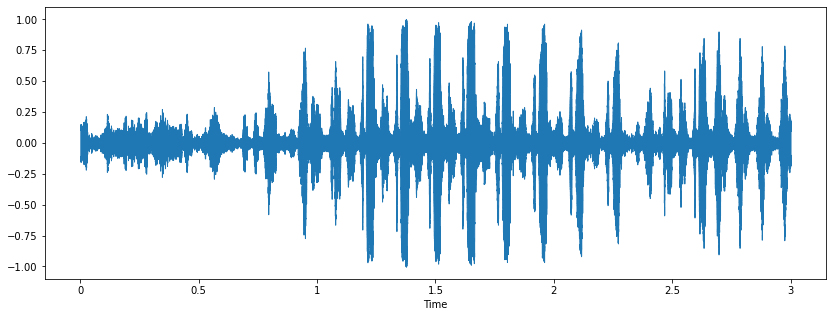

In [88]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data, sr= sample_rate)
ipd.Audio(filename)

In [89]:
sample_rate

22050

In [90]:
import pandas as pd
#salient is the striking feature of that audio
metadata=pd.read_csv('../input/bird-song-data-set/bird_songs_metadata.csv')
metadata.head(5)

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [91]:
newdata = metadata.drop(['id','genus','species','subspecies','recordist','country','location','latitude','longitude','altitude',
               'sound_type','source_url','license','time','date','remarks'], axis=1)


In [92]:
newdata.head(5)


,name,filename
0,Bewick's Wren,557838-0.wav
1,Bewick's Wren,557838-1.wav
2,Bewick's Wren,557838-4.wav
3,Bewick's Wren,557838-5.wav
4,Bewick's Wren,557838-6.wav


In [93]:
#dataset is quite balanced
newdata['name'].value_counts()
#newdata['full_name'].value_counts()

Song Sparrow            1256
Northern Mockingbird    1182
Northern Cardinal       1074
American Robin          1017
Bewick's Wren            893
Name: name, dtype: int64

DATA PREPROCESSING

In [94]:
new_audio='../input/bird-song-data-set/wavfiles/101308-1.wav'
librosa_audio_data,libros_sample_rate=librosa.load(new_audio)
print(librosa_audio_data)
print(libros_sample_rate)

[ 0.03067902 -0.24432874  0.25134328 ...  0.00621647  0.01707573
  0.01439102]
22050


In [95]:
# MFCC HELPS IN BETTER FEATURE CLASSIFICATION AND HELPS TO TAKE IN FREQUENCY AND TIME CHARACTERISTICS
#feature extraction

mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=libros_sample_rate, n_mfcc=50)
print(mfccs.shape)

(50, 130)


In [96]:
mfccs

array([[-189.93076  , -173.28827  , -164.55322  , ..., -252.29231  ,
        -257.86905  , -279.11914  ],
       [ -23.179129 ,   -6.1309695,   -8.764956 , ...,   85.04787  ,
          73.68143  ,   69.04448  ],
       [  45.73687  ,   32.78427  ,   22.063555 , ...,  -20.492798 ,
         -21.420603 ,  -18.389118 ],
       ...,
       [  -2.8888228,   -2.432316 ,    2.0649009, ...,    5.049809 ,
           4.3812895,    1.4548496],
       [  -5.5702353,   -2.8832693,    5.4543676, ...,    2.1276393,
           6.2791348,    7.2557583],
       [  -4.41916  ,   -5.354619 ,   -1.8585322, ...,   -1.3257508,
           1.0275986,    2.882467 ]], dtype=float32)

In [97]:
import pandas as pd
import os

audio_dataset_path='../input/bird-song-data-set/wavfiles'
metadata=pd.read_csv('../input/bird-song-data-set/bird_songs_metadata.csv')
newdata = metadata.drop(['id','genus','species','subspecies','recordist','country','location','latitude','longitude','altitude',
               'sound_type','source_url','license','time','date','remarks'], axis=1)

newdata.head()


,name,filename
0,Bewick's Wren,557838-0.wav
1,Bewick's Wren,557838-1.wav
2,Bewick's Wren,557838-4.wav
3,Bewick's Wren,557838-5.wav
4,Bewick's Wren,557838-6.wav


In [98]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [99]:
os.path.abspath(audio_dataset_path)

'/kaggle/input/bird-song-data-set/wavfiles'

In [100]:
#../input/xenocanto-avian-vocalizations-canv-usa
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
   # file_name = (os.path.abspath(audio_dataset_path)+'../input/bird-song-data-set'+str(row["filename"]))
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["filename"]))
    print(file_name)
    final_class_labels=row["name"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1it [00:00,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/557838-0.wav
/kaggle/input/bird-song-data-set/wavfiles/557838-1.wav


3it [00:00,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/557838-4.wav
/kaggle/input/bird-song-data-set/wavfiles/557838-5.wav


5it [00:00,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/557838-6.wav
/kaggle/input/bird-song-data-set/wavfiles/557838-8.wav


7it [00:01,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/557838-9.wav
/kaggle/input/bird-song-data-set/wavfiles/557838-11.wav


9it [00:01,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/557838-14.wav
/kaggle/input/bird-song-data-set/wavfiles/557838-15.wav


11it [00:02,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/557838-17.wav
/kaggle/input/bird-song-data-set/wavfiles/544036-0.wav


13it [00:02,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/544036-1.wav


14it [00:02,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/544036-2.wav
/kaggle/input/bird-song-data-set/wavfiles/544036-3.wav


16it [00:03,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/544036-4.wav
/kaggle/input/bird-song-data-set/wavfiles/544036-5.wav


18it [00:03,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/544036-6.wav
/kaggle/input/bird-song-data-set/wavfiles/544036-7.wav


20it [00:03,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/544036-8.wav
/kaggle/input/bird-song-data-set/wavfiles/544036-9.wav


22it [00:04,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/544036-10.wav


23it [00:04,  5.01it/s]

/kaggle/input/bird-song-data-set/wavfiles/544036-12.wav


24it [00:04,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/544036-13.wav
/kaggle/input/bird-song-data-set/wavfiles/493957-0.wav


26it [00:05,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/493957-1.wav
/kaggle/input/bird-song-data-set/wavfiles/493957-2.wav


28it [00:05,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/493957-3.wav
/kaggle/input/bird-song-data-set/wavfiles/493957-4.wav


29it [00:05,  4.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/493957-5.wav


31it [00:06,  4.76it/s]

/kaggle/input/bird-song-data-set/wavfiles/493957-6.wav
/kaggle/input/bird-song-data-set/wavfiles/493957-7.wav


33it [00:06,  4.88it/s]

/kaggle/input/bird-song-data-set/wavfiles/493957-8.wav


34it [00:06,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/486798-0.wav
/kaggle/input/bird-song-data-set/wavfiles/486798-1.wav


36it [00:07,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/486798-3.wav
/kaggle/input/bird-song-data-set/wavfiles/486798-4.wav


38it [00:07,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/486798-6.wav
/kaggle/input/bird-song-data-set/wavfiles/486798-7.wav


40it [00:07,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/486798-8.wav
/kaggle/input/bird-song-data-set/wavfiles/486798-12.wav


42it [00:08,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/486798-13.wav
/kaggle/input/bird-song-data-set/wavfiles/480035-0.wav


44it [00:08,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/480035-1.wav
/kaggle/input/bird-song-data-set/wavfiles/480035-3.wav


46it [00:09,  4.89it/s]

/kaggle/input/bird-song-data-set/wavfiles/480035-4.wav


47it [00:09,  4.84it/s]

/kaggle/input/bird-song-data-set/wavfiles/480035-5.wav
/kaggle/input/bird-song-data-set/wavfiles/480035-6.wav


49it [00:09,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/480035-7.wav
/kaggle/input/bird-song-data-set/wavfiles/480035-9.wav


50it [00:09,  4.88it/s]

/kaggle/input/bird-song-data-set/wavfiles/480035-10.wav


52it [00:10,  4.84it/s]

/kaggle/input/bird-song-data-set/wavfiles/480035-11.wav


53it [00:10,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/480035-12.wav
/kaggle/input/bird-song-data-set/wavfiles/480035-13.wav


55it [00:10,  4.94it/s]

/kaggle/input/bird-song-data-set/wavfiles/473447-0.wav


56it [00:11,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/473447-1.wav
/kaggle/input/bird-song-data-set/wavfiles/473447-3.wav


58it [00:11,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/473447-4.wav
/kaggle/input/bird-song-data-set/wavfiles/473447-6.wav


60it [00:11,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/473447-7.wav
/kaggle/input/bird-song-data-set/wavfiles/473447-9.wav


62it [00:12,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/473447-10.wav
/kaggle/input/bird-song-data-set/wavfiles/469010-0.wav


64it [00:12,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/469010-1.wav
/kaggle/input/bird-song-data-set/wavfiles/469010-3.wav


66it [00:12,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/469010-4.wav
/kaggle/input/bird-song-data-set/wavfiles/469010-6.wav


68it [00:13,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/469010-7.wav
/kaggle/input/bird-song-data-set/wavfiles/469010-9.wav


70it [00:13,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/469010-10.wav
/kaggle/input/bird-song-data-set/wavfiles/469010-12.wav


72it [00:14,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/469010-13.wav
/kaggle/input/bird-song-data-set/wavfiles/469007-0.wav


73it [00:14,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/469007-1.wav


75it [00:14,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/469007-3.wav
/kaggle/input/bird-song-data-set/wavfiles/469007-4.wav


77it [00:15,  4.93it/s]

/kaggle/input/bird-song-data-set/wavfiles/469007-6.wav


78it [00:15,  5.01it/s]

/kaggle/input/bird-song-data-set/wavfiles/469007-7.wav
/kaggle/input/bird-song-data-set/wavfiles/469007-9.wav


79it [00:15,  4.97it/s]

/kaggle/input/bird-song-data-set/wavfiles/469007-10.wav


81it [00:15,  4.85it/s]

/kaggle/input/bird-song-data-set/wavfiles/451372-0.wav


82it [00:16,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/451372-1.wav
/kaggle/input/bird-song-data-set/wavfiles/451372-2.wav


84it [00:16,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/451372-3.wav
/kaggle/input/bird-song-data-set/wavfiles/451372-4.wav


86it [00:16,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/451372-5.wav
/kaggle/input/bird-song-data-set/wavfiles/451372-6.wav


88it [00:17,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/451372-7.wav
/kaggle/input/bird-song-data-set/wavfiles/451372-8.wav


90it [00:17,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/451372-10.wav
/kaggle/input/bird-song-data-set/wavfiles/451372-11.wav


92it [00:18,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/451372-12.wav
/kaggle/input/bird-song-data-set/wavfiles/451372-13.wav


94it [00:18,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/451371-0.wav
/kaggle/input/bird-song-data-set/wavfiles/451371-1.wav


96it [00:18,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/451371-2.wav
/kaggle/input/bird-song-data-set/wavfiles/451371-3.wav


98it [00:19,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/451371-4.wav
/kaggle/input/bird-song-data-set/wavfiles/451371-6.wav


99it [00:19,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/451371-7.wav


100it [00:19,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/451371-9.wav


101it [00:19,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/451371-10.wav


103it [00:20,  4.89it/s]

/kaggle/input/bird-song-data-set/wavfiles/451371-12.wav
/kaggle/input/bird-song-data-set/wavfiles/451371-13.wav


105it [00:20,  4.93it/s]

/kaggle/input/bird-song-data-set/wavfiles/451371-14.wav
/kaggle/input/bird-song-data-set/wavfiles/451370-0.wav


106it [00:20,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/451370-1.wav


107it [00:21,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/451370-2.wav


109it [00:21,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/451370-3.wav
/kaggle/input/bird-song-data-set/wavfiles/451370-4.wav


111it [00:21,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/451370-5.wav
/kaggle/input/bird-song-data-set/wavfiles/451370-6.wav


113it [00:22,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/451370-7.wav
/kaggle/input/bird-song-data-set/wavfiles/451370-8.wav


115it [00:22,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/451370-9.wav
/kaggle/input/bird-song-data-set/wavfiles/451370-10.wav


117it [00:22,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/451370-12.wav
/kaggle/input/bird-song-data-set/wavfiles/451370-13.wav


119it [00:23,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/451370-14.wav
/kaggle/input/bird-song-data-set/wavfiles/451298-0.wav


121it [00:23,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/451298-1.wav
/kaggle/input/bird-song-data-set/wavfiles/451298-2.wav


123it [00:24,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/451298-3.wav


124it [00:24,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/451298-4.wav
/kaggle/input/bird-song-data-set/wavfiles/451298-5.wav


125it [00:24,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/451298-6.wav


127it [00:24,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/451298-7.wav
/kaggle/input/bird-song-data-set/wavfiles/451298-8.wav


129it [00:25,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/451298-9.wav
/kaggle/input/bird-song-data-set/wavfiles/451298-10.wav


131it [00:25,  4.99it/s]

/kaggle/input/bird-song-data-set/wavfiles/451298-11.wav


132it [00:25,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/451298-12.wav
/kaggle/input/bird-song-data-set/wavfiles/451298-13.wav


134it [00:26,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/417877-0.wav


135it [00:26,  4.95it/s]

/kaggle/input/bird-song-data-set/wavfiles/417877-1.wav


136it [00:26,  4.89it/s]

/kaggle/input/bird-song-data-set/wavfiles/417877-2.wav


137it [00:26,  4.86it/s]

/kaggle/input/bird-song-data-set/wavfiles/417877-3.wav


138it [00:27,  4.97it/s]

/kaggle/input/bird-song-data-set/wavfiles/417877-4.wav
/kaggle/input/bird-song-data-set/wavfiles/417877-5.wav


140it [00:27,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/417877-6.wav
/kaggle/input/bird-song-data-set/wavfiles/417877-7.wav


142it [00:27,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/417877-8.wav
/kaggle/input/bird-song-data-set/wavfiles/417877-9.wav


144it [00:28,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/417877-10.wav
/kaggle/input/bird-song-data-set/wavfiles/417877-11.wav


146it [00:28,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/408558-0.wav
/kaggle/input/bird-song-data-set/wavfiles/408558-1.wav


148it [00:28,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/408558-2.wav
/kaggle/input/bird-song-data-set/wavfiles/408558-3.wav


150it [00:29,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/408558-4.wav
/kaggle/input/bird-song-data-set/wavfiles/408558-5.wav


152it [00:29,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/408558-6.wav
/kaggle/input/bird-song-data-set/wavfiles/408558-7.wav


154it [00:30,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/408558-8.wav
/kaggle/input/bird-song-data-set/wavfiles/408558-9.wav


156it [00:30,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/408558-10.wav
/kaggle/input/bird-song-data-set/wavfiles/408558-11.wav


157it [00:30,  5.01it/s]

/kaggle/input/bird-song-data-set/wavfiles/408558-12.wav


159it [00:31,  4.89it/s]

/kaggle/input/bird-song-data-set/wavfiles/408558-13.wav


160it [00:31,  4.85it/s]

/kaggle/input/bird-song-data-set/wavfiles/408558-14.wav


161it [00:31,  4.99it/s]

/kaggle/input/bird-song-data-set/wavfiles/408543-0.wav
/kaggle/input/bird-song-data-set/wavfiles/408543-1.wav


163it [00:31,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/408543-2.wav


164it [00:32,  4.95it/s]

/kaggle/input/bird-song-data-set/wavfiles/408543-4.wav


165it [00:32,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/408543-5.wav
/kaggle/input/bird-song-data-set/wavfiles/408543-6.wav


167it [00:32,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/408543-8.wav
/kaggle/input/bird-song-data-set/wavfiles/408543-9.wav


169it [00:33,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/408543-10.wav
/kaggle/input/bird-song-data-set/wavfiles/351182-0.wav


171it [00:33,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/351182-1.wav


172it [00:33,  4.98it/s]

/kaggle/input/bird-song-data-set/wavfiles/351182-2.wav
/kaggle/input/bird-song-data-set/wavfiles/351182-3.wav


174it [00:34,  4.97it/s]

/kaggle/input/bird-song-data-set/wavfiles/351182-4.wav
/kaggle/input/bird-song-data-set/wavfiles/351182-5.wav


176it [00:34,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/351182-6.wav
/kaggle/input/bird-song-data-set/wavfiles/351182-7.wav


178it [00:34,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/351179-0.wav
/kaggle/input/bird-song-data-set/wavfiles/351179-1.wav


180it [00:35,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/351179-2.wav


181it [00:35,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/351179-3.wav
/kaggle/input/bird-song-data-set/wavfiles/351179-4.wav


183it [00:35,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/351179-5.wav
/kaggle/input/bird-song-data-set/wavfiles/351179-6.wav


185it [00:36,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/351179-7.wav
/kaggle/input/bird-song-data-set/wavfiles/351179-8.wav


187it [00:36,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/351179-9.wav
/kaggle/input/bird-song-data-set/wavfiles/351179-10.wav


189it [00:37,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/351179-11.wav
/kaggle/input/bird-song-data-set/wavfiles/351179-12.wav


191it [00:37,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/351179-13.wav
/kaggle/input/bird-song-data-set/wavfiles/351093-0.wav


192it [00:37,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/351093-1.wav


193it [00:37,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/351093-2.wav


195it [00:38,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/351093-3.wav
/kaggle/input/bird-song-data-set/wavfiles/351093-4.wav


197it [00:38,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/351093-5.wav
/kaggle/input/bird-song-data-set/wavfiles/351093-6.wav


198it [00:38,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/351093-7.wav


200it [00:39,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/351093-8.wav
/kaggle/input/bird-song-data-set/wavfiles/351093-9.wav


202it [00:39,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/351093-10.wav


203it [00:39,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/351093-11.wav
/kaggle/input/bird-song-data-set/wavfiles/351091-0.wav


204it [00:39,  5.01it/s]

/kaggle/input/bird-song-data-set/wavfiles/351091-1.wav


206it [00:40,  4.99it/s]

/kaggle/input/bird-song-data-set/wavfiles/351091-2.wav
/kaggle/input/bird-song-data-set/wavfiles/351091-3.wav


207it [00:40,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/351091-4.wav


209it [00:41,  4.91it/s]

/kaggle/input/bird-song-data-set/wavfiles/351091-5.wav


210it [00:41,  4.98it/s]

/kaggle/input/bird-song-data-set/wavfiles/351091-6.wav
/kaggle/input/bird-song-data-set/wavfiles/351091-7.wav


212it [00:41,  4.99it/s]

/kaggle/input/bird-song-data-set/wavfiles/351091-8.wav
/kaggle/input/bird-song-data-set/wavfiles/351091-9.wav


214it [00:42,  4.82it/s]

/kaggle/input/bird-song-data-set/wavfiles/351091-10.wav
/kaggle/input/bird-song-data-set/wavfiles/351091-11.wav


216it [00:42,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/351091-12.wav
/kaggle/input/bird-song-data-set/wavfiles/351091-13.wav


218it [00:42,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/351091-14.wav
/kaggle/input/bird-song-data-set/wavfiles/351083-0.wav


220it [00:43,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/351083-1.wav


221it [00:43,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/351083-2.wav
/kaggle/input/bird-song-data-set/wavfiles/351083-3.wav


223it [00:43,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/351083-4.wav


224it [00:43,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/351083-5.wav
/kaggle/input/bird-song-data-set/wavfiles/351083-6.wav


226it [00:44,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/351083-7.wav
/kaggle/input/bird-song-data-set/wavfiles/351083-8.wav


228it [00:44,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/351083-9.wav
/kaggle/input/bird-song-data-set/wavfiles/351083-10.wav


230it [00:45,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/351083-11.wav
/kaggle/input/bird-song-data-set/wavfiles/351083-12.wav


232it [00:45,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/351082-0.wav
/kaggle/input/bird-song-data-set/wavfiles/351082-1.wav


234it [00:45,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/351082-2.wav


235it [00:46,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/351082-3.wav
/kaggle/input/bird-song-data-set/wavfiles/351082-4.wav


237it [00:46,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/351082-5.wav
/kaggle/input/bird-song-data-set/wavfiles/351082-6.wav


239it [00:46,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/351082-7.wav
/kaggle/input/bird-song-data-set/wavfiles/351082-8.wav


241it [00:47,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/351082-9.wav
/kaggle/input/bird-song-data-set/wavfiles/351082-10.wav


243it [00:47,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/351082-11.wav
/kaggle/input/bird-song-data-set/wavfiles/351081-0.wav


244it [00:47,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/351081-1.wav


246it [00:48,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/351081-3.wav
/kaggle/input/bird-song-data-set/wavfiles/351081-4.wav


248it [00:48,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/351081-6.wav
/kaggle/input/bird-song-data-set/wavfiles/351081-9.wav


250it [00:49,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/351081-10.wav
/kaggle/input/bird-song-data-set/wavfiles/351081-11.wav


252it [00:49,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/351081-12.wav
/kaggle/input/bird-song-data-set/wavfiles/351081-13.wav


254it [00:49,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/351078-0.wav
/kaggle/input/bird-song-data-set/wavfiles/351078-1.wav


256it [00:50,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/351078-2.wav
/kaggle/input/bird-song-data-set/wavfiles/351078-3.wav


258it [00:50,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/351078-4.wav
/kaggle/input/bird-song-data-set/wavfiles/351078-5.wav


260it [00:50,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/351078-6.wav
/kaggle/input/bird-song-data-set/wavfiles/351078-7.wav


261it [00:51,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/351078-8.wav


263it [00:51,  4.98it/s]

/kaggle/input/bird-song-data-set/wavfiles/351078-9.wav
/kaggle/input/bird-song-data-set/wavfiles/351078-12.wav


265it [00:51,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/351076-0.wav
/kaggle/input/bird-song-data-set/wavfiles/351076-1.wav


267it [00:52,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/351076-2.wav
/kaggle/input/bird-song-data-set/wavfiles/351076-3.wav


269it [00:52,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/351076-4.wav
/kaggle/input/bird-song-data-set/wavfiles/351076-5.wav


270it [00:53,  4.79it/s]

/kaggle/input/bird-song-data-set/wavfiles/351076-6.wav


271it [00:53,  4.73it/s]

/kaggle/input/bird-song-data-set/wavfiles/351076-7.wav


273it [00:53,  4.85it/s]

/kaggle/input/bird-song-data-set/wavfiles/351076-8.wav
/kaggle/input/bird-song-data-set/wavfiles/351076-9.wav


274it [00:53,  4.98it/s]

/kaggle/input/bird-song-data-set/wavfiles/351075-0.wav


276it [00:54,  4.99it/s]

/kaggle/input/bird-song-data-set/wavfiles/351075-1.wav
/kaggle/input/bird-song-data-set/wavfiles/351075-2.wav


278it [00:54,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/351075-4.wav


279it [00:54,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/351075-5.wav
/kaggle/input/bird-song-data-set/wavfiles/351075-6.wav


280it [00:54,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/351075-7.wav


282it [00:55,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/351075-8.wav
/kaggle/input/bird-song-data-set/wavfiles/351075-9.wav


284it [00:55,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/351075-10.wav
/kaggle/input/bird-song-data-set/wavfiles/351065-0.wav


286it [00:56,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/351065-1.wav
/kaggle/input/bird-song-data-set/wavfiles/351065-2.wav


288it [00:56,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/351065-3.wav


289it [00:56,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/351065-4.wav
/kaggle/input/bird-song-data-set/wavfiles/351065-5.wav


291it [00:57,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/351065-6.wav
/kaggle/input/bird-song-data-set/wavfiles/351065-8.wav


293it [00:57,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/351065-9.wav


294it [00:57,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/351065-10.wav
/kaggle/input/bird-song-data-set/wavfiles/351065-11.wav


296it [00:58,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/351065-12.wav
/kaggle/input/bird-song-data-set/wavfiles/351058-0.wav


298it [00:58,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/351058-1.wav


299it [00:58,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/351058-6.wav
/kaggle/input/bird-song-data-set/wavfiles/351058-7.wav


301it [00:59,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/351058-9.wav
/kaggle/input/bird-song-data-set/wavfiles/351058-10.wav


303it [00:59,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/351058-12.wav
/kaggle/input/bird-song-data-set/wavfiles/351058-13.wav


305it [00:59,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/351049-0.wav
/kaggle/input/bird-song-data-set/wavfiles/351049-1.wav


307it [01:00,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/351049-2.wav
/kaggle/input/bird-song-data-set/wavfiles/351049-3.wav


309it [01:00,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/351049-4.wav
/kaggle/input/bird-song-data-set/wavfiles/351049-6.wav


310it [01:00,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/351049-7.wav


312it [01:01,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/351049-8.wav
/kaggle/input/bird-song-data-set/wavfiles/351049-9.wav


314it [01:01,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/351049-10.wav
/kaggle/input/bird-song-data-set/wavfiles/351041-0.wav


316it [01:01,  4.97it/s]

/kaggle/input/bird-song-data-set/wavfiles/351041-1.wav


317it [01:02,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/351041-2.wav
/kaggle/input/bird-song-data-set/wavfiles/351041-3.wav


319it [01:02,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/351041-4.wav


320it [01:02,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/351041-5.wav


321it [01:02,  4.93it/s]

/kaggle/input/bird-song-data-set/wavfiles/351041-6.wav


322it [01:03,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/351041-7.wav
/kaggle/input/bird-song-data-set/wavfiles/351041-8.wav


324it [01:03,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/351041-9.wav
/kaggle/input/bird-song-data-set/wavfiles/351041-10.wav


325it [01:03,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/351041-11.wav


327it [01:04,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/351041-12.wav
/kaggle/input/bird-song-data-set/wavfiles/351041-13.wav


329it [01:04,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/351041-14.wav


330it [01:04,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/351038-0.wav
/kaggle/input/bird-song-data-set/wavfiles/351038-1.wav


332it [01:05,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/351038-3.wav
/kaggle/input/bird-song-data-set/wavfiles/351038-4.wav


334it [01:05,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/351038-5.wav
/kaggle/input/bird-song-data-set/wavfiles/351038-6.wav


336it [01:05,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/351038-7.wav
/kaggle/input/bird-song-data-set/wavfiles/351038-8.wav


338it [01:06,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/351038-9.wav
/kaggle/input/bird-song-data-set/wavfiles/351038-10.wav


340it [01:06,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/351038-11.wav
/kaggle/input/bird-song-data-set/wavfiles/332644-0.wav


342it [01:06,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/332644-1.wav


343it [01:07,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/332644-2.wav
/kaggle/input/bird-song-data-set/wavfiles/332644-3.wav


345it [01:07,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/332644-4.wav
/kaggle/input/bird-song-data-set/wavfiles/332644-5.wav


347it [01:07,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/332644-6.wav
/kaggle/input/bird-song-data-set/wavfiles/332644-7.wav


349it [01:08,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/332644-12.wav
/kaggle/input/bird-song-data-set/wavfiles/332644-13.wav


351it [01:08,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/325137-0.wav
/kaggle/input/bird-song-data-set/wavfiles/325137-1.wav


353it [01:09,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/325137-2.wav
/kaggle/input/bird-song-data-set/wavfiles/325137-3.wav


355it [01:09,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/325137-4.wav
/kaggle/input/bird-song-data-set/wavfiles/325137-5.wav


356it [01:09,  4.92it/s]

/kaggle/input/bird-song-data-set/wavfiles/325137-6.wav


358it [01:10,  4.86it/s]

/kaggle/input/bird-song-data-set/wavfiles/325137-7.wav
/kaggle/input/bird-song-data-set/wavfiles/325137-8.wav


359it [01:10,  4.77it/s]

/kaggle/input/bird-song-data-set/wavfiles/325137-9.wav


361it [01:10,  4.91it/s]

/kaggle/input/bird-song-data-set/wavfiles/325137-10.wav
/kaggle/input/bird-song-data-set/wavfiles/325137-11.wav


363it [01:11,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/325137-12.wav
/kaggle/input/bird-song-data-set/wavfiles/323981-0.wav


365it [01:11,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/323981-1.wav
/kaggle/input/bird-song-data-set/wavfiles/323981-2.wav


367it [01:11,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/323981-3.wav
/kaggle/input/bird-song-data-set/wavfiles/323981-4.wav


369it [01:12,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/323981-5.wav
/kaggle/input/bird-song-data-set/wavfiles/323979-0.wav


371it [01:12,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/323979-1.wav
/kaggle/input/bird-song-data-set/wavfiles/323979-2.wav


373it [01:13,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/323979-3.wav
/kaggle/input/bird-song-data-set/wavfiles/323979-4.wav


375it [01:13,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/323979-5.wav
/kaggle/input/bird-song-data-set/wavfiles/323979-6.wav


376it [01:13,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/323979-7.wav


378it [01:13,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/323979-8.wav
/kaggle/input/bird-song-data-set/wavfiles/323979-9.wav


379it [01:14,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/323979-10.wav


381it [01:14,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/323979-11.wav
/kaggle/input/bird-song-data-set/wavfiles/323979-12.wav


382it [01:14,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/323979-13.wav


383it [01:15,  4.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/323977-0.wav


385it [01:15,  4.75it/s]

/kaggle/input/bird-song-data-set/wavfiles/323977-1.wav
/kaggle/input/bird-song-data-set/wavfiles/323977-2.wav


386it [01:15,  4.87it/s]

/kaggle/input/bird-song-data-set/wavfiles/323977-3.wav


388it [01:16,  4.91it/s]

/kaggle/input/bird-song-data-set/wavfiles/323977-4.wav
/kaggle/input/bird-song-data-set/wavfiles/323977-5.wav


390it [01:16,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/323977-6.wav
/kaggle/input/bird-song-data-set/wavfiles/323977-7.wav


392it [01:16,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/323977-8.wav
/kaggle/input/bird-song-data-set/wavfiles/323977-9.wav


393it [01:17,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/323977-10.wav


395it [01:17,  5.01it/s]

/kaggle/input/bird-song-data-set/wavfiles/323977-11.wav
/kaggle/input/bird-song-data-set/wavfiles/323977-12.wav


397it [01:17,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/323975-0.wav
/kaggle/input/bird-song-data-set/wavfiles/323975-1.wav


399it [01:18,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/323975-2.wav
/kaggle/input/bird-song-data-set/wavfiles/323975-3.wav


401it [01:18,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/323975-4.wav
/kaggle/input/bird-song-data-set/wavfiles/323975-5.wav


403it [01:18,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/323975-6.wav
/kaggle/input/bird-song-data-set/wavfiles/323975-7.wav


405it [01:19,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/323975-8.wav
/kaggle/input/bird-song-data-set/wavfiles/323974-0.wav


407it [01:19,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/323974-1.wav
/kaggle/input/bird-song-data-set/wavfiles/323974-3.wav


409it [01:20,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/323974-4.wav
/kaggle/input/bird-song-data-set/wavfiles/323974-5.wav


410it [01:20,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/323974-6.wav


412it [01:20,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/323974-7.wav
/kaggle/input/bird-song-data-set/wavfiles/323974-9.wav


414it [01:21,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/323974-10.wav


415it [01:21,  4.97it/s]

/kaggle/input/bird-song-data-set/wavfiles/323974-11.wav


416it [01:21,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/321497-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321497-1.wav


418it [01:21,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/321497-4.wav


419it [01:22,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/321497-7.wav
/kaggle/input/bird-song-data-set/wavfiles/321497-8.wav


421it [01:22,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/306680-0.wav
/kaggle/input/bird-song-data-set/wavfiles/306680-1.wav


423it [01:22,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/306680-2.wav
/kaggle/input/bird-song-data-set/wavfiles/306680-3.wav


425it [01:23,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/306680-4.wav
/kaggle/input/bird-song-data-set/wavfiles/306680-5.wav


427it [01:23,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/306680-6.wav
/kaggle/input/bird-song-data-set/wavfiles/306680-8.wav


429it [01:23,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/306680-9.wav
/kaggle/input/bird-song-data-set/wavfiles/306680-14.wav


431it [01:24,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/306680-15.wav
/kaggle/input/bird-song-data-set/wavfiles/269166-0.wav


433it [01:24,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/269166-1.wav
/kaggle/input/bird-song-data-set/wavfiles/269166-2.wav


435it [01:25,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/269166-3.wav
/kaggle/input/bird-song-data-set/wavfiles/269166-4.wav


437it [01:25,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/269166-8.wav
/kaggle/input/bird-song-data-set/wavfiles/269166-9.wav


438it [01:25,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/269166-10.wav


440it [01:26,  4.80it/s]

/kaggle/input/bird-song-data-set/wavfiles/269166-11.wav
/kaggle/input/bird-song-data-set/wavfiles/269166-12.wav


442it [01:26,  4.95it/s]

/kaggle/input/bird-song-data-set/wavfiles/269166-13.wav
/kaggle/input/bird-song-data-set/wavfiles/269166-14.wav


444it [01:26,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/269166-15.wav
/kaggle/input/bird-song-data-set/wavfiles/269166-16.wav


446it [01:27,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/243688-0.wav
/kaggle/input/bird-song-data-set/wavfiles/243688-1.wav


448it [01:27,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/243688-2.wav
/kaggle/input/bird-song-data-set/wavfiles/243688-3.wav


450it [01:28,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/237263-0.wav
/kaggle/input/bird-song-data-set/wavfiles/237263-1.wav


452it [01:28,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/237263-2.wav


453it [01:28,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/237263-4.wav
/kaggle/input/bird-song-data-set/wavfiles/237263-5.wav


455it [01:29,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/237263-6.wav
/kaggle/input/bird-song-data-set/wavfiles/237263-7.wav


457it [01:29,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/237263-8.wav
/kaggle/input/bird-song-data-set/wavfiles/237263-9.wav


459it [01:29,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/237263-10.wav
/kaggle/input/bird-song-data-set/wavfiles/237263-11.wav


461it [01:30,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/237263-12.wav
/kaggle/input/bird-song-data-set/wavfiles/237263-13.wav


462it [01:30,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/237263-14.wav


464it [01:30,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/217924-0.wav
/kaggle/input/bird-song-data-set/wavfiles/217924-1.wav


466it [01:31,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/217924-2.wav
/kaggle/input/bird-song-data-set/wavfiles/217924-4.wav


468it [01:31,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/217924-5.wav
/kaggle/input/bird-song-data-set/wavfiles/217924-6.wav


470it [01:32,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/217924-7.wav


471it [01:32,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/217924-8.wav
/kaggle/input/bird-song-data-set/wavfiles/217924-9.wav


473it [01:32,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/217924-10.wav


474it [01:32,  5.01it/s]

/kaggle/input/bird-song-data-set/wavfiles/217924-11.wav


475it [01:32,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/217913-0.wav
/kaggle/input/bird-song-data-set/wavfiles/217913-1.wav


477it [01:33,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/217913-2.wav
/kaggle/input/bird-song-data-set/wavfiles/217913-3.wav


479it [01:33,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/217913-4.wav
/kaggle/input/bird-song-data-set/wavfiles/217913-5.wav


481it [01:34,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/217913-6.wav


482it [01:34,  4.95it/s]

/kaggle/input/bird-song-data-set/wavfiles/217913-7.wav


483it [01:34,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/217913-8.wav
/kaggle/input/bird-song-data-set/wavfiles/217913-9.wav


484it [01:34,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/217913-10.wav


486it [01:35,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/217913-11.wav
/kaggle/input/bird-song-data-set/wavfiles/217911-0.wav


487it [01:35,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/217911-1.wav


489it [01:35,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/217911-2.wav
/kaggle/input/bird-song-data-set/wavfiles/217911-3.wav


491it [01:36,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/217911-4.wav


492it [01:36,  4.94it/s]

/kaggle/input/bird-song-data-set/wavfiles/217911-5.wav


493it [01:36,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/217911-6.wav
/kaggle/input/bird-song-data-set/wavfiles/217911-7.wav


494it [01:36,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/217854-0.wav


496it [01:37,  4.97it/s]

/kaggle/input/bird-song-data-set/wavfiles/217854-1.wav
/kaggle/input/bird-song-data-set/wavfiles/217854-2.wav


498it [01:37,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/217854-4.wav
/kaggle/input/bird-song-data-set/wavfiles/217854-5.wav


499it [01:37,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/217854-6.wav


501it [01:38,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/217854-7.wav
/kaggle/input/bird-song-data-set/wavfiles/217854-8.wav


503it [01:38,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/217854-10.wav
/kaggle/input/bird-song-data-set/wavfiles/217853-0.wav


504it [01:38,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/217853-1.wav


506it [01:39,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/217853-3.wav
/kaggle/input/bird-song-data-set/wavfiles/217853-4.wav


508it [01:39,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/217853-6.wav
/kaggle/input/bird-song-data-set/wavfiles/217853-7.wav


510it [01:39,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/217853-9.wav


511it [01:40,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/217853-10.wav


512it [01:40,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/217851-0.wav
/kaggle/input/bird-song-data-set/wavfiles/217851-1.wav


514it [01:40,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/217851-2.wav
/kaggle/input/bird-song-data-set/wavfiles/217851-4.wav


516it [01:41,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/217851-5.wav
/kaggle/input/bird-song-data-set/wavfiles/217851-6.wav


518it [01:41,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/217851-7.wav
/kaggle/input/bird-song-data-set/wavfiles/217851-8.wav


520it [01:41,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/217851-9.wav


521it [01:42,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/217851-10.wav


522it [01:42,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/217851-11.wav
/kaggle/input/bird-song-data-set/wavfiles/217851-12.wav


524it [01:42,  4.90it/s]

/kaggle/input/bird-song-data-set/wavfiles/217851-13.wav
/kaggle/input/bird-song-data-set/wavfiles/217851-14.wav


526it [01:43,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/217851-15.wav
/kaggle/input/bird-song-data-set/wavfiles/217847-0.wav


528it [01:43,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/217847-1.wav


529it [01:43,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/217847-2.wav
/kaggle/input/bird-song-data-set/wavfiles/217847-3.wav


531it [01:43,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/217847-4.wav


532it [01:44,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/217847-5.wav


533it [01:44,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/217847-6.wav


534it [01:44,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/217847-9.wav
/kaggle/input/bird-song-data-set/wavfiles/217847-10.wav


536it [01:44,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/217847-11.wav
/kaggle/input/bird-song-data-set/wavfiles/217847-12.wav


538it [01:45,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/217847-13.wav


539it [01:45,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/217843-0.wav
/kaggle/input/bird-song-data-set/wavfiles/217843-1.wav


541it [01:45,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/217843-2.wav
/kaggle/input/bird-song-data-set/wavfiles/217843-3.wav


543it [01:46,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/217843-4.wav
/kaggle/input/bird-song-data-set/wavfiles/217843-6.wav


545it [01:46,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/217843-7.wav
/kaggle/input/bird-song-data-set/wavfiles/217843-9.wav


547it [01:47,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/217843-10.wav
/kaggle/input/bird-song-data-set/wavfiles/217843-11.wav


549it [01:47,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/217839-0.wav
/kaggle/input/bird-song-data-set/wavfiles/217839-1.wav


550it [01:47,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/217839-2.wav


552it [01:48,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/217839-3.wav
/kaggle/input/bird-song-data-set/wavfiles/217839-4.wav


554it [01:48,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/217839-5.wav
/kaggle/input/bird-song-data-set/wavfiles/217839-6.wav


556it [01:48,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/217839-7.wav


557it [01:49,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/217839-8.wav
/kaggle/input/bird-song-data-set/wavfiles/217839-9.wav


559it [01:49,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/217839-12.wav
/kaggle/input/bird-song-data-set/wavfiles/217839-13.wav


560it [01:49,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/217839-14.wav


562it [01:50,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/217835-0.wav
/kaggle/input/bird-song-data-set/wavfiles/217835-1.wav


563it [01:50,  4.98it/s]

/kaggle/input/bird-song-data-set/wavfiles/217835-2.wav


565it [01:50,  4.98it/s]

/kaggle/input/bird-song-data-set/wavfiles/217835-3.wav
/kaggle/input/bird-song-data-set/wavfiles/217835-4.wav


567it [01:51,  4.93it/s]

/kaggle/input/bird-song-data-set/wavfiles/217835-6.wav
/kaggle/input/bird-song-data-set/wavfiles/217835-7.wav


569it [01:51,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/217835-8.wav
/kaggle/input/bird-song-data-set/wavfiles/217835-9.wav


571it [01:51,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/217835-10.wav
/kaggle/input/bird-song-data-set/wavfiles/217835-11.wav


573it [01:52,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/217834-3.wav
/kaggle/input/bird-song-data-set/wavfiles/217834-4.wav


575it [01:52,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/217834-5.wav
/kaggle/input/bird-song-data-set/wavfiles/217834-6.wav


577it [01:52,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/217834-7.wav
/kaggle/input/bird-song-data-set/wavfiles/217834-9.wav


579it [01:53,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/217834-10.wav


580it [01:53,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/217834-11.wav
/kaggle/input/bird-song-data-set/wavfiles/217834-12.wav


582it [01:53,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/217833-0.wav
/kaggle/input/bird-song-data-set/wavfiles/217833-1.wav


584it [01:54,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/217833-2.wav
/kaggle/input/bird-song-data-set/wavfiles/217833-3.wav


586it [01:54,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/217833-4.wav
/kaggle/input/bird-song-data-set/wavfiles/217833-5.wav


588it [01:55,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/217833-6.wav
/kaggle/input/bird-song-data-set/wavfiles/217833-7.wav


590it [01:55,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/217833-9.wav
/kaggle/input/bird-song-data-set/wavfiles/217833-10.wav


592it [01:55,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/217833-11.wav
/kaggle/input/bird-song-data-set/wavfiles/217833-12.wav


594it [01:56,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/217833-13.wav
/kaggle/input/bird-song-data-set/wavfiles/217833-14.wav


596it [01:56,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/217824-3.wav
/kaggle/input/bird-song-data-set/wavfiles/217824-4.wav


598it [01:56,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/217824-5.wav
/kaggle/input/bird-song-data-set/wavfiles/217824-6.wav


600it [01:57,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/217824-7.wav
/kaggle/input/bird-song-data-set/wavfiles/217824-8.wav


602it [01:57,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/217824-9.wav
/kaggle/input/bird-song-data-set/wavfiles/217824-10.wav


604it [01:58,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/217824-11.wav
/kaggle/input/bird-song-data-set/wavfiles/217824-12.wav


606it [01:58,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/217824-13.wav
/kaggle/input/bird-song-data-set/wavfiles/217819-0.wav


607it [01:58,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/217819-1.wav


609it [01:59,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/217819-3.wav


610it [01:59,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/217819-4.wav
/kaggle/input/bird-song-data-set/wavfiles/217819-6.wav


612it [01:59,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/217819-9.wav


613it [01:59,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/217819-10.wav
/kaggle/input/bird-song-data-set/wavfiles/217819-11.wav


615it [02:00,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/217819-12.wav
/kaggle/input/bird-song-data-set/wavfiles/217819-13.wav


617it [02:00,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/212943-0.wav


618it [02:00,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/212943-1.wav


619it [02:00,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/212943-3.wav
/kaggle/input/bird-song-data-set/wavfiles/212943-4.wav


621it [02:01,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/212943-6.wav
/kaggle/input/bird-song-data-set/wavfiles/212943-7.wav


623it [02:01,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/212943-8.wav
/kaggle/input/bird-song-data-set/wavfiles/212943-9.wav


625it [02:02,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/212943-10.wav
/kaggle/input/bird-song-data-set/wavfiles/212943-12.wav


627it [02:02,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/212943-13.wav
/kaggle/input/bird-song-data-set/wavfiles/205433-0.wav


629it [02:02,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/205433-1.wav
/kaggle/input/bird-song-data-set/wavfiles/205433-2.wav


631it [02:03,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/205433-3.wav
/kaggle/input/bird-song-data-set/wavfiles/205433-4.wav


633it [02:03,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/205433-5.wav
/kaggle/input/bird-song-data-set/wavfiles/205433-6.wav


635it [02:03,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/205433-7.wav
/kaggle/input/bird-song-data-set/wavfiles/205433-8.wav


637it [02:04,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/205433-9.wav
/kaggle/input/bird-song-data-set/wavfiles/205433-10.wav


639it [02:04,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/205433-11.wav
/kaggle/input/bird-song-data-set/wavfiles/205433-13.wav


641it [02:05,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/178322-0.wav
/kaggle/input/bird-song-data-set/wavfiles/178322-1.wav


643it [02:05,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/178322-3.wav
/kaggle/input/bird-song-data-set/wavfiles/178322-4.wav


645it [02:05,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/178322-6.wav
/kaggle/input/bird-song-data-set/wavfiles/178322-7.wav


647it [02:06,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/178322-9.wav
/kaggle/input/bird-song-data-set/wavfiles/178322-10.wav


649it [02:06,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/178322-12.wav


650it [02:06,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/178322-13.wav
/kaggle/input/bird-song-data-set/wavfiles/178322-14.wav


652it [02:07,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/178016-0.wav
/kaggle/input/bird-song-data-set/wavfiles/178016-1.wav


654it [02:07,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/178016-3.wav
/kaggle/input/bird-song-data-set/wavfiles/178016-4.wav


656it [02:07,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/178016-6.wav
/kaggle/input/bird-song-data-set/wavfiles/178016-7.wav


658it [02:08,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/178016-9.wav
/kaggle/input/bird-song-data-set/wavfiles/178016-10.wav


660it [02:08,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/178016-12.wav
/kaggle/input/bird-song-data-set/wavfiles/178016-13.wav


662it [02:08,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/178015-0.wav
/kaggle/input/bird-song-data-set/wavfiles/178015-1.wav


664it [02:09,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/178015-2.wav
/kaggle/input/bird-song-data-set/wavfiles/178015-3.wav


666it [02:09,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/178015-4.wav
/kaggle/input/bird-song-data-set/wavfiles/178015-5.wav


668it [02:10,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/178015-6.wav
/kaggle/input/bird-song-data-set/wavfiles/178015-7.wav


670it [02:10,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/178015-8.wav
/kaggle/input/bird-song-data-set/wavfiles/178015-9.wav


672it [02:10,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/178015-10.wav
/kaggle/input/bird-song-data-set/wavfiles/178015-11.wav


674it [02:11,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/178015-12.wav
/kaggle/input/bird-song-data-set/wavfiles/178015-13.wav


676it [02:11,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/178015-14.wav
/kaggle/input/bird-song-data-set/wavfiles/173154-0.wav


678it [02:11,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/173154-1.wav
/kaggle/input/bird-song-data-set/wavfiles/173154-2.wav


680it [02:12,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/173154-3.wav
/kaggle/input/bird-song-data-set/wavfiles/173154-4.wav


682it [02:12,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/173154-5.wav
/kaggle/input/bird-song-data-set/wavfiles/173154-6.wav


684it [02:13,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/173154-7.wav
/kaggle/input/bird-song-data-set/wavfiles/173154-8.wav


686it [02:13,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/173154-9.wav
/kaggle/input/bird-song-data-set/wavfiles/173154-10.wav


688it [02:13,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/173154-11.wav
/kaggle/input/bird-song-data-set/wavfiles/173154-12.wav


690it [02:14,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/173154-13.wav
/kaggle/input/bird-song-data-set/wavfiles/173153-0.wav


691it [02:14,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/173153-1.wav


692it [02:14,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/173153-2.wav


693it [02:14,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/173153-3.wav


695it [02:15,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/173153-4.wav
/kaggle/input/bird-song-data-set/wavfiles/173153-5.wav


697it [02:15,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/173153-6.wav
/kaggle/input/bird-song-data-set/wavfiles/173153-7.wav


699it [02:15,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/173153-8.wav
/kaggle/input/bird-song-data-set/wavfiles/173153-9.wav


701it [02:16,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/173153-10.wav
/kaggle/input/bird-song-data-set/wavfiles/173153-11.wav


703it [02:16,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/173153-12.wav
/kaggle/input/bird-song-data-set/wavfiles/173153-13.wav


705it [02:17,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/173153-14.wav
/kaggle/input/bird-song-data-set/wavfiles/173150-0.wav


707it [02:17,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/173150-1.wav
/kaggle/input/bird-song-data-set/wavfiles/173150-2.wav


709it [02:17,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/173150-3.wav
/kaggle/input/bird-song-data-set/wavfiles/173150-4.wav


711it [02:18,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/173150-5.wav
/kaggle/input/bird-song-data-set/wavfiles/173150-6.wav


713it [02:18,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/173150-7.wav
/kaggle/input/bird-song-data-set/wavfiles/173150-8.wav


715it [02:18,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/173150-9.wav
/kaggle/input/bird-song-data-set/wavfiles/173150-10.wav


717it [02:19,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/173150-11.wav
/kaggle/input/bird-song-data-set/wavfiles/173150-12.wav


719it [02:19,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/173150-13.wav
/kaggle/input/bird-song-data-set/wavfiles/173150-14.wav


721it [02:20,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/173148-0.wav


722it [02:20,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/173148-1.wav
/kaggle/input/bird-song-data-set/wavfiles/173148-2.wav


724it [02:20,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/173148-3.wav
/kaggle/input/bird-song-data-set/wavfiles/173148-4.wav


726it [02:21,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/173148-5.wav
/kaggle/input/bird-song-data-set/wavfiles/173148-6.wav


728it [02:21,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/173148-7.wav
/kaggle/input/bird-song-data-set/wavfiles/173148-8.wav


729it [02:21,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/173148-9.wav


731it [02:22,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/173148-10.wav
/kaggle/input/bird-song-data-set/wavfiles/173148-11.wav


733it [02:22,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/173148-12.wav
/kaggle/input/bird-song-data-set/wavfiles/172752-0.wav


735it [02:22,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/172752-1.wav
/kaggle/input/bird-song-data-set/wavfiles/172752-2.wav


737it [02:23,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/172752-3.wav


738it [02:23,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/172752-4.wav
/kaggle/input/bird-song-data-set/wavfiles/172752-5.wav


740it [02:23,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/172752-6.wav
/kaggle/input/bird-song-data-set/wavfiles/172752-7.wav


742it [02:24,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/172752-8.wav
/kaggle/input/bird-song-data-set/wavfiles/172752-9.wav


744it [02:24,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/172752-10.wav
/kaggle/input/bird-song-data-set/wavfiles/172752-11.wav


746it [02:24,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/172752-14.wav
/kaggle/input/bird-song-data-set/wavfiles/172752-15.wav


748it [02:25,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/172751-0.wav
/kaggle/input/bird-song-data-set/wavfiles/172751-1.wav


750it [02:25,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/172751-2.wav
/kaggle/input/bird-song-data-set/wavfiles/172751-3.wav


752it [02:26,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/172751-4.wav
/kaggle/input/bird-song-data-set/wavfiles/172751-5.wav


754it [02:26,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/172751-6.wav
/kaggle/input/bird-song-data-set/wavfiles/172751-7.wav


756it [02:26,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/172751-8.wav
/kaggle/input/bird-song-data-set/wavfiles/172751-9.wav


758it [02:27,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/172751-10.wav
/kaggle/input/bird-song-data-set/wavfiles/172751-11.wav


760it [02:27,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/172751-12.wav
/kaggle/input/bird-song-data-set/wavfiles/172751-13.wav


762it [02:27,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/109668-0.wav
/kaggle/input/bird-song-data-set/wavfiles/109668-1.wav


764it [02:28,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/109668-3.wav
/kaggle/input/bird-song-data-set/wavfiles/109668-4.wav


766it [02:28,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/109668-6.wav
/kaggle/input/bird-song-data-set/wavfiles/109668-7.wav


768it [02:29,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/109668-8.wav
/kaggle/input/bird-song-data-set/wavfiles/109668-9.wav


770it [02:29,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/109668-10.wav
/kaggle/input/bird-song-data-set/wavfiles/109668-12.wav


772it [02:29,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/109668-13.wav
/kaggle/input/bird-song-data-set/wavfiles/109397-0.wav


774it [02:30,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/109397-1.wav
/kaggle/input/bird-song-data-set/wavfiles/109397-2.wav


776it [02:30,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/109397-4.wav
/kaggle/input/bird-song-data-set/wavfiles/109397-5.wav


778it [02:30,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/109397-7.wav
/kaggle/input/bird-song-data-set/wavfiles/109397-8.wav


780it [02:31,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/109397-10.wav
/kaggle/input/bird-song-data-set/wavfiles/104637-0.wav


782it [02:31,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/104637-1.wav
/kaggle/input/bird-song-data-set/wavfiles/104637-2.wav


784it [02:32,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/104637-3.wav
/kaggle/input/bird-song-data-set/wavfiles/104637-4.wav


786it [02:32,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/104637-5.wav


787it [02:32,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/104637-6.wav
/kaggle/input/bird-song-data-set/wavfiles/104637-7.wav


789it [02:33,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/104637-11.wav
/kaggle/input/bird-song-data-set/wavfiles/104637-12.wav


791it [02:33,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/104637-13.wav
/kaggle/input/bird-song-data-set/wavfiles/104637-14.wav


793it [02:33,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/104637-15.wav
/kaggle/input/bird-song-data-set/wavfiles/104637-16.wav


795it [02:34,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/89833-0.wav
/kaggle/input/bird-song-data-set/wavfiles/89833-1.wav


797it [02:34,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/89833-2.wav
/kaggle/input/bird-song-data-set/wavfiles/89833-3.wav


799it [02:34,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/89833-4.wav
/kaggle/input/bird-song-data-set/wavfiles/89833-5.wav


801it [02:35,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/89833-6.wav
/kaggle/input/bird-song-data-set/wavfiles/89833-7.wav


803it [02:35,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/89833-8.wav
/kaggle/input/bird-song-data-set/wavfiles/89833-9.wav


805it [02:36,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/89833-10.wav
/kaggle/input/bird-song-data-set/wavfiles/89833-11.wav


807it [02:36,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/89833-12.wav
/kaggle/input/bird-song-data-set/wavfiles/89833-13.wav


809it [02:36,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/89833-14.wav
/kaggle/input/bird-song-data-set/wavfiles/89833-15.wav


811it [02:37,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/89833-16.wav
/kaggle/input/bird-song-data-set/wavfiles/61472-0.wav


813it [02:37,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/61472-1.wav
/kaggle/input/bird-song-data-set/wavfiles/61472-2.wav


815it [02:37,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/61472-3.wav
/kaggle/input/bird-song-data-set/wavfiles/61472-4.wav


817it [02:38,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/61472-5.wav
/kaggle/input/bird-song-data-set/wavfiles/61472-6.wav


819it [02:38,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/61472-7.wav
/kaggle/input/bird-song-data-set/wavfiles/61472-8.wav


821it [02:39,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/61472-9.wav


822it [02:39,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/61472-10.wav
/kaggle/input/bird-song-data-set/wavfiles/61472-11.wav


824it [02:39,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/61471-0.wav
/kaggle/input/bird-song-data-set/wavfiles/61471-1.wav


826it [02:39,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/61471-2.wav
/kaggle/input/bird-song-data-set/wavfiles/61471-3.wav


828it [02:40,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/61471-4.wav
/kaggle/input/bird-song-data-set/wavfiles/61471-5.wav


830it [02:40,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/61471-6.wav
/kaggle/input/bird-song-data-set/wavfiles/61471-7.wav


832it [02:41,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/61471-8.wav
/kaggle/input/bird-song-data-set/wavfiles/61471-9.wav


834it [02:41,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/61471-10.wav
/kaggle/input/bird-song-data-set/wavfiles/61471-11.wav


836it [02:41,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/61471-12.wav
/kaggle/input/bird-song-data-set/wavfiles/61471-13.wav


838it [02:42,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/22069-0.wav
/kaggle/input/bird-song-data-set/wavfiles/22069-1.wav


840it [02:42,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/22069-3.wav
/kaggle/input/bird-song-data-set/wavfiles/22069-4.wav


842it [02:42,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/22069-6.wav


843it [02:43,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/22069-7.wav
/kaggle/input/bird-song-data-set/wavfiles/22069-9.wav


845it [02:43,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/22069-10.wav
/kaggle/input/bird-song-data-set/wavfiles/15270-0.wav


847it [02:43,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/15270-1.wav
/kaggle/input/bird-song-data-set/wavfiles/15270-2.wav


849it [02:44,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/15270-3.wav
/kaggle/input/bird-song-data-set/wavfiles/15270-4.wav


850it [02:44,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/15270-5.wav


852it [02:44,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/15270-6.wav
/kaggle/input/bird-song-data-set/wavfiles/15270-7.wav


854it [02:45,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/15270-8.wav
/kaggle/input/bird-song-data-set/wavfiles/15269-0.wav


856it [02:45,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/15269-1.wav
/kaggle/input/bird-song-data-set/wavfiles/15269-4.wav


858it [02:45,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/15269-5.wav
/kaggle/input/bird-song-data-set/wavfiles/15269-6.wav


860it [02:46,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/15269-8.wav
/kaggle/input/bird-song-data-set/wavfiles/15269-9.wav


862it [02:46,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/15269-10.wav
/kaggle/input/bird-song-data-set/wavfiles/15269-11.wav


864it [02:46,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/15269-12.wav
/kaggle/input/bird-song-data-set/wavfiles/14172-0.wav


866it [02:47,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/14172-1.wav
/kaggle/input/bird-song-data-set/wavfiles/14172-2.wav


868it [02:47,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/14172-3.wav
/kaggle/input/bird-song-data-set/wavfiles/14172-4.wav


870it [02:48,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/14172-5.wav
/kaggle/input/bird-song-data-set/wavfiles/14172-6.wav


872it [02:48,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/14172-8.wav
/kaggle/input/bird-song-data-set/wavfiles/14172-9.wav


874it [02:48,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/14172-11.wav
/kaggle/input/bird-song-data-set/wavfiles/12578-0.wav


876it [02:49,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/12578-1.wav
/kaggle/input/bird-song-data-set/wavfiles/12578-2.wav


878it [02:49,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/12578-3.wav
/kaggle/input/bird-song-data-set/wavfiles/12578-4.wav


880it [02:49,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/12578-5.wav
/kaggle/input/bird-song-data-set/wavfiles/12578-7.wav


882it [02:50,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/12578-8.wav
/kaggle/input/bird-song-data-set/wavfiles/12578-9.wav


884it [02:50,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/12577-0.wav
/kaggle/input/bird-song-data-set/wavfiles/12577-1.wav


886it [02:51,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/12577-2.wav


887it [02:51,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/12577-3.wav
/kaggle/input/bird-song-data-set/wavfiles/12577-4.wav


889it [02:51,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/12577-5.wav
/kaggle/input/bird-song-data-set/wavfiles/12577-6.wav


891it [02:52,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/12577-7.wav
/kaggle/input/bird-song-data-set/wavfiles/12577-9.wav


893it [02:52,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/12577-10.wav
/kaggle/input/bird-song-data-set/wavfiles/563125-0.wav


895it [02:52,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/563125-1.wav
/kaggle/input/bird-song-data-set/wavfiles/563125-2.wav


897it [02:53,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/563125-3.wav
/kaggle/input/bird-song-data-set/wavfiles/563125-4.wav


899it [02:53,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/563125-5.wav
/kaggle/input/bird-song-data-set/wavfiles/563125-6.wav


900it [02:53,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/563125-7.wav


902it [02:54,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/563125-8.wav
/kaggle/input/bird-song-data-set/wavfiles/563125-9.wav


904it [02:54,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/563125-10.wav
/kaggle/input/bird-song-data-set/wavfiles/563125-11.wav


906it [02:54,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/563125-12.wav
/kaggle/input/bird-song-data-set/wavfiles/563125-13.wav


908it [02:55,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/563125-14.wav
/kaggle/input/bird-song-data-set/wavfiles/559014-0.wav


910it [02:55,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/559014-1.wav
/kaggle/input/bird-song-data-set/wavfiles/559014-2.wav


912it [02:56,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/559014-3.wav
/kaggle/input/bird-song-data-set/wavfiles/559014-4.wav


914it [02:56,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/559014-5.wav


915it [02:56,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/559014-6.wav
/kaggle/input/bird-song-data-set/wavfiles/559014-7.wav


917it [02:57,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/559014-8.wav
/kaggle/input/bird-song-data-set/wavfiles/559014-9.wav


919it [02:57,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/559014-10.wav
/kaggle/input/bird-song-data-set/wavfiles/559014-11.wav


921it [02:57,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/559014-12.wav
/kaggle/input/bird-song-data-set/wavfiles/559014-13.wav


923it [02:58,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/559014-14.wav
/kaggle/input/bird-song-data-set/wavfiles/557029-0.wav


925it [02:58,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/557029-1.wav
/kaggle/input/bird-song-data-set/wavfiles/557029-2.wav


927it [02:58,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/557029-3.wav
/kaggle/input/bird-song-data-set/wavfiles/557029-4.wav


929it [02:59,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/557029-5.wav
/kaggle/input/bird-song-data-set/wavfiles/557029-6.wav


931it [02:59,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/557029-7.wav
/kaggle/input/bird-song-data-set/wavfiles/557029-8.wav


933it [02:59,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/557029-9.wav
/kaggle/input/bird-song-data-set/wavfiles/557029-10.wav


935it [03:00,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/557029-11.wav
/kaggle/input/bird-song-data-set/wavfiles/557029-12.wav


937it [03:00,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/552450-0.wav
/kaggle/input/bird-song-data-set/wavfiles/552450-1.wav


939it [03:01,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/552450-2.wav
/kaggle/input/bird-song-data-set/wavfiles/552450-5.wav


941it [03:01,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/552450-6.wav
/kaggle/input/bird-song-data-set/wavfiles/552450-7.wav


943it [03:01,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/552450-8.wav
/kaggle/input/bird-song-data-set/wavfiles/552450-9.wav


945it [03:02,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/552450-10.wav
/kaggle/input/bird-song-data-set/wavfiles/552450-11.wav


947it [03:02,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/552450-12.wav
/kaggle/input/bird-song-data-set/wavfiles/552450-13.wav


949it [03:02,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/552447-0.wav
/kaggle/input/bird-song-data-set/wavfiles/552447-1.wav


951it [03:03,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/552447-2.wav


952it [03:03,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/552447-3.wav
/kaggle/input/bird-song-data-set/wavfiles/552447-4.wav


954it [03:03,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/552447-5.wav
/kaggle/input/bird-song-data-set/wavfiles/552447-6.wav


956it [03:04,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/552447-7.wav
/kaggle/input/bird-song-data-set/wavfiles/552447-8.wav


958it [03:04,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/552447-9.wav
/kaggle/input/bird-song-data-set/wavfiles/552447-10.wav


960it [03:05,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/545900-0.wav
/kaggle/input/bird-song-data-set/wavfiles/545900-1.wav


962it [03:05,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/545900-2.wav
/kaggle/input/bird-song-data-set/wavfiles/545900-3.wav


964it [03:05,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/545900-4.wav
/kaggle/input/bird-song-data-set/wavfiles/545900-5.wav


966it [03:06,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/545900-6.wav
/kaggle/input/bird-song-data-set/wavfiles/545900-7.wav


968it [03:06,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/545900-8.wav
/kaggle/input/bird-song-data-set/wavfiles/545900-9.wav


970it [03:06,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/545900-10.wav
/kaggle/input/bird-song-data-set/wavfiles/545900-11.wav


972it [03:07,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/545900-12.wav
/kaggle/input/bird-song-data-set/wavfiles/542156-0.wav


974it [03:07,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/542156-1.wav
/kaggle/input/bird-song-data-set/wavfiles/542156-2.wav


976it [03:07,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/542156-3.wav
/kaggle/input/bird-song-data-set/wavfiles/542156-4.wav


978it [03:08,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/542156-5.wav
/kaggle/input/bird-song-data-set/wavfiles/542156-6.wav


980it [03:08,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/542156-7.wav
/kaggle/input/bird-song-data-set/wavfiles/542156-8.wav


982it [03:09,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/542156-9.wav
/kaggle/input/bird-song-data-set/wavfiles/542156-10.wav


984it [03:09,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/542156-11.wav
/kaggle/input/bird-song-data-set/wavfiles/542156-12.wav


986it [03:09,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/541496-0.wav
/kaggle/input/bird-song-data-set/wavfiles/541496-1.wav


988it [03:10,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/541496-2.wav
/kaggle/input/bird-song-data-set/wavfiles/541496-3.wav


990it [03:10,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/541496-4.wav
/kaggle/input/bird-song-data-set/wavfiles/541496-5.wav


992it [03:10,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/541496-6.wav
/kaggle/input/bird-song-data-set/wavfiles/541496-7.wav


994it [03:11,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/541496-8.wav
/kaggle/input/bird-song-data-set/wavfiles/541496-9.wav


996it [03:11,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/541496-10.wav
/kaggle/input/bird-song-data-set/wavfiles/541426-0.wav


998it [03:12,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/541426-1.wav
/kaggle/input/bird-song-data-set/wavfiles/541426-2.wav


1000it [03:12,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/541426-3.wav
/kaggle/input/bird-song-data-set/wavfiles/541426-4.wav


1002it [03:12,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/541426-5.wav
/kaggle/input/bird-song-data-set/wavfiles/541426-6.wav


1004it [03:13,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/541426-7.wav
/kaggle/input/bird-song-data-set/wavfiles/541426-8.wav


1006it [03:13,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/541426-9.wav
/kaggle/input/bird-song-data-set/wavfiles/541426-10.wav


1008it [03:13,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/541426-11.wav
/kaggle/input/bird-song-data-set/wavfiles/541426-12.wav


1010it [03:14,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/541426-13.wav


1011it [03:14,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/541426-14.wav
/kaggle/input/bird-song-data-set/wavfiles/538537-0.wav


1013it [03:14,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/538537-1.wav
/kaggle/input/bird-song-data-set/wavfiles/538537-2.wav


1015it [03:15,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/538537-3.wav
/kaggle/input/bird-song-data-set/wavfiles/538537-4.wav


1017it [03:15,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/538537-5.wav
/kaggle/input/bird-song-data-set/wavfiles/538537-6.wav


1019it [03:16,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/538537-10.wav
/kaggle/input/bird-song-data-set/wavfiles/538537-11.wav


1021it [03:16,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/538537-12.wav
/kaggle/input/bird-song-data-set/wavfiles/538537-13.wav


1023it [03:16,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/538122-0.wav
/kaggle/input/bird-song-data-set/wavfiles/538122-1.wav


1025it [03:17,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/538122-2.wav
/kaggle/input/bird-song-data-set/wavfiles/538122-3.wav


1027it [03:17,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/538122-4.wav
/kaggle/input/bird-song-data-set/wavfiles/538122-5.wav


1029it [03:17,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/538122-8.wav
/kaggle/input/bird-song-data-set/wavfiles/538122-9.wav


1031it [03:18,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/538122-10.wav
/kaggle/input/bird-song-data-set/wavfiles/538122-11.wav


1033it [03:18,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/537579-0.wav
/kaggle/input/bird-song-data-set/wavfiles/537579-1.wav


1035it [03:19,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/537579-2.wav
/kaggle/input/bird-song-data-set/wavfiles/537579-3.wav


1037it [03:19,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/537579-4.wav
/kaggle/input/bird-song-data-set/wavfiles/537579-8.wav


1038it [03:19,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/537579-9.wav


1040it [03:20,  4.99it/s]

/kaggle/input/bird-song-data-set/wavfiles/537579-10.wav


1041it [03:20,  4.94it/s]

/kaggle/input/bird-song-data-set/wavfiles/537579-11.wav
/kaggle/input/bird-song-data-set/wavfiles/537579-12.wav


1043it [03:20,  4.95it/s]

/kaggle/input/bird-song-data-set/wavfiles/536012-0.wav
/kaggle/input/bird-song-data-set/wavfiles/536012-1.wav


1045it [03:20,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/536012-2.wav
/kaggle/input/bird-song-data-set/wavfiles/536012-5.wav


1047it [03:21,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/536012-6.wav
/kaggle/input/bird-song-data-set/wavfiles/534181-0.wav


1049it [03:21,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/534181-1.wav
/kaggle/input/bird-song-data-set/wavfiles/534181-2.wav


1051it [03:22,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/534181-3.wav


1052it [03:22,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/534181-4.wav
/kaggle/input/bird-song-data-set/wavfiles/534181-5.wav


1054it [03:22,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/534181-7.wav
/kaggle/input/bird-song-data-set/wavfiles/534181-8.wav


1056it [03:23,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/534181-9.wav
/kaggle/input/bird-song-data-set/wavfiles/534181-10.wav


1058it [03:23,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/534181-11.wav
/kaggle/input/bird-song-data-set/wavfiles/534181-12.wav


1060it [03:23,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/534181-13.wav
/kaggle/input/bird-song-data-set/wavfiles/534181-14.wav


1062it [03:24,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/534181-15.wav


1063it [03:24,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/503419-0.wav
/kaggle/input/bird-song-data-set/wavfiles/503419-1.wav


1065it [03:24,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/503419-2.wav
/kaggle/input/bird-song-data-set/wavfiles/503419-3.wav


1067it [03:25,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/503419-4.wav
/kaggle/input/bird-song-data-set/wavfiles/503419-5.wav


1069it [03:25,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/503419-6.wav
/kaggle/input/bird-song-data-set/wavfiles/503419-7.wav


1071it [03:25,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/503419-8.wav
/kaggle/input/bird-song-data-set/wavfiles/503419-9.wav


1073it [03:26,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/503419-10.wav
/kaggle/input/bird-song-data-set/wavfiles/503419-11.wav


1075it [03:26,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/503419-12.wav
/kaggle/input/bird-song-data-set/wavfiles/503419-13.wav


1077it [03:27,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/503419-14.wav
/kaggle/input/bird-song-data-set/wavfiles/503419-15.wav


1079it [03:27,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/503419-16.wav
/kaggle/input/bird-song-data-set/wavfiles/499260-0.wav


1081it [03:27,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/499260-1.wav
/kaggle/input/bird-song-data-set/wavfiles/499260-3.wav


1083it [03:28,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/499260-4.wav
/kaggle/input/bird-song-data-set/wavfiles/499260-5.wav


1085it [03:28,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/499260-6.wav
/kaggle/input/bird-song-data-set/wavfiles/499260-7.wav


1086it [03:28,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/499260-8.wav


1088it [03:29,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/499260-9.wav
/kaggle/input/bird-song-data-set/wavfiles/499260-10.wav


1090it [03:29,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/499260-11.wav
/kaggle/input/bird-song-data-set/wavfiles/499260-12.wav


1091it [03:29,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/499260-13.wav


1093it [03:30,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/499260-14.wav
/kaggle/input/bird-song-data-set/wavfiles/499260-15.wav


1094it [03:30,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/499260-16.wav


1096it [03:30,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/489315-0.wav
/kaggle/input/bird-song-data-set/wavfiles/489315-1.wav


1098it [03:31,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/489315-2.wav
/kaggle/input/bird-song-data-set/wavfiles/489315-3.wav


1100it [03:31,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/489315-4.wav
/kaggle/input/bird-song-data-set/wavfiles/489315-5.wav


1102it [03:31,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/489315-6.wav
/kaggle/input/bird-song-data-set/wavfiles/489315-7.wav


1104it [03:32,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/489315-8.wav
/kaggle/input/bird-song-data-set/wavfiles/489315-9.wav


1106it [03:32,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/489315-10.wav
/kaggle/input/bird-song-data-set/wavfiles/489315-11.wav


1108it [03:32,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/489315-12.wav
/kaggle/input/bird-song-data-set/wavfiles/489315-13.wav


1110it [03:33,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/489315-14.wav


1111it [03:33,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/477371-0.wav
/kaggle/input/bird-song-data-set/wavfiles/477371-1.wav


1113it [03:33,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/477371-2.wav
/kaggle/input/bird-song-data-set/wavfiles/477371-3.wav


1115it [03:34,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/477371-4.wav
/kaggle/input/bird-song-data-set/wavfiles/477371-5.wav


1117it [03:34,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/477371-6.wav
/kaggle/input/bird-song-data-set/wavfiles/477371-7.wav


1119it [03:35,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/477371-8.wav
/kaggle/input/bird-song-data-set/wavfiles/477371-9.wav


1121it [03:35,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/477371-10.wav
/kaggle/input/bird-song-data-set/wavfiles/477371-11.wav


1123it [03:35,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/477371-12.wav
/kaggle/input/bird-song-data-set/wavfiles/477371-13.wav


1125it [03:36,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/477371-16.wav
/kaggle/input/bird-song-data-set/wavfiles/470300-0.wav


1127it [03:36,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/470300-1.wav
/kaggle/input/bird-song-data-set/wavfiles/470300-2.wav


1129it [03:36,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/470300-3.wav
/kaggle/input/bird-song-data-set/wavfiles/470300-4.wav


1131it [03:37,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/470300-5.wav
/kaggle/input/bird-song-data-set/wavfiles/470300-6.wav


1133it [03:37,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/470300-7.wav
/kaggle/input/bird-song-data-set/wavfiles/470300-8.wav


1135it [03:38,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/469896-0.wav
/kaggle/input/bird-song-data-set/wavfiles/469896-1.wav


1137it [03:38,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/469896-2.wav
/kaggle/input/bird-song-data-set/wavfiles/469896-3.wav


1139it [03:38,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/469896-4.wav


1140it [03:39,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/469896-5.wav
/kaggle/input/bird-song-data-set/wavfiles/469896-6.wav


1142it [03:39,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/469896-7.wav
/kaggle/input/bird-song-data-set/wavfiles/469896-8.wav


1144it [03:39,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/469896-9.wav
/kaggle/input/bird-song-data-set/wavfiles/469896-10.wav


1146it [03:40,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/469896-11.wav
/kaggle/input/bird-song-data-set/wavfiles/469896-12.wav


1148it [03:40,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/469351-0.wav
/kaggle/input/bird-song-data-set/wavfiles/469351-1.wav


1150it [03:40,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/469351-2.wav
/kaggle/input/bird-song-data-set/wavfiles/469351-3.wav


1152it [03:41,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/469351-4.wav
/kaggle/input/bird-song-data-set/wavfiles/469351-5.wav


1154it [03:41,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/469351-6.wav
/kaggle/input/bird-song-data-set/wavfiles/469351-7.wav


1156it [03:42,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/469351-8.wav
/kaggle/input/bird-song-data-set/wavfiles/469351-10.wav


1158it [03:42,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/469351-11.wav
/kaggle/input/bird-song-data-set/wavfiles/469351-12.wav


1160it [03:42,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/469351-13.wav
/kaggle/input/bird-song-data-set/wavfiles/433083-0.wav


1162it [03:43,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/433083-1.wav
/kaggle/input/bird-song-data-set/wavfiles/433083-2.wav


1164it [03:43,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/433083-3.wav
/kaggle/input/bird-song-data-set/wavfiles/433083-4.wav


1166it [03:44,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/433083-9.wav
/kaggle/input/bird-song-data-set/wavfiles/433083-10.wav


1168it [03:44,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/433083-11.wav
/kaggle/input/bird-song-data-set/wavfiles/433083-12.wav


1170it [03:44,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/433083-13.wav
/kaggle/input/bird-song-data-set/wavfiles/423438-0.wav


1172it [03:45,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/423438-1.wav
/kaggle/input/bird-song-data-set/wavfiles/423438-2.wav


1174it [03:45,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/423438-3.wav
/kaggle/input/bird-song-data-set/wavfiles/423438-4.wav


1176it [03:45,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/423438-5.wav
/kaggle/input/bird-song-data-set/wavfiles/423438-6.wav


1178it [03:46,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/423438-7.wav
/kaggle/input/bird-song-data-set/wavfiles/423438-8.wav


1180it [03:46,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/423438-9.wav
/kaggle/input/bird-song-data-set/wavfiles/423438-10.wav


1182it [03:47,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/423438-11.wav
/kaggle/input/bird-song-data-set/wavfiles/423438-12.wav


1184it [03:47,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/423438-13.wav
/kaggle/input/bird-song-data-set/wavfiles/423438-14.wav


1186it [03:47,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/416049-0.wav
/kaggle/input/bird-song-data-set/wavfiles/416049-1.wav


1188it [03:48,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/416049-2.wav
/kaggle/input/bird-song-data-set/wavfiles/416049-3.wav


1190it [03:48,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/416049-4.wav
/kaggle/input/bird-song-data-set/wavfiles/416049-5.wav


1191it [03:48,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/416049-6.wav


1193it [03:49,  4.90it/s]

/kaggle/input/bird-song-data-set/wavfiles/416049-7.wav


1194it [03:49,  4.87it/s]

/kaggle/input/bird-song-data-set/wavfiles/416049-9.wav
/kaggle/input/bird-song-data-set/wavfiles/416049-10.wav


1196it [03:49,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/416049-11.wav
/kaggle/input/bird-song-data-set/wavfiles/416049-12.wav


1198it [03:50,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/416049-13.wav
/kaggle/input/bird-song-data-set/wavfiles/413128-0.wav


1200it [03:50,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/413128-1.wav
/kaggle/input/bird-song-data-set/wavfiles/413128-2.wav


1202it [03:50,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/413128-3.wav
/kaggle/input/bird-song-data-set/wavfiles/413128-4.wav


1204it [03:51,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/413128-5.wav
/kaggle/input/bird-song-data-set/wavfiles/413128-6.wav


1205it [03:51,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/413128-7.wav


1206it [03:51,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/413128-8.wav


1207it [03:51,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/413128-9.wav


1209it [03:52,  4.92it/s]

/kaggle/input/bird-song-data-set/wavfiles/413128-10.wav
/kaggle/input/bird-song-data-set/wavfiles/413128-11.wav


1211it [03:52,  5.01it/s]

/kaggle/input/bird-song-data-set/wavfiles/413128-12.wav
/kaggle/input/bird-song-data-set/wavfiles/413128-13.wav


1213it [03:53,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/413128-14.wav
/kaggle/input/bird-song-data-set/wavfiles/413128-15.wav


1215it [03:53,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/406012-0.wav
/kaggle/input/bird-song-data-set/wavfiles/406012-1.wav


1217it [03:53,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/406012-2.wav
/kaggle/input/bird-song-data-set/wavfiles/406012-3.wav


1219it [03:54,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/406012-4.wav
/kaggle/input/bird-song-data-set/wavfiles/406012-5.wav


1221it [03:54,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/406012-6.wav
/kaggle/input/bird-song-data-set/wavfiles/406012-7.wav


1223it [03:54,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/406012-8.wav
/kaggle/input/bird-song-data-set/wavfiles/406012-9.wav


1225it [03:55,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/406012-10.wav
/kaggle/input/bird-song-data-set/wavfiles/406012-11.wav


1227it [03:55,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/406012-12.wav
/kaggle/input/bird-song-data-set/wavfiles/406012-13.wav


1229it [03:55,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/406012-14.wav
/kaggle/input/bird-song-data-set/wavfiles/406012-15.wav


1231it [03:56,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/406012-16.wav
/kaggle/input/bird-song-data-set/wavfiles/406012-17.wav


1233it [03:56,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/406012-18.wav
/kaggle/input/bird-song-data-set/wavfiles/394057-0.wav


1235it [03:57,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/394057-1.wav
/kaggle/input/bird-song-data-set/wavfiles/394057-2.wav


1237it [03:57,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/394057-3.wav
/kaggle/input/bird-song-data-set/wavfiles/394057-4.wav


1239it [03:57,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/394057-5.wav
/kaggle/input/bird-song-data-set/wavfiles/394057-6.wav


1241it [03:58,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/394057-7.wav
/kaggle/input/bird-song-data-set/wavfiles/394057-8.wav


1243it [03:58,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/394057-9.wav
/kaggle/input/bird-song-data-set/wavfiles/394057-10.wav


1245it [03:59,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/394057-11.wav
/kaggle/input/bird-song-data-set/wavfiles/394057-12.wav


1247it [03:59,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/376174-0.wav


1248it [03:59,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/376174-1.wav
/kaggle/input/bird-song-data-set/wavfiles/376174-2.wav


1250it [04:00,  5.01it/s]

/kaggle/input/bird-song-data-set/wavfiles/376174-6.wav


1251it [04:00,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/376174-7.wav
/kaggle/input/bird-song-data-set/wavfiles/376174-10.wav


1253it [04:00,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/376174-11.wav
/kaggle/input/bird-song-data-set/wavfiles/376174-12.wav


1255it [04:00,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/376174-13.wav
/kaggle/input/bird-song-data-set/wavfiles/364588-0.wav


1257it [04:01,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/364588-1.wav
/kaggle/input/bird-song-data-set/wavfiles/364588-2.wav


1259it [04:01,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/364588-3.wav
/kaggle/input/bird-song-data-set/wavfiles/364588-4.wav


1261it [04:02,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/364588-8.wav
/kaggle/input/bird-song-data-set/wavfiles/364588-9.wav


1263it [04:02,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/364588-10.wav


1264it [04:02,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/364588-11.wav
/kaggle/input/bird-song-data-set/wavfiles/364588-12.wav


1266it [04:03,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/364588-13.wav


1267it [04:03,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/364588-14.wav
/kaggle/input/bird-song-data-set/wavfiles/364588-15.wav


1269it [04:03,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/364588-16.wav
/kaggle/input/bird-song-data-set/wavfiles/364588-17.wav


1271it [04:03,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/364588-18.wav
/kaggle/input/bird-song-data-set/wavfiles/357943-0.wav


1273it [04:04,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/357943-1.wav
/kaggle/input/bird-song-data-set/wavfiles/357943-2.wav


1275it [04:04,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/357943-3.wav


1276it [04:04,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/357943-4.wav
/kaggle/input/bird-song-data-set/wavfiles/357943-5.wav


1278it [04:05,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/357943-8.wav


1279it [04:05,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/357943-9.wav
/kaggle/input/bird-song-data-set/wavfiles/357943-10.wav


1281it [04:05,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/357943-11.wav
/kaggle/input/bird-song-data-set/wavfiles/357943-12.wav


1283it [04:06,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/357943-13.wav
/kaggle/input/bird-song-data-set/wavfiles/357943-14.wav


1285it [04:06,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/357943-15.wav
/kaggle/input/bird-song-data-set/wavfiles/357031-0.wav


1287it [04:07,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/357031-1.wav
/kaggle/input/bird-song-data-set/wavfiles/357031-2.wav


1289it [04:07,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/357031-3.wav
/kaggle/input/bird-song-data-set/wavfiles/357031-4.wav


1291it [04:07,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/357031-5.wav
/kaggle/input/bird-song-data-set/wavfiles/357031-6.wav


1293it [04:08,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/357031-7.wav
/kaggle/input/bird-song-data-set/wavfiles/357031-8.wav


1295it [04:08,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/357031-9.wav


1296it [04:08,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/357031-10.wav
/kaggle/input/bird-song-data-set/wavfiles/357031-11.wav


1298it [04:09,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/357031-14.wav
/kaggle/input/bird-song-data-set/wavfiles/351831-0.wav


1300it [04:09,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/351831-1.wav
/kaggle/input/bird-song-data-set/wavfiles/351831-2.wav


1302it [04:09,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/351831-3.wav


1303it [04:10,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/351831-4.wav
/kaggle/input/bird-song-data-set/wavfiles/351831-5.wav


1305it [04:10,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/351831-6.wav
/kaggle/input/bird-song-data-set/wavfiles/351831-7.wav


1307it [04:10,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/351831-8.wav
/kaggle/input/bird-song-data-set/wavfiles/351831-9.wav


1309it [04:11,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/351831-10.wav
/kaggle/input/bird-song-data-set/wavfiles/351831-11.wav


1311it [04:11,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/351831-14.wav
/kaggle/input/bird-song-data-set/wavfiles/351831-15.wav


1312it [04:11,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/351830-0.wav


1314it [04:12,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/351830-1.wav
/kaggle/input/bird-song-data-set/wavfiles/351830-2.wav


1316it [04:12,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/351830-3.wav
/kaggle/input/bird-song-data-set/wavfiles/351830-4.wav


1318it [04:12,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/351830-5.wav
/kaggle/input/bird-song-data-set/wavfiles/351830-6.wav


1320it [04:13,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/351830-7.wav
/kaggle/input/bird-song-data-set/wavfiles/351830-8.wav


1322it [04:13,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/351830-9.wav
/kaggle/input/bird-song-data-set/wavfiles/351830-10.wav


1324it [04:14,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/351830-11.wav
/kaggle/input/bird-song-data-set/wavfiles/351830-12.wav


1326it [04:14,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/351830-13.wav
/kaggle/input/bird-song-data-set/wavfiles/351830-14.wav


1328it [04:14,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/351830-15.wav
/kaggle/input/bird-song-data-set/wavfiles/351829-0.wav


1330it [04:15,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/351829-1.wav


1331it [04:15,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/351829-2.wav
/kaggle/input/bird-song-data-set/wavfiles/351829-3.wav


1332it [04:15,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/351829-4.wav


1334it [04:16,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/351829-5.wav
/kaggle/input/bird-song-data-set/wavfiles/351829-6.wav


1336it [04:16,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/351829-7.wav
/kaggle/input/bird-song-data-set/wavfiles/351829-8.wav


1338it [04:16,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/351829-9.wav
/kaggle/input/bird-song-data-set/wavfiles/351829-10.wav


1340it [04:17,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/351829-12.wav


1341it [04:17,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/351829-13.wav
/kaggle/input/bird-song-data-set/wavfiles/343928-0.wav


1343it [04:17,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/343928-1.wav
/kaggle/input/bird-song-data-set/wavfiles/343928-2.wav


1345it [04:18,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/343928-3.wav
/kaggle/input/bird-song-data-set/wavfiles/343928-4.wav


1347it [04:18,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/343928-5.wav


1348it [04:18,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/343928-6.wav
/kaggle/input/bird-song-data-set/wavfiles/343928-7.wav


1350it [04:19,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/343928-8.wav
/kaggle/input/bird-song-data-set/wavfiles/343928-10.wav


1352it [04:19,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/343928-11.wav
/kaggle/input/bird-song-data-set/wavfiles/343928-12.wav


1354it [04:19,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/343928-13.wav
/kaggle/input/bird-song-data-set/wavfiles/343928-14.wav


1356it [04:20,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/343928-15.wav


1357it [04:20,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/334320-0.wav


1358it [04:20,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/334320-1.wav
/kaggle/input/bird-song-data-set/wavfiles/334320-2.wav


1360it [04:21,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/334320-3.wav
/kaggle/input/bird-song-data-set/wavfiles/334320-4.wav


1362it [04:21,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/334320-5.wav
/kaggle/input/bird-song-data-set/wavfiles/334320-6.wav


1364it [04:21,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/334320-7.wav
/kaggle/input/bird-song-data-set/wavfiles/334320-8.wav


1366it [04:22,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/334320-9.wav
/kaggle/input/bird-song-data-set/wavfiles/334320-10.wav


1368it [04:22,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/334320-11.wav
/kaggle/input/bird-song-data-set/wavfiles/334320-15.wav


1370it [04:22,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/321945-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321945-1.wav


1372it [04:23,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/321945-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321945-3.wav


1374it [04:23,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/321945-7.wav
/kaggle/input/bird-song-data-set/wavfiles/321945-8.wav


1375it [04:23,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/321945-9.wav


1376it [04:24,  4.92it/s]

/kaggle/input/bird-song-data-set/wavfiles/321945-10.wav


1378it [04:24,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/321945-11.wav
/kaggle/input/bird-song-data-set/wavfiles/321945-12.wav


1380it [04:24,  4.97it/s]

/kaggle/input/bird-song-data-set/wavfiles/321945-13.wav
/kaggle/input/bird-song-data-set/wavfiles/321945-14.wav


1382it [04:25,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/321943-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321943-1.wav


1384it [04:25,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/321943-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321943-3.wav


1386it [04:26,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/321943-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321943-5.wav


1388it [04:26,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/321943-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321943-7.wav


1390it [04:26,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/321943-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321943-9.wav


1392it [04:27,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/321943-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321943-11.wav


1394it [04:27,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/321943-12.wav
/kaggle/input/bird-song-data-set/wavfiles/321943-13.wav


1396it [04:27,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/321943-14.wav
/kaggle/input/bird-song-data-set/wavfiles/321943-15.wav


1398it [04:28,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/321943-16.wav
/kaggle/input/bird-song-data-set/wavfiles/321943-17.wav


1400it [04:28,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/321942-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321942-1.wav


1401it [04:28,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/321942-2.wav


1403it [04:29,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/321942-3.wav
/kaggle/input/bird-song-data-set/wavfiles/321942-4.wav


1405it [04:29,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/321942-5.wav
/kaggle/input/bird-song-data-set/wavfiles/321942-6.wav


1407it [04:29,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/321942-7.wav
/kaggle/input/bird-song-data-set/wavfiles/321942-8.wav


1409it [04:30,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/321942-9.wav
/kaggle/input/bird-song-data-set/wavfiles/321942-10.wav


1411it [04:30,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/321942-11.wav
/kaggle/input/bird-song-data-set/wavfiles/321942-12.wav


1413it [04:30,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/321941-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321941-1.wav


1415it [04:31,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/321941-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321941-3.wav


1417it [04:31,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/321941-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321941-5.wav


1419it [04:32,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/321941-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321941-7.wav


1421it [04:32,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/321941-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321941-9.wav


1422it [04:32,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/321941-10.wav


1424it [04:33,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/321941-12.wav
/kaggle/input/bird-song-data-set/wavfiles/321941-13.wav


1426it [04:33,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/321941-14.wav


1427it [04:33,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/321941-15.wav
/kaggle/input/bird-song-data-set/wavfiles/321932-0.wav


1429it [04:34,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/321932-1.wav
/kaggle/input/bird-song-data-set/wavfiles/321932-2.wav


1431it [04:34,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/321932-3.wav
/kaggle/input/bird-song-data-set/wavfiles/321932-4.wav


1433it [04:34,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/321932-5.wav
/kaggle/input/bird-song-data-set/wavfiles/321932-6.wav


1435it [04:35,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/321932-7.wav


1436it [04:35,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/321932-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321932-9.wav


1438it [04:35,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/321932-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321932-11.wav


1440it [04:36,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/321932-12.wav
/kaggle/input/bird-song-data-set/wavfiles/321932-13.wav


1442it [04:36,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/321931-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321931-1.wav


1444it [04:36,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/321931-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321931-3.wav


1446it [04:37,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/321931-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321931-5.wav


1448it [04:37,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/321931-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321931-7.wav


1450it [04:37,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/321931-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321931-9.wav


1452it [04:38,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/321931-10.wav


1453it [04:38,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/321931-13.wav
/kaggle/input/bird-song-data-set/wavfiles/321931-14.wav


1455it [04:38,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/321927-0.wav


1456it [04:39,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/321927-1.wav
/kaggle/input/bird-song-data-set/wavfiles/321927-2.wav


1458it [04:39,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/321927-3.wav
/kaggle/input/bird-song-data-set/wavfiles/321927-4.wav


1460it [04:39,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/321927-5.wav


1461it [04:40,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/321927-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321927-7.wav


1463it [04:40,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/321927-8.wav


1464it [04:40,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/321927-9.wav
/kaggle/input/bird-song-data-set/wavfiles/321927-10.wav


1466it [04:41,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/321927-11.wav
/kaggle/input/bird-song-data-set/wavfiles/321927-14.wav


1468it [04:41,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/321923-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321923-1.wav


1470it [04:41,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/321923-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321923-3.wav


1472it [04:42,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/321923-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321923-5.wav


1474it [04:42,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/321923-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321923-7.wav


1476it [04:42,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/321923-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321923-9.wav


1478it [04:43,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/321923-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321923-11.wav


1480it [04:43,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/321923-12.wav
/kaggle/input/bird-song-data-set/wavfiles/321923-15.wav


1482it [04:44,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/321914-0.wav


1483it [04:44,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/321914-1.wav


1484it [04:44,  5.01it/s]

/kaggle/input/bird-song-data-set/wavfiles/321914-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321914-3.wav


1486it [04:44,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/321914-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321914-8.wav


1488it [04:45,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/321914-9.wav
/kaggle/input/bird-song-data-set/wavfiles/321914-10.wav


1490it [04:45,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/321914-11.wav
/kaggle/input/bird-song-data-set/wavfiles/321914-12.wav


1492it [04:46,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/321913-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321913-1.wav


1494it [04:46,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/321913-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321913-3.wav


1496it [04:46,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/321913-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321913-5.wav


1498it [04:47,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/321913-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321913-9.wav


1500it [04:47,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/321913-10.wav


1501it [04:47,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/321913-11.wav
/kaggle/input/bird-song-data-set/wavfiles/321913-12.wav


1503it [04:48,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/321913-13.wav
/kaggle/input/bird-song-data-set/wavfiles/321906-0.wav


1505it [04:48,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/321906-1.wav
/kaggle/input/bird-song-data-set/wavfiles/321906-2.wav


1506it [04:48,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/321906-3.wav


1508it [04:49,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/321906-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321906-5.wav


1510it [04:49,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/321906-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321906-7.wav


1512it [04:49,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/321906-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321906-9.wav


1514it [04:50,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/321906-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321906-11.wav


1516it [04:50,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/321906-12.wav
/kaggle/input/bird-song-data-set/wavfiles/321906-13.wav


1518it [04:50,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/321905-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321905-1.wav


1520it [04:51,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/321905-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321905-3.wav


1522it [04:51,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/321905-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321905-5.wav


1524it [04:52,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/321905-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321905-7.wav


1526it [04:52,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/321905-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321905-9.wav


1528it [04:52,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/321905-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321905-11.wav


1530it [04:53,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/321905-12.wav
/kaggle/input/bird-song-data-set/wavfiles/321905-13.wav


1532it [04:53,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/321902-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321902-1.wav


1534it [04:53,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/321902-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321902-3.wav


1536it [04:54,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/321902-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321902-5.wav


1538it [04:54,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/321902-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321902-7.wav


1540it [04:55,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/321902-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321902-9.wav


1542it [04:55,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/321902-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321902-11.wav


1544it [04:55,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/321902-12.wav
/kaggle/input/bird-song-data-set/wavfiles/321899-0.wav


1546it [04:56,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/321899-1.wav
/kaggle/input/bird-song-data-set/wavfiles/321899-2.wav


1548it [04:56,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/321899-3.wav
/kaggle/input/bird-song-data-set/wavfiles/321899-4.wav


1549it [04:56,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/321899-5.wav


1550it [04:56,  4.88it/s]

/kaggle/input/bird-song-data-set/wavfiles/321899-6.wav


1552it [04:57,  4.97it/s]

/kaggle/input/bird-song-data-set/wavfiles/321899-7.wav
/kaggle/input/bird-song-data-set/wavfiles/321899-8.wav


1554it [04:57,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/321899-9.wav


1555it [04:57,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/321899-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321899-12.wav


1557it [04:58,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/321899-13.wav
/kaggle/input/bird-song-data-set/wavfiles/321899-14.wav


1559it [04:58,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/321899-15.wav
/kaggle/input/bird-song-data-set/wavfiles/321897-0.wav


1561it [04:59,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/321897-1.wav
/kaggle/input/bird-song-data-set/wavfiles/321897-2.wav


1563it [04:59,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/321897-3.wav
/kaggle/input/bird-song-data-set/wavfiles/321897-4.wav


1565it [04:59,  5.07it/s]

/kaggle/input/bird-song-data-set/wavfiles/321897-5.wav


1566it [05:00,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/321897-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321897-7.wav


1568it [05:00,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/321897-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321897-9.wav


1570it [05:00,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/321897-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321897-11.wav


1572it [05:01,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/321897-14.wav
/kaggle/input/bird-song-data-set/wavfiles/321897-15.wav


1574it [05:01,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/321894-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321894-1.wav


1576it [05:01,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/321894-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321894-3.wav


1578it [05:02,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/321894-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321894-5.wav


1580it [05:02,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/321894-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321894-7.wav


1582it [05:02,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/321894-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321894-9.wav


1584it [05:03,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/321894-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321894-13.wav


1586it [05:03,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/321894-14.wav
/kaggle/input/bird-song-data-set/wavfiles/321894-15.wav


1588it [05:03,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/321789-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321789-1.wav


1590it [05:04,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/321789-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321789-3.wav


1592it [05:04,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/321789-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321789-5.wav


1594it [05:05,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/321789-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321789-9.wav


1596it [05:05,  5.67it/s]

/kaggle/input/bird-song-data-set/wavfiles/321789-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321789-11.wav


1598it [05:05,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/321789-12.wav
/kaggle/input/bird-song-data-set/wavfiles/321788-0.wav


1600it [05:06,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/321788-1.wav
/kaggle/input/bird-song-data-set/wavfiles/321788-2.wav


1602it [05:06,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/321788-3.wav
/kaggle/input/bird-song-data-set/wavfiles/321788-7.wav


1604it [05:06,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/321788-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321788-9.wav


1606it [05:07,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/321788-10.wav
/kaggle/input/bird-song-data-set/wavfiles/321788-11.wav


1608it [05:07,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/321788-12.wav
/kaggle/input/bird-song-data-set/wavfiles/321788-13.wav


1610it [05:07,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/321788-14.wav
/kaggle/input/bird-song-data-set/wavfiles/321788-15.wav


1612it [05:08,  5.72it/s]

/kaggle/input/bird-song-data-set/wavfiles/321786-0.wav
/kaggle/input/bird-song-data-set/wavfiles/321786-1.wav


1614it [05:08,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/321786-2.wav
/kaggle/input/bird-song-data-set/wavfiles/321786-3.wav


1616it [05:08,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/321786-4.wav
/kaggle/input/bird-song-data-set/wavfiles/321786-5.wav


1618it [05:09,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/321786-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321786-7.wav


1620it [05:09,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/321786-8.wav
/kaggle/input/bird-song-data-set/wavfiles/321786-9.wav


1622it [05:10,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/321786-10.wav
/kaggle/input/bird-song-data-set/wavfiles/319143-0.wav


1624it [05:10,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/319143-1.wav
/kaggle/input/bird-song-data-set/wavfiles/319143-2.wav


1626it [05:10,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/319143-3.wav
/kaggle/input/bird-song-data-set/wavfiles/319143-4.wav


1628it [05:11,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/319143-5.wav
/kaggle/input/bird-song-data-set/wavfiles/319143-6.wav


1630it [05:11,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/319143-7.wav
/kaggle/input/bird-song-data-set/wavfiles/319143-8.wav


1632it [05:11,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/319143-9.wav
/kaggle/input/bird-song-data-set/wavfiles/319143-10.wav


1634it [05:12,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/319143-14.wav
/kaggle/input/bird-song-data-set/wavfiles/319143-15.wav


1636it [05:12,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/319143-16.wav
/kaggle/input/bird-song-data-set/wavfiles/317019-0.wav


1638it [05:12,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/317019-1.wav
/kaggle/input/bird-song-data-set/wavfiles/317019-2.wav


1640it [05:13,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/317019-3.wav
/kaggle/input/bird-song-data-set/wavfiles/317019-4.wav


1642it [05:13,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/317019-5.wav
/kaggle/input/bird-song-data-set/wavfiles/317019-6.wav


1644it [05:13,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/317019-7.wav
/kaggle/input/bird-song-data-set/wavfiles/317019-8.wav


1646it [05:14,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/317019-9.wav
/kaggle/input/bird-song-data-set/wavfiles/317019-10.wav


1648it [05:14,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/312453-0.wav
/kaggle/input/bird-song-data-set/wavfiles/312453-1.wav


1650it [05:15,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/312453-2.wav
/kaggle/input/bird-song-data-set/wavfiles/312453-3.wav


1652it [05:15,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/312453-4.wav
/kaggle/input/bird-song-data-set/wavfiles/312453-5.wav


1654it [05:15,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/312453-6.wav
/kaggle/input/bird-song-data-set/wavfiles/312453-7.wav


1656it [05:16,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/312453-8.wav
/kaggle/input/bird-song-data-set/wavfiles/312453-10.wav


1658it [05:16,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/312453-11.wav
/kaggle/input/bird-song-data-set/wavfiles/312453-12.wav


1660it [05:16,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/312453-13.wav
/kaggle/input/bird-song-data-set/wavfiles/312453-14.wav


1662it [05:17,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/269503-0.wav
/kaggle/input/bird-song-data-set/wavfiles/269503-1.wav


1664it [05:17,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/269503-2.wav
/kaggle/input/bird-song-data-set/wavfiles/269503-3.wav


1666it [05:17,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/269503-4.wav
/kaggle/input/bird-song-data-set/wavfiles/269503-5.wav


1668it [05:18,  5.67it/s]

/kaggle/input/bird-song-data-set/wavfiles/269503-6.wav
/kaggle/input/bird-song-data-set/wavfiles/269503-7.wav


1670it [05:18,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/269503-8.wav
/kaggle/input/bird-song-data-set/wavfiles/269503-9.wav


1672it [05:19,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/269503-10.wav
/kaggle/input/bird-song-data-set/wavfiles/269503-11.wav


1674it [05:19,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/269503-12.wav
/kaggle/input/bird-song-data-set/wavfiles/269503-13.wav


1676it [05:19,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/269503-14.wav
/kaggle/input/bird-song-data-set/wavfiles/269503-15.wav


1678it [05:20,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/232710-0.wav
/kaggle/input/bird-song-data-set/wavfiles/232710-1.wav


1680it [05:20,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/232710-2.wav
/kaggle/input/bird-song-data-set/wavfiles/232710-3.wav


1682it [05:20,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/232710-4.wav
/kaggle/input/bird-song-data-set/wavfiles/232710-5.wav


1684it [05:21,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/232710-6.wav
/kaggle/input/bird-song-data-set/wavfiles/232710-7.wav


1686it [05:21,  5.69it/s]

/kaggle/input/bird-song-data-set/wavfiles/232710-8.wav
/kaggle/input/bird-song-data-set/wavfiles/232710-9.wav


1688it [05:21,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/232710-10.wav
/kaggle/input/bird-song-data-set/wavfiles/232710-11.wav


1690it [05:22,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/232710-12.wav
/kaggle/input/bird-song-data-set/wavfiles/232710-13.wav


1692it [05:22,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/192423-0.wav
/kaggle/input/bird-song-data-set/wavfiles/192423-1.wav


1694it [05:22,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/192423-2.wav
/kaggle/input/bird-song-data-set/wavfiles/192423-3.wav


1696it [05:23,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/192423-4.wav
/kaggle/input/bird-song-data-set/wavfiles/192423-5.wav


1698it [05:23,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/192423-6.wav
/kaggle/input/bird-song-data-set/wavfiles/192423-7.wav


1700it [05:24,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/192423-8.wav
/kaggle/input/bird-song-data-set/wavfiles/192423-9.wav


1702it [05:24,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/192423-10.wav
/kaggle/input/bird-song-data-set/wavfiles/192423-11.wav


1704it [05:24,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/192423-12.wav
/kaggle/input/bird-song-data-set/wavfiles/192423-13.wav


1706it [05:25,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/192423-14.wav
/kaggle/input/bird-song-data-set/wavfiles/184933-0.wav


1708it [05:25,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/184933-1.wav
/kaggle/input/bird-song-data-set/wavfiles/184933-2.wav


1710it [05:25,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/184933-6.wav
/kaggle/input/bird-song-data-set/wavfiles/184933-7.wav


1712it [05:26,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/184933-8.wav
/kaggle/input/bird-song-data-set/wavfiles/184933-9.wav


1714it [05:26,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/184933-10.wav
/kaggle/input/bird-song-data-set/wavfiles/184933-11.wav


1716it [05:26,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/184933-12.wav
/kaggle/input/bird-song-data-set/wavfiles/184933-13.wav


1718it [05:27,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/184933-14.wav
/kaggle/input/bird-song-data-set/wavfiles/184933-15.wav


1720it [05:27,  5.71it/s]

/kaggle/input/bird-song-data-set/wavfiles/184933-16.wav
/kaggle/input/bird-song-data-set/wavfiles/179353-0.wav


1721it [05:27,  5.69it/s]

/kaggle/input/bird-song-data-set/wavfiles/179353-1.wav


1723it [05:28,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/179353-2.wav
/kaggle/input/bird-song-data-set/wavfiles/179353-3.wav


1725it [05:28,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/179353-4.wav
/kaggle/input/bird-song-data-set/wavfiles/179353-5.wav


1726it [05:28,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/179353-6.wav


1728it [05:29,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/179353-7.wav
/kaggle/input/bird-song-data-set/wavfiles/179353-8.wav


1730it [05:29,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/179353-9.wav
/kaggle/input/bird-song-data-set/wavfiles/179351-0.wav


1732it [05:29,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/179351-1.wav
/kaggle/input/bird-song-data-set/wavfiles/179351-2.wav


1734it [05:30,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/179351-3.wav
/kaggle/input/bird-song-data-set/wavfiles/179351-4.wav


1736it [05:30,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/179351-5.wav
/kaggle/input/bird-song-data-set/wavfiles/179351-6.wav


1738it [05:30,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/179351-7.wav
/kaggle/input/bird-song-data-set/wavfiles/179351-8.wav


1740it [05:31,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/179351-9.wav
/kaggle/input/bird-song-data-set/wavfiles/179351-10.wav


1742it [05:31,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/179351-11.wav
/kaggle/input/bird-song-data-set/wavfiles/179351-12.wav


1744it [05:31,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/172648-0.wav
/kaggle/input/bird-song-data-set/wavfiles/172648-1.wav


1746it [05:32,  5.69it/s]

/kaggle/input/bird-song-data-set/wavfiles/172648-2.wav
/kaggle/input/bird-song-data-set/wavfiles/172648-3.wav


1748it [05:32,  5.69it/s]

/kaggle/input/bird-song-data-set/wavfiles/172648-4.wav
/kaggle/input/bird-song-data-set/wavfiles/172648-5.wav


1750it [05:32,  5.67it/s]

/kaggle/input/bird-song-data-set/wavfiles/172648-6.wav
/kaggle/input/bird-song-data-set/wavfiles/172648-7.wav


1752it [05:33,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/172648-8.wav
/kaggle/input/bird-song-data-set/wavfiles/172648-9.wav


1754it [05:33,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/172648-10.wav
/kaggle/input/bird-song-data-set/wavfiles/172648-11.wav


1756it [05:34,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/172648-12.wav
/kaggle/input/bird-song-data-set/wavfiles/172648-13.wav


1758it [05:34,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/172648-14.wav
/kaggle/input/bird-song-data-set/wavfiles/172647-0.wav


1760it [05:34,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/172647-1.wav
/kaggle/input/bird-song-data-set/wavfiles/172647-2.wav


1762it [05:35,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/172647-3.wav
/kaggle/input/bird-song-data-set/wavfiles/172647-4.wav


1764it [05:35,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/172647-6.wav
/kaggle/input/bird-song-data-set/wavfiles/172647-7.wav


1766it [05:35,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/172647-8.wav
/kaggle/input/bird-song-data-set/wavfiles/172647-9.wav


1768it [05:36,  5.67it/s]

/kaggle/input/bird-song-data-set/wavfiles/172647-10.wav
/kaggle/input/bird-song-data-set/wavfiles/172647-11.wav


1770it [05:36,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/172647-12.wav
/kaggle/input/bird-song-data-set/wavfiles/172494-0.wav


1772it [05:36,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/172494-1.wav
/kaggle/input/bird-song-data-set/wavfiles/172494-2.wav


1774it [05:37,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/172494-3.wav
/kaggle/input/bird-song-data-set/wavfiles/172494-4.wav


1776it [05:37,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/172494-5.wav
/kaggle/input/bird-song-data-set/wavfiles/172494-6.wav


1778it [05:37,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/172494-7.wav
/kaggle/input/bird-song-data-set/wavfiles/172494-8.wav


1780it [05:38,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/172494-9.wav
/kaggle/input/bird-song-data-set/wavfiles/172494-10.wav


1782it [05:38,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/172494-11.wav
/kaggle/input/bird-song-data-set/wavfiles/172494-12.wav


1784it [05:39,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/172494-13.wav
/kaggle/input/bird-song-data-set/wavfiles/172494-14.wav


1786it [05:39,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/172494-15.wav
/kaggle/input/bird-song-data-set/wavfiles/172494-16.wav


1788it [05:39,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/172494-17.wav
/kaggle/input/bird-song-data-set/wavfiles/172494-18.wav


1790it [05:40,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/170052-0.wav
/kaggle/input/bird-song-data-set/wavfiles/170052-1.wav


1792it [05:40,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/170052-2.wav
/kaggle/input/bird-song-data-set/wavfiles/170052-3.wav


1794it [05:40,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/170052-4.wav
/kaggle/input/bird-song-data-set/wavfiles/170052-5.wav


1796it [05:41,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/170052-6.wav
/kaggle/input/bird-song-data-set/wavfiles/170052-7.wav


1798it [05:41,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/170052-8.wav
/kaggle/input/bird-song-data-set/wavfiles/170052-9.wav


1800it [05:41,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/170052-10.wav
/kaggle/input/bird-song-data-set/wavfiles/170052-11.wav


1802it [05:42,  5.69it/s]

/kaggle/input/bird-song-data-set/wavfiles/170052-12.wav
/kaggle/input/bird-song-data-set/wavfiles/170052-13.wav


1804it [05:42,  5.75it/s]

/kaggle/input/bird-song-data-set/wavfiles/170052-14.wav
/kaggle/input/bird-song-data-set/wavfiles/170052-15.wav


1806it [05:42,  5.74it/s]

/kaggle/input/bird-song-data-set/wavfiles/170052-16.wav
/kaggle/input/bird-song-data-set/wavfiles/139965-0.wav


1808it [05:43,  5.75it/s]

/kaggle/input/bird-song-data-set/wavfiles/139965-1.wav
/kaggle/input/bird-song-data-set/wavfiles/139965-2.wav


1810it [05:43,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/139965-3.wav
/kaggle/input/bird-song-data-set/wavfiles/139965-4.wav


1812it [05:44,  5.71it/s]

/kaggle/input/bird-song-data-set/wavfiles/139965-5.wav
/kaggle/input/bird-song-data-set/wavfiles/139965-6.wav


1814it [05:44,  5.71it/s]

/kaggle/input/bird-song-data-set/wavfiles/139965-7.wav
/kaggle/input/bird-song-data-set/wavfiles/139965-8.wav


1816it [05:44,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/139965-10.wav
/kaggle/input/bird-song-data-set/wavfiles/139965-11.wav


1818it [05:45,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/138494-0.wav
/kaggle/input/bird-song-data-set/wavfiles/138494-1.wav


1820it [05:45,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/138494-2.wav
/kaggle/input/bird-song-data-set/wavfiles/138494-3.wav


1822it [05:45,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/138494-4.wav
/kaggle/input/bird-song-data-set/wavfiles/138494-5.wav


1824it [05:46,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/138494-6.wav
/kaggle/input/bird-song-data-set/wavfiles/138494-10.wav


1826it [05:46,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/138494-11.wav
/kaggle/input/bird-song-data-set/wavfiles/138494-12.wav


1828it [05:46,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/138494-13.wav
/kaggle/input/bird-song-data-set/wavfiles/138494-14.wav


1830it [05:47,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/138494-15.wav
/kaggle/input/bird-song-data-set/wavfiles/138494-16.wav


1832it [05:47,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/131455-0.wav
/kaggle/input/bird-song-data-set/wavfiles/131455-1.wav


1834it [05:47,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/131455-2.wav
/kaggle/input/bird-song-data-set/wavfiles/131455-4.wav


1836it [05:48,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/131455-5.wav
/kaggle/input/bird-song-data-set/wavfiles/131455-8.wav


1838it [05:48,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/131455-10.wav
/kaggle/input/bird-song-data-set/wavfiles/130970-0.wav


1840it [05:49,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/130970-1.wav
/kaggle/input/bird-song-data-set/wavfiles/130970-3.wav


1842it [05:49,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/130970-4.wav
/kaggle/input/bird-song-data-set/wavfiles/130970-5.wav


1844it [05:49,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/130970-6.wav
/kaggle/input/bird-song-data-set/wavfiles/130970-7.wav


1846it [05:50,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/130970-8.wav
/kaggle/input/bird-song-data-set/wavfiles/130970-9.wav


1848it [05:50,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/130970-10.wav
/kaggle/input/bird-song-data-set/wavfiles/62791-4.wav


1850it [05:50,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/62791-5.wav
/kaggle/input/bird-song-data-set/wavfiles/62791-6.wav


1852it [05:51,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/62791-7.wav
/kaggle/input/bird-song-data-set/wavfiles/62791-8.wav


1854it [05:51,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/62791-9.wav
/kaggle/input/bird-song-data-set/wavfiles/62791-14.wav


1856it [05:51,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/62791-15.wav
/kaggle/input/bird-song-data-set/wavfiles/62791-16.wav


1858it [05:52,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/58179-0.wav
/kaggle/input/bird-song-data-set/wavfiles/58179-1.wav


1860it [05:52,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/58179-2.wav
/kaggle/input/bird-song-data-set/wavfiles/58179-3.wav


1862it [05:52,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/58179-4.wav
/kaggle/input/bird-song-data-set/wavfiles/58179-6.wav


1864it [05:53,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/58179-7.wav
/kaggle/input/bird-song-data-set/wavfiles/58179-8.wav


1866it [05:53,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/58179-9.wav
/kaggle/input/bird-song-data-set/wavfiles/58179-10.wav


1868it [05:54,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/58179-11.wav
/kaggle/input/bird-song-data-set/wavfiles/57040-0.wav


1870it [05:54,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/57040-1.wav
/kaggle/input/bird-song-data-set/wavfiles/57040-2.wav


1872it [05:54,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/57040-3.wav
/kaggle/input/bird-song-data-set/wavfiles/57040-4.wav


1874it [05:55,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/57040-5.wav
/kaggle/input/bird-song-data-set/wavfiles/57040-6.wav


1876it [05:55,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/57040-7.wav
/kaggle/input/bird-song-data-set/wavfiles/57040-8.wav


1878it [05:55,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/57040-9.wav
/kaggle/input/bird-song-data-set/wavfiles/57040-10.wav


1880it [05:56,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/57040-11.wav
/kaggle/input/bird-song-data-set/wavfiles/57040-12.wav


1882it [05:56,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/57040-13.wav
/kaggle/input/bird-song-data-set/wavfiles/54725-0.wav


1884it [05:56,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/54725-1.wav
/kaggle/input/bird-song-data-set/wavfiles/54725-2.wav


1886it [05:57,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/54725-3.wav
/kaggle/input/bird-song-data-set/wavfiles/54725-4.wav


1888it [05:57,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/54725-5.wav
/kaggle/input/bird-song-data-set/wavfiles/54725-6.wav


1890it [05:58,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/54725-7.wav
/kaggle/input/bird-song-data-set/wavfiles/54725-8.wav


1892it [05:58,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/54725-9.wav
/kaggle/input/bird-song-data-set/wavfiles/54725-10.wav


1894it [05:58,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/54725-11.wav
/kaggle/input/bird-song-data-set/wavfiles/54725-12.wav


1896it [05:59,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/54725-13.wav
/kaggle/input/bird-song-data-set/wavfiles/54725-14.wav


1898it [05:59,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/54725-15.wav
/kaggle/input/bird-song-data-set/wavfiles/54725-16.wav


1900it [05:59,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/54725-17.wav
/kaggle/input/bird-song-data-set/wavfiles/54019-0.wav


1902it [06:00,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/54019-1.wav
/kaggle/input/bird-song-data-set/wavfiles/54019-2.wav


1904it [06:00,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/54019-3.wav
/kaggle/input/bird-song-data-set/wavfiles/54019-4.wav


1906it [06:00,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/54019-5.wav


1907it [06:01,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/54019-6.wav
/kaggle/input/bird-song-data-set/wavfiles/54019-7.wav


1909it [06:01,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/54019-8.wav
/kaggle/input/bird-song-data-set/wavfiles/54019-9.wav


1911it [06:01,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/54019-10.wav
/kaggle/input/bird-song-data-set/wavfiles/54019-11.wav


1913it [06:02,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/54019-12.wav
/kaggle/input/bird-song-data-set/wavfiles/54019-13.wav


1915it [06:02,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/54019-16.wav
/kaggle/input/bird-song-data-set/wavfiles/54019-17.wav


1917it [06:02,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/54019-18.wav
/kaggle/input/bird-song-data-set/wavfiles/54018-0.wav


1919it [06:03,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/54018-1.wav
/kaggle/input/bird-song-data-set/wavfiles/54018-2.wav


1921it [06:03,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/54018-3.wav
/kaggle/input/bird-song-data-set/wavfiles/54018-4.wav


1923it [06:04,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/54018-5.wav
/kaggle/input/bird-song-data-set/wavfiles/54018-6.wav


1925it [06:04,  5.69it/s]

/kaggle/input/bird-song-data-set/wavfiles/54018-7.wav
/kaggle/input/bird-song-data-set/wavfiles/54018-8.wav


1927it [06:04,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/54018-9.wav
/kaggle/input/bird-song-data-set/wavfiles/54018-10.wav


1929it [06:05,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/54018-11.wav
/kaggle/input/bird-song-data-set/wavfiles/54018-12.wav


1931it [06:05,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/54018-13.wav
/kaggle/input/bird-song-data-set/wavfiles/54018-14.wav


1933it [06:05,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/54018-15.wav
/kaggle/input/bird-song-data-set/wavfiles/34576-0.wav


1935it [06:06,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/34576-1.wav
/kaggle/input/bird-song-data-set/wavfiles/34576-2.wav


1937it [06:06,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/34576-3.wav
/kaggle/input/bird-song-data-set/wavfiles/34576-4.wav


1939it [06:06,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/34576-5.wav
/kaggle/input/bird-song-data-set/wavfiles/34576-6.wav


1941it [06:07,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/34576-7.wav
/kaggle/input/bird-song-data-set/wavfiles/34576-8.wav


1943it [06:07,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/34576-9.wav
/kaggle/input/bird-song-data-set/wavfiles/34576-10.wav


1945it [06:08,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/21735-0.wav
/kaggle/input/bird-song-data-set/wavfiles/21735-1.wav


1947it [06:08,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/21735-2.wav
/kaggle/input/bird-song-data-set/wavfiles/21735-3.wav


1949it [06:08,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/21735-4.wav
/kaggle/input/bird-song-data-set/wavfiles/21735-5.wav


1951it [06:09,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/21735-6.wav
/kaggle/input/bird-song-data-set/wavfiles/21735-7.wav


1953it [06:09,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/21735-9.wav
/kaggle/input/bird-song-data-set/wavfiles/21735-10.wav


1955it [06:09,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/21735-11.wav
/kaggle/input/bird-song-data-set/wavfiles/21735-12.wav


1957it [06:10,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/21735-13.wav
/kaggle/input/bird-song-data-set/wavfiles/21735-14.wav


1959it [06:10,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/21735-15.wav
/kaggle/input/bird-song-data-set/wavfiles/21735-16.wav


1961it [06:10,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/21733-0.wav
/kaggle/input/bird-song-data-set/wavfiles/21733-1.wav


1963it [06:11,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/21733-2.wav
/kaggle/input/bird-song-data-set/wavfiles/21733-3.wav


1965it [06:11,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/21733-4.wav
/kaggle/input/bird-song-data-set/wavfiles/21733-5.wav


1966it [06:11,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/21733-6.wav


1968it [06:12,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/21733-7.wav
/kaggle/input/bird-song-data-set/wavfiles/21733-8.wav


1970it [06:12,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/21733-9.wav
/kaggle/input/bird-song-data-set/wavfiles/21733-10.wav


1972it [06:12,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/21733-11.wav
/kaggle/input/bird-song-data-set/wavfiles/21733-12.wav


1974it [06:13,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/21733-13.wav
/kaggle/input/bird-song-data-set/wavfiles/21733-14.wav


1976it [06:13,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/21733-15.wav
/kaggle/input/bird-song-data-set/wavfiles/21733-16.wav


1978it [06:13,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/21732-0.wav
/kaggle/input/bird-song-data-set/wavfiles/21732-1.wav


1980it [06:14,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/21732-2.wav
/kaggle/input/bird-song-data-set/wavfiles/21732-3.wav


1982it [06:14,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/21732-4.wav
/kaggle/input/bird-song-data-set/wavfiles/21732-5.wav


1984it [06:15,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/21732-6.wav
/kaggle/input/bird-song-data-set/wavfiles/21732-7.wav


1986it [06:15,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/21732-8.wav
/kaggle/input/bird-song-data-set/wavfiles/21732-11.wav


1988it [06:15,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/21732-12.wav
/kaggle/input/bird-song-data-set/wavfiles/21732-13.wav


1990it [06:16,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/21732-14.wav
/kaggle/input/bird-song-data-set/wavfiles/18484-0.wav


1992it [06:16,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/18484-1.wav
/kaggle/input/bird-song-data-set/wavfiles/18484-2.wav


1994it [06:16,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/18484-3.wav
/kaggle/input/bird-song-data-set/wavfiles/18484-4.wav


1996it [06:17,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/18484-5.wav
/kaggle/input/bird-song-data-set/wavfiles/18484-6.wav


1998it [06:17,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/18484-7.wav
/kaggle/input/bird-song-data-set/wavfiles/18484-8.wav


2000it [06:17,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/18484-9.wav
/kaggle/input/bird-song-data-set/wavfiles/18484-10.wav


2002it [06:18,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/18484-11.wav
/kaggle/input/bird-song-data-set/wavfiles/18484-12.wav


2004it [06:18,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/18483-0.wav
/kaggle/input/bird-song-data-set/wavfiles/18483-1.wav


2006it [06:19,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/18483-2.wav
/kaggle/input/bird-song-data-set/wavfiles/18483-3.wav


2008it [06:19,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/18483-4.wav
/kaggle/input/bird-song-data-set/wavfiles/18483-5.wav


2010it [06:19,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/18483-6.wav
/kaggle/input/bird-song-data-set/wavfiles/18483-7.wav


2012it [06:20,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/18483-8.wav
/kaggle/input/bird-song-data-set/wavfiles/18483-9.wav


2014it [06:20,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/18483-10.wav
/kaggle/input/bird-song-data-set/wavfiles/18483-11.wav


2016it [06:20,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/18483-12.wav
/kaggle/input/bird-song-data-set/wavfiles/18483-13.wav


2018it [06:21,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/18483-14.wav
/kaggle/input/bird-song-data-set/wavfiles/14213-0.wav


2020it [06:21,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/14213-1.wav
/kaggle/input/bird-song-data-set/wavfiles/14213-2.wav


2022it [06:21,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/14213-3.wav
/kaggle/input/bird-song-data-set/wavfiles/14213-4.wav


2024it [06:22,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/14213-5.wav
/kaggle/input/bird-song-data-set/wavfiles/14213-6.wav


2026it [06:22,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/14213-7.wav
/kaggle/input/bird-song-data-set/wavfiles/14213-8.wav


2028it [06:22,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/14213-9.wav


2029it [06:23,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/14213-10.wav
/kaggle/input/bird-song-data-set/wavfiles/14213-11.wav


2031it [06:23,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/14213-12.wav
/kaggle/input/bird-song-data-set/wavfiles/14213-13.wav


2033it [06:23,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/14213-14.wav
/kaggle/input/bird-song-data-set/wavfiles/14213-15.wav


2035it [06:24,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/14212-0.wav
/kaggle/input/bird-song-data-set/wavfiles/14212-1.wav


2037it [06:24,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/14212-2.wav
/kaggle/input/bird-song-data-set/wavfiles/14212-3.wav


2039it [06:24,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/14212-4.wav
/kaggle/input/bird-song-data-set/wavfiles/14212-5.wav


2041it [06:25,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/14212-6.wav
/kaggle/input/bird-song-data-set/wavfiles/14212-7.wav


2043it [06:25,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/14212-11.wav
/kaggle/input/bird-song-data-set/wavfiles/14212-12.wav


2045it [06:25,  5.67it/s]

/kaggle/input/bird-song-data-set/wavfiles/14212-13.wav
/kaggle/input/bird-song-data-set/wavfiles/14212-14.wav


2047it [06:26,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/13610-0.wav
/kaggle/input/bird-song-data-set/wavfiles/13610-1.wav


2049it [06:26,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/13610-2.wav
/kaggle/input/bird-song-data-set/wavfiles/13610-3.wav


2051it [06:27,  5.71it/s]

/kaggle/input/bird-song-data-set/wavfiles/13610-4.wav
/kaggle/input/bird-song-data-set/wavfiles/13610-5.wav


2053it [06:27,  5.74it/s]

/kaggle/input/bird-song-data-set/wavfiles/13610-6.wav
/kaggle/input/bird-song-data-set/wavfiles/13610-7.wav


2055it [06:27,  5.75it/s]

/kaggle/input/bird-song-data-set/wavfiles/13610-8.wav
/kaggle/input/bird-song-data-set/wavfiles/13610-9.wav


2057it [06:28,  5.77it/s]

/kaggle/input/bird-song-data-set/wavfiles/13610-11.wav
/kaggle/input/bird-song-data-set/wavfiles/13610-12.wav


2059it [06:28,  5.74it/s]

/kaggle/input/bird-song-data-set/wavfiles/13610-15.wav
/kaggle/input/bird-song-data-set/wavfiles/13609-0.wav


2061it [06:28,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/13609-1.wav
/kaggle/input/bird-song-data-set/wavfiles/13609-2.wav


2063it [06:29,  5.67it/s]

/kaggle/input/bird-song-data-set/wavfiles/13609-3.wav
/kaggle/input/bird-song-data-set/wavfiles/13609-4.wav


2065it [06:29,  5.69it/s]

/kaggle/input/bird-song-data-set/wavfiles/13609-5.wav
/kaggle/input/bird-song-data-set/wavfiles/13609-6.wav


2067it [06:29,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/13609-7.wav
/kaggle/input/bird-song-data-set/wavfiles/13609-8.wav


2069it [06:30,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/13609-9.wav
/kaggle/input/bird-song-data-set/wavfiles/13609-10.wav


2071it [06:30,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/13609-11.wav
/kaggle/input/bird-song-data-set/wavfiles/13609-12.wav


2073it [06:30,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/13609-13.wav
/kaggle/input/bird-song-data-set/wavfiles/13609-14.wav


2075it [06:31,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/13609-15.wav
/kaggle/input/bird-song-data-set/wavfiles/564545-0.wav


2077it [06:31,  5.67it/s]

/kaggle/input/bird-song-data-set/wavfiles/564545-4.wav
/kaggle/input/bird-song-data-set/wavfiles/564545-5.wav


2079it [06:31,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/564545-6.wav
/kaggle/input/bird-song-data-set/wavfiles/564545-7.wav


2081it [06:32,  5.67it/s]

/kaggle/input/bird-song-data-set/wavfiles/564545-8.wav
/kaggle/input/bird-song-data-set/wavfiles/564545-9.wav


2083it [06:32,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/564545-10.wav
/kaggle/input/bird-song-data-set/wavfiles/564545-11.wav


2085it [06:33,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/564545-13.wav
/kaggle/input/bird-song-data-set/wavfiles/564544-0.wav


2087it [06:33,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/564544-1.wav
/kaggle/input/bird-song-data-set/wavfiles/564544-2.wav


2089it [06:33,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/564544-3.wav
/kaggle/input/bird-song-data-set/wavfiles/564544-5.wav


2091it [06:34,  4.97it/s]

/kaggle/input/bird-song-data-set/wavfiles/564544-6.wav
/kaggle/input/bird-song-data-set/wavfiles/564544-7.wav


2093it [06:34,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/564544-8.wav
/kaggle/input/bird-song-data-set/wavfiles/564544-12.wav


2095it [06:34,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/564544-13.wav
/kaggle/input/bird-song-data-set/wavfiles/564544-14.wav


2097it [06:35,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/564324-0.wav
/kaggle/input/bird-song-data-set/wavfiles/564324-1.wav


2099it [06:35,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/564324-3.wav
/kaggle/input/bird-song-data-set/wavfiles/564324-4.wav


2101it [06:36,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/564324-5.wav
/kaggle/input/bird-song-data-set/wavfiles/564324-6.wav


2103it [06:36,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/564324-7.wav
/kaggle/input/bird-song-data-set/wavfiles/564324-8.wav


2105it [06:36,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/564324-11.wav
/kaggle/input/bird-song-data-set/wavfiles/564319-0.wav


2107it [06:37,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/564319-1.wav
/kaggle/input/bird-song-data-set/wavfiles/564319-2.wav


2109it [06:37,  5.71it/s]

/kaggle/input/bird-song-data-set/wavfiles/564319-3.wav
/kaggle/input/bird-song-data-set/wavfiles/564319-4.wav


2111it [06:37,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/564319-8.wav
/kaggle/input/bird-song-data-set/wavfiles/564319-9.wav


2113it [06:38,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/564319-10.wav
/kaggle/input/bird-song-data-set/wavfiles/564319-11.wav


2115it [06:38,  5.67it/s]

/kaggle/input/bird-song-data-set/wavfiles/564319-12.wav
/kaggle/input/bird-song-data-set/wavfiles/564319-13.wav


2117it [06:38,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/564319-14.wav
/kaggle/input/bird-song-data-set/wavfiles/564319-15.wav


2119it [06:39,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/564319-16.wav
/kaggle/input/bird-song-data-set/wavfiles/563612-0.wav


2121it [06:39,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/563612-1.wav
/kaggle/input/bird-song-data-set/wavfiles/563612-2.wav


2123it [06:39,  5.67it/s]

/kaggle/input/bird-song-data-set/wavfiles/563612-3.wav
/kaggle/input/bird-song-data-set/wavfiles/563612-4.wav


2125it [06:40,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/563612-5.wav
/kaggle/input/bird-song-data-set/wavfiles/563612-6.wav


2127it [06:40,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/563612-7.wav
/kaggle/input/bird-song-data-set/wavfiles/563612-8.wav


2129it [06:40,  5.73it/s]

/kaggle/input/bird-song-data-set/wavfiles/563612-9.wav
/kaggle/input/bird-song-data-set/wavfiles/563612-10.wav


2131it [06:41,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/563612-11.wav
/kaggle/input/bird-song-data-set/wavfiles/563612-12.wav


2133it [06:41,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/563197-0.wav
/kaggle/input/bird-song-data-set/wavfiles/563197-1.wav


2135it [06:42,  5.69it/s]

/kaggle/input/bird-song-data-set/wavfiles/563197-2.wav
/kaggle/input/bird-song-data-set/wavfiles/563197-3.wav


2137it [06:42,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/563197-4.wav
/kaggle/input/bird-song-data-set/wavfiles/563197-5.wav


2139it [06:42,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/563197-6.wav
/kaggle/input/bird-song-data-set/wavfiles/563197-7.wav


2141it [06:43,  5.71it/s]

/kaggle/input/bird-song-data-set/wavfiles/563197-8.wav
/kaggle/input/bird-song-data-set/wavfiles/563197-9.wav


2143it [06:43,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/563197-10.wav
/kaggle/input/bird-song-data-set/wavfiles/562449-0.wav


2145it [06:43,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/562449-1.wav
/kaggle/input/bird-song-data-set/wavfiles/562449-2.wav


2147it [06:44,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/562449-3.wav
/kaggle/input/bird-song-data-set/wavfiles/562449-4.wav


2149it [06:44,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/562449-6.wav
/kaggle/input/bird-song-data-set/wavfiles/562449-7.wav


2151it [06:44,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/562449-9.wav
/kaggle/input/bird-song-data-set/wavfiles/562449-10.wav


2153it [06:45,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/562449-11.wav
/kaggle/input/bird-song-data-set/wavfiles/562449-12.wav


2155it [06:45,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/562449-14.wav
/kaggle/input/bird-song-data-set/wavfiles/562221-0.wav


2157it [06:45,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/562221-1.wav
/kaggle/input/bird-song-data-set/wavfiles/562221-2.wav


2159it [06:46,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/562221-3.wav
/kaggle/input/bird-song-data-set/wavfiles/562221-4.wav


2161it [06:46,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/562221-5.wav
/kaggle/input/bird-song-data-set/wavfiles/562221-6.wav


2163it [06:47,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/562221-7.wav
/kaggle/input/bird-song-data-set/wavfiles/562221-8.wav


2165it [06:47,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/562221-9.wav
/kaggle/input/bird-song-data-set/wavfiles/562221-10.wav


2167it [06:47,  5.71it/s]

/kaggle/input/bird-song-data-set/wavfiles/562221-11.wav
/kaggle/input/bird-song-data-set/wavfiles/562221-12.wav


2169it [06:48,  5.71it/s]

/kaggle/input/bird-song-data-set/wavfiles/562221-13.wav
/kaggle/input/bird-song-data-set/wavfiles/562221-14.wav


2171it [06:48,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/559314-0.wav
/kaggle/input/bird-song-data-set/wavfiles/559314-1.wav


2173it [06:48,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/559314-2.wav
/kaggle/input/bird-song-data-set/wavfiles/559314-3.wav


2175it [06:49,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/559314-4.wav
/kaggle/input/bird-song-data-set/wavfiles/559314-6.wav


2177it [06:49,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/559314-7.wav
/kaggle/input/bird-song-data-set/wavfiles/559314-9.wav


2179it [06:49,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/559314-10.wav
/kaggle/input/bird-song-data-set/wavfiles/559314-12.wav


2181it [06:50,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/537326-0.wav
/kaggle/input/bird-song-data-set/wavfiles/537326-1.wav


2183it [06:50,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/537326-2.wav
/kaggle/input/bird-song-data-set/wavfiles/537326-3.wav


2185it [06:50,  5.72it/s]

/kaggle/input/bird-song-data-set/wavfiles/537326-4.wav
/kaggle/input/bird-song-data-set/wavfiles/537326-5.wav


2187it [06:51,  5.72it/s]

/kaggle/input/bird-song-data-set/wavfiles/537326-6.wav
/kaggle/input/bird-song-data-set/wavfiles/537326-7.wav


2189it [06:51,  5.73it/s]

/kaggle/input/bird-song-data-set/wavfiles/537326-8.wav
/kaggle/input/bird-song-data-set/wavfiles/537326-9.wav


2191it [06:51,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/537326-10.wav
/kaggle/input/bird-song-data-set/wavfiles/537326-11.wav


2193it [06:52,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/500148-0.wav
/kaggle/input/bird-song-data-set/wavfiles/500148-1.wav


2195it [06:52,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/500148-2.wav
/kaggle/input/bird-song-data-set/wavfiles/500148-3.wav


2197it [06:53,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/500148-4.wav
/kaggle/input/bird-song-data-set/wavfiles/500148-5.wav


2199it [06:53,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/500148-6.wav
/kaggle/input/bird-song-data-set/wavfiles/500148-7.wav


2201it [06:53,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/500148-8.wav
/kaggle/input/bird-song-data-set/wavfiles/500148-9.wav


2203it [06:54,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/500148-10.wav
/kaggle/input/bird-song-data-set/wavfiles/500148-11.wav


2205it [06:54,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/500148-12.wav
/kaggle/input/bird-song-data-set/wavfiles/500148-13.wav


2207it [06:54,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/500148-14.wav
/kaggle/input/bird-song-data-set/wavfiles/483628-0.wav


2209it [06:55,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/483628-1.wav
/kaggle/input/bird-song-data-set/wavfiles/483628-2.wav


2211it [06:55,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/483628-3.wav
/kaggle/input/bird-song-data-set/wavfiles/483628-4.wav


2213it [06:55,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/483628-5.wav
/kaggle/input/bird-song-data-set/wavfiles/483628-6.wav


2215it [06:56,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/483628-7.wav
/kaggle/input/bird-song-data-set/wavfiles/483628-8.wav


2217it [06:56,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/483628-12.wav
/kaggle/input/bird-song-data-set/wavfiles/483628-13.wav


2219it [06:57,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/483628-14.wav
/kaggle/input/bird-song-data-set/wavfiles/483628-15.wav


2221it [06:57,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/483578-0.wav
/kaggle/input/bird-song-data-set/wavfiles/483578-1.wav


2223it [06:57,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/483578-2.wav
/kaggle/input/bird-song-data-set/wavfiles/483578-3.wav


2225it [06:58,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/483578-4.wav
/kaggle/input/bird-song-data-set/wavfiles/483578-5.wav


2227it [06:58,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/483578-6.wav
/kaggle/input/bird-song-data-set/wavfiles/483578-7.wav


2229it [06:58,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/483578-8.wav
/kaggle/input/bird-song-data-set/wavfiles/483578-9.wav


2231it [06:59,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/483578-10.wav
/kaggle/input/bird-song-data-set/wavfiles/483578-11.wav


2233it [06:59,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/483578-12.wav
/kaggle/input/bird-song-data-set/wavfiles/483578-13.wav


2235it [06:59,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/483578-14.wav
/kaggle/input/bird-song-data-set/wavfiles/483578-15.wav


2237it [07:00,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/483578-16.wav
/kaggle/input/bird-song-data-set/wavfiles/479482-0.wav


2239it [07:00,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/479482-1.wav
/kaggle/input/bird-song-data-set/wavfiles/479482-2.wav


2241it [07:01,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/479482-3.wav
/kaggle/input/bird-song-data-set/wavfiles/479482-4.wav


2243it [07:01,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/479482-5.wav
/kaggle/input/bird-song-data-set/wavfiles/479482-6.wav


2245it [07:01,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/479482-7.wav
/kaggle/input/bird-song-data-set/wavfiles/479482-8.wav


2247it [07:02,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/479482-9.wav
/kaggle/input/bird-song-data-set/wavfiles/479482-10.wav


2249it [07:02,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/479482-11.wav
/kaggle/input/bird-song-data-set/wavfiles/479482-12.wav


2251it [07:02,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/479482-13.wav
/kaggle/input/bird-song-data-set/wavfiles/479482-14.wav


2253it [07:03,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/469605-0.wav
/kaggle/input/bird-song-data-set/wavfiles/469605-1.wav


2255it [07:03,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/469605-2.wav
/kaggle/input/bird-song-data-set/wavfiles/469605-3.wav


2257it [07:04,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/469605-4.wav
/kaggle/input/bird-song-data-set/wavfiles/469605-5.wav


2259it [07:04,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/469605-6.wav
/kaggle/input/bird-song-data-set/wavfiles/469605-7.wav


2261it [07:04,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/469605-8.wav
/kaggle/input/bird-song-data-set/wavfiles/469605-12.wav


2263it [07:05,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/469605-13.wav
/kaggle/input/bird-song-data-set/wavfiles/469605-14.wav


2265it [07:05,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/469605-15.wav
/kaggle/input/bird-song-data-set/wavfiles/469605-16.wav


2267it [07:05,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/468991-0.wav
/kaggle/input/bird-song-data-set/wavfiles/468991-1.wav


2268it [07:06,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/468991-2.wav


2270it [07:06,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/468991-3.wav
/kaggle/input/bird-song-data-set/wavfiles/468991-4.wav


2271it [07:06,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/468991-5.wav


2273it [07:07,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/468991-6.wav


2274it [07:07,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/468991-7.wav
/kaggle/input/bird-song-data-set/wavfiles/468991-8.wav


2276it [07:07,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/468991-9.wav
/kaggle/input/bird-song-data-set/wavfiles/468991-10.wav


2278it [07:07,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/468991-11.wav
/kaggle/input/bird-song-data-set/wavfiles/468991-12.wav


2280it [07:08,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/468991-13.wav
/kaggle/input/bird-song-data-set/wavfiles/468991-14.wav


2282it [07:08,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/464766-0.wav
/kaggle/input/bird-song-data-set/wavfiles/464766-1.wav


2284it [07:09,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/464766-2.wav
/kaggle/input/bird-song-data-set/wavfiles/464766-3.wav


2286it [07:09,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/464766-4.wav
/kaggle/input/bird-song-data-set/wavfiles/464766-5.wav


2288it [07:09,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/464766-6.wav
/kaggle/input/bird-song-data-set/wavfiles/464766-7.wav


2290it [07:10,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/464766-8.wav
/kaggle/input/bird-song-data-set/wavfiles/464766-9.wav


2292it [07:10,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/464766-10.wav
/kaggle/input/bird-song-data-set/wavfiles/464766-11.wav


2294it [07:10,  5.72it/s]

/kaggle/input/bird-song-data-set/wavfiles/464766-12.wav
/kaggle/input/bird-song-data-set/wavfiles/464766-13.wav


2296it [07:11,  5.73it/s]

/kaggle/input/bird-song-data-set/wavfiles/464766-14.wav
/kaggle/input/bird-song-data-set/wavfiles/446458-0.wav


2298it [07:11,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/446458-1.wav
/kaggle/input/bird-song-data-set/wavfiles/446458-2.wav


2300it [07:11,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/446458-3.wav
/kaggle/input/bird-song-data-set/wavfiles/446458-4.wav


2302it [07:12,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/446458-5.wav
/kaggle/input/bird-song-data-set/wavfiles/446458-6.wav


2304it [07:12,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/446458-7.wav
/kaggle/input/bird-song-data-set/wavfiles/446458-8.wav


2306it [07:12,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/446458-9.wav
/kaggle/input/bird-song-data-set/wavfiles/446458-10.wav


2308it [07:13,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/446458-11.wav
/kaggle/input/bird-song-data-set/wavfiles/446458-12.wav


2310it [07:13,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/446457-0.wav
/kaggle/input/bird-song-data-set/wavfiles/446457-1.wav


2312it [07:13,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/446457-2.wav
/kaggle/input/bird-song-data-set/wavfiles/446457-3.wav


2314it [07:14,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/446457-6.wav
/kaggle/input/bird-song-data-set/wavfiles/446457-7.wav


2316it [07:14,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/446457-8.wav
/kaggle/input/bird-song-data-set/wavfiles/446457-9.wav


2318it [07:15,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/446457-10.wav
/kaggle/input/bird-song-data-set/wavfiles/446457-11.wav


2320it [07:15,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/423449-0.wav
/kaggle/input/bird-song-data-set/wavfiles/423449-1.wav


2322it [07:15,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/423449-2.wav
/kaggle/input/bird-song-data-set/wavfiles/423449-3.wav


2324it [07:16,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/423449-4.wav
/kaggle/input/bird-song-data-set/wavfiles/423449-5.wav


2326it [07:16,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/423449-6.wav
/kaggle/input/bird-song-data-set/wavfiles/423449-7.wav


2328it [07:16,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/423449-8.wav
/kaggle/input/bird-song-data-set/wavfiles/423449-9.wav


2330it [07:17,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/423449-10.wav
/kaggle/input/bird-song-data-set/wavfiles/423449-11.wav


2332it [07:17,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/423449-12.wav
/kaggle/input/bird-song-data-set/wavfiles/416294-2.wav


2334it [07:17,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/416294-3.wav


2335it [07:18,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/416294-4.wav
/kaggle/input/bird-song-data-set/wavfiles/416294-5.wav


2337it [07:18,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/416294-6.wav
/kaggle/input/bird-song-data-set/wavfiles/416294-7.wav


2339it [07:18,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/416294-8.wav
/kaggle/input/bird-song-data-set/wavfiles/416294-9.wav


2341it [07:19,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/416294-10.wav
/kaggle/input/bird-song-data-set/wavfiles/416294-11.wav


2343it [07:19,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/416294-12.wav
/kaggle/input/bird-song-data-set/wavfiles/416294-16.wav


2345it [07:19,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/416294-17.wav
/kaggle/input/bird-song-data-set/wavfiles/416294-18.wav


2347it [07:20,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/408817-0.wav
/kaggle/input/bird-song-data-set/wavfiles/408817-1.wav


2349it [07:20,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/408817-2.wav
/kaggle/input/bird-song-data-set/wavfiles/408817-3.wav


2351it [07:21,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/408817-4.wav
/kaggle/input/bird-song-data-set/wavfiles/408817-5.wav


2353it [07:21,  5.63it/s]

/kaggle/input/bird-song-data-set/wavfiles/408817-6.wav
/kaggle/input/bird-song-data-set/wavfiles/408817-7.wav


2355it [07:21,  5.70it/s]

/kaggle/input/bird-song-data-set/wavfiles/408817-8.wav
/kaggle/input/bird-song-data-set/wavfiles/408817-9.wav


2357it [07:22,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/408817-10.wav
/kaggle/input/bird-song-data-set/wavfiles/408817-11.wav


2359it [07:22,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/408817-12.wav
/kaggle/input/bird-song-data-set/wavfiles/408817-13.wav


2361it [07:22,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/408817-14.wav
/kaggle/input/bird-song-data-set/wavfiles/408817-15.wav


2363it [07:23,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/408817-16.wav
/kaggle/input/bird-song-data-set/wavfiles/408817-17.wav


2365it [07:23,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/407819-0.wav
/kaggle/input/bird-song-data-set/wavfiles/407819-1.wav


2367it [07:23,  5.65it/s]

/kaggle/input/bird-song-data-set/wavfiles/407819-2.wav
/kaggle/input/bird-song-data-set/wavfiles/407819-3.wav


2369it [07:24,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/407819-4.wav
/kaggle/input/bird-song-data-set/wavfiles/407819-6.wav


2371it [07:24,  5.68it/s]

/kaggle/input/bird-song-data-set/wavfiles/407819-7.wav
/kaggle/input/bird-song-data-set/wavfiles/407819-8.wav


2373it [07:24,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/407819-9.wav
/kaggle/input/bird-song-data-set/wavfiles/407819-10.wav


2375it [07:25,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/407819-11.wav
/kaggle/input/bird-song-data-set/wavfiles/407819-12.wav


2377it [07:25,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/406326-0.wav
/kaggle/input/bird-song-data-set/wavfiles/406326-1.wav


2379it [07:26,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/406326-3.wav
/kaggle/input/bird-song-data-set/wavfiles/406326-4.wav


2381it [07:26,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/406326-5.wav
/kaggle/input/bird-song-data-set/wavfiles/406326-6.wav


2383it [07:26,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/406326-7.wav
/kaggle/input/bird-song-data-set/wavfiles/406326-8.wav


2385it [07:27,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/406326-9.wav
/kaggle/input/bird-song-data-set/wavfiles/406326-10.wav


2387it [07:27,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/406326-11.wav
/kaggle/input/bird-song-data-set/wavfiles/406326-12.wav


2389it [07:27,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/394835-0.wav
/kaggle/input/bird-song-data-set/wavfiles/394835-1.wav


2391it [07:28,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/394835-2.wav
/kaggle/input/bird-song-data-set/wavfiles/394835-3.wav


2393it [07:28,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/394835-7.wav
/kaggle/input/bird-song-data-set/wavfiles/394835-8.wav


2395it [07:28,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/394835-9.wav
/kaggle/input/bird-song-data-set/wavfiles/394835-10.wav


2397it [07:29,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/394835-11.wav
/kaggle/input/bird-song-data-set/wavfiles/394835-12.wav


2399it [07:29,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/394835-13.wav
/kaggle/input/bird-song-data-set/wavfiles/394835-14.wav


2401it [07:30,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/394835-15.wav
/kaggle/input/bird-song-data-set/wavfiles/384027-0.wav


2403it [07:30,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/384027-1.wav
/kaggle/input/bird-song-data-set/wavfiles/384027-3.wav


2405it [07:30,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/384027-4.wav
/kaggle/input/bird-song-data-set/wavfiles/384027-5.wav


2407it [07:31,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/384027-6.wav
/kaggle/input/bird-song-data-set/wavfiles/384027-7.wav


2409it [07:31,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/384027-8.wav
/kaggle/input/bird-song-data-set/wavfiles/384027-9.wav


2411it [07:31,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/384027-10.wav
/kaggle/input/bird-song-data-set/wavfiles/384027-11.wav


2413it [07:32,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/383961-0.wav
/kaggle/input/bird-song-data-set/wavfiles/383961-1.wav


2415it [07:32,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/383961-5.wav
/kaggle/input/bird-song-data-set/wavfiles/383961-6.wav


2417it [07:32,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/383961-7.wav
/kaggle/input/bird-song-data-set/wavfiles/383961-8.wav


2419it [07:33,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/383961-9.wav
/kaggle/input/bird-song-data-set/wavfiles/383961-10.wav


2421it [07:33,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/383961-11.wav
/kaggle/input/bird-song-data-set/wavfiles/383961-12.wav


2423it [07:34,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/383961-13.wav
/kaggle/input/bird-song-data-set/wavfiles/383961-14.wav


2425it [07:34,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/383961-15.wav
/kaggle/input/bird-song-data-set/wavfiles/383961-16.wav


2427it [07:34,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/382342-0.wav
/kaggle/input/bird-song-data-set/wavfiles/382342-1.wav


2429it [07:35,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/382342-2.wav
/kaggle/input/bird-song-data-set/wavfiles/382342-3.wav


2431it [07:35,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/382342-4.wav
/kaggle/input/bird-song-data-set/wavfiles/382342-5.wav


2433it [07:35,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/382342-6.wav
/kaggle/input/bird-song-data-set/wavfiles/382342-7.wav


2435it [07:36,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/382342-8.wav
/kaggle/input/bird-song-data-set/wavfiles/382342-9.wav


2437it [07:36,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/382342-10.wav
/kaggle/input/bird-song-data-set/wavfiles/382342-11.wav


2439it [07:36,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/382342-12.wav
/kaggle/input/bird-song-data-set/wavfiles/382342-13.wav


2441it [07:37,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/375274-0.wav
/kaggle/input/bird-song-data-set/wavfiles/375274-1.wav


2443it [07:37,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/375274-2.wav
/kaggle/input/bird-song-data-set/wavfiles/375274-3.wav


2445it [07:38,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/375274-4.wav
/kaggle/input/bird-song-data-set/wavfiles/375274-5.wav


2447it [07:38,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/375274-6.wav
/kaggle/input/bird-song-data-set/wavfiles/375274-7.wav


2448it [07:38,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/375274-8.wav


2450it [07:39,  5.03it/s]

/kaggle/input/bird-song-data-set/wavfiles/375274-9.wav
/kaggle/input/bird-song-data-set/wavfiles/375274-10.wav


2452it [07:39,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/375274-11.wav
/kaggle/input/bird-song-data-set/wavfiles/375274-12.wav


2454it [07:39,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/375006-0.wav


2455it [07:40,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/375006-1.wav
/kaggle/input/bird-song-data-set/wavfiles/375006-2.wav


2457it [07:40,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/375006-5.wav
/kaggle/input/bird-song-data-set/wavfiles/375006-6.wav


2459it [07:40,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/375006-7.wav
/kaggle/input/bird-song-data-set/wavfiles/375006-8.wav


2461it [07:41,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/375006-9.wav
/kaggle/input/bird-song-data-set/wavfiles/375006-10.wav


2463it [07:41,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/375006-11.wav
/kaggle/input/bird-song-data-set/wavfiles/375006-12.wav


2465it [07:41,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/375006-13.wav
/kaggle/input/bird-song-data-set/wavfiles/375006-14.wav


2467it [07:42,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/375006-15.wav
/kaggle/input/bird-song-data-set/wavfiles/368615-0.wav


2469it [07:42,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/368615-1.wav
/kaggle/input/bird-song-data-set/wavfiles/368615-2.wav


2471it [07:42,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/368615-3.wav
/kaggle/input/bird-song-data-set/wavfiles/368615-4.wav


2473it [07:43,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/368615-5.wav
/kaggle/input/bird-song-data-set/wavfiles/368615-6.wav


2475it [07:43,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/368615-7.wav
/kaggle/input/bird-song-data-set/wavfiles/368615-8.wav


2477it [07:44,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/368615-9.wav
/kaggle/input/bird-song-data-set/wavfiles/368615-10.wav


2479it [07:44,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/368615-11.wav
/kaggle/input/bird-song-data-set/wavfiles/368615-12.wav


2481it [07:44,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/368615-13.wav
/kaggle/input/bird-song-data-set/wavfiles/368615-14.wav


2483it [07:45,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/368615-15.wav
/kaggle/input/bird-song-data-set/wavfiles/368615-16.wav


2485it [07:45,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/368614-0.wav
/kaggle/input/bird-song-data-set/wavfiles/368614-1.wav


2487it [07:45,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/368614-2.wav
/kaggle/input/bird-song-data-set/wavfiles/368614-3.wav


2489it [07:46,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/368614-4.wav
/kaggle/input/bird-song-data-set/wavfiles/368614-5.wav


2491it [07:46,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/368614-6.wav
/kaggle/input/bird-song-data-set/wavfiles/368614-7.wav


2493it [07:46,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/368614-8.wav
/kaggle/input/bird-song-data-set/wavfiles/368614-9.wav


2495it [07:47,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/368614-10.wav
/kaggle/input/bird-song-data-set/wavfiles/368614-13.wav


2497it [07:47,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/368614-14.wav
/kaggle/input/bird-song-data-set/wavfiles/368614-15.wav


2499it [07:48,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/367008-0.wav
/kaggle/input/bird-song-data-set/wavfiles/367008-1.wav


2501it [07:48,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/367008-2.wav
/kaggle/input/bird-song-data-set/wavfiles/367008-3.wav


2503it [07:48,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/367008-4.wav
/kaggle/input/bird-song-data-set/wavfiles/367008-5.wav


2505it [07:49,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/367008-6.wav
/kaggle/input/bird-song-data-set/wavfiles/367008-7.wav


2507it [07:49,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/367008-8.wav
/kaggle/input/bird-song-data-set/wavfiles/367008-9.wav


2509it [07:49,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/367008-10.wav
/kaggle/input/bird-song-data-set/wavfiles/367008-11.wav


2511it [07:50,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/367008-12.wav
/kaggle/input/bird-song-data-set/wavfiles/367008-14.wav


2513it [07:50,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/367008-15.wav
/kaggle/input/bird-song-data-set/wavfiles/367008-16.wav


2515it [07:50,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/367008-17.wav


2516it [07:51,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/351863-0.wav
/kaggle/input/bird-song-data-set/wavfiles/351863-1.wav


2518it [07:51,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/351863-2.wav
/kaggle/input/bird-song-data-set/wavfiles/351863-3.wav


2520it [07:51,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/351863-4.wav
/kaggle/input/bird-song-data-set/wavfiles/351863-5.wav


2522it [07:52,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/351863-6.wav
/kaggle/input/bird-song-data-set/wavfiles/351863-7.wav


2524it [07:52,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/351863-8.wav
/kaggle/input/bird-song-data-set/wavfiles/351863-9.wav


2526it [07:52,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/351863-10.wav
/kaggle/input/bird-song-data-set/wavfiles/351863-11.wav


2528it [07:53,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/351863-12.wav
/kaggle/input/bird-song-data-set/wavfiles/351863-13.wav


2530it [07:53,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/351861-0.wav
/kaggle/input/bird-song-data-set/wavfiles/351861-1.wav


2532it [07:54,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/351861-2.wav
/kaggle/input/bird-song-data-set/wavfiles/351861-3.wav


2534it [07:54,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/351861-4.wav
/kaggle/input/bird-song-data-set/wavfiles/351861-5.wav


2536it [07:54,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/351861-6.wav
/kaggle/input/bird-song-data-set/wavfiles/351861-7.wav


2538it [07:55,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/351861-8.wav
/kaggle/input/bird-song-data-set/wavfiles/351861-9.wav


2540it [07:55,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/351861-10.wav
/kaggle/input/bird-song-data-set/wavfiles/338199-0.wav


2542it [07:55,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/338199-1.wav
/kaggle/input/bird-song-data-set/wavfiles/338199-2.wav


2544it [07:56,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/338199-6.wav
/kaggle/input/bird-song-data-set/wavfiles/338199-7.wav


2546it [07:56,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/338199-8.wav
/kaggle/input/bird-song-data-set/wavfiles/338199-9.wav


2548it [07:56,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/338199-10.wav
/kaggle/input/bird-song-data-set/wavfiles/338199-11.wav


2550it [07:57,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/338199-12.wav
/kaggle/input/bird-song-data-set/wavfiles/338199-13.wav


2552it [07:57,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/338199-14.wav
/kaggle/input/bird-song-data-set/wavfiles/325132-0.wav


2554it [07:58,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/325132-1.wav
/kaggle/input/bird-song-data-set/wavfiles/325132-2.wav


2556it [07:58,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/325132-3.wav
/kaggle/input/bird-song-data-set/wavfiles/325132-4.wav


2558it [07:58,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/325132-5.wav
/kaggle/input/bird-song-data-set/wavfiles/325132-6.wav


2560it [07:59,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/325132-7.wav
/kaggle/input/bird-song-data-set/wavfiles/325132-8.wav


2562it [07:59,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/322887-0.wav
/kaggle/input/bird-song-data-set/wavfiles/322887-1.wav


2564it [07:59,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/322887-2.wav
/kaggle/input/bird-song-data-set/wavfiles/322887-3.wav


2566it [08:00,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/322887-4.wav
/kaggle/input/bird-song-data-set/wavfiles/322887-5.wav


2568it [08:00,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/322887-6.wav
/kaggle/input/bird-song-data-set/wavfiles/322887-7.wav


2570it [08:00,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/322887-8.wav
/kaggle/input/bird-song-data-set/wavfiles/322887-9.wav


2572it [08:01,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/322887-10.wav
/kaggle/input/bird-song-data-set/wavfiles/322887-11.wav


2574it [08:01,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/322887-12.wav
/kaggle/input/bird-song-data-set/wavfiles/322887-13.wav


2576it [08:02,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/322887-14.wav
/kaggle/input/bird-song-data-set/wavfiles/322884-0.wav


2578it [08:02,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/322884-1.wav
/kaggle/input/bird-song-data-set/wavfiles/322884-2.wav


2580it [08:02,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/322884-3.wav
/kaggle/input/bird-song-data-set/wavfiles/322884-4.wav


2582it [08:03,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/322884-5.wav
/kaggle/input/bird-song-data-set/wavfiles/322884-6.wav


2584it [08:03,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/322884-7.wav
/kaggle/input/bird-song-data-set/wavfiles/322884-8.wav


2586it [08:03,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/322884-9.wav
/kaggle/input/bird-song-data-set/wavfiles/322884-10.wav


2588it [08:04,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/322884-11.wav
/kaggle/input/bird-song-data-set/wavfiles/322822-0.wav


2590it [08:04,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/322822-1.wav
/kaggle/input/bird-song-data-set/wavfiles/322822-2.wav


2592it [08:04,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/322822-3.wav
/kaggle/input/bird-song-data-set/wavfiles/322822-4.wav


2594it [08:05,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/322822-8.wav
/kaggle/input/bird-song-data-set/wavfiles/322822-9.wav


2596it [08:05,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/322822-10.wav
/kaggle/input/bird-song-data-set/wavfiles/322822-11.wav


2598it [08:06,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/322822-12.wav
/kaggle/input/bird-song-data-set/wavfiles/322822-13.wav


2600it [08:06,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/322822-14.wav
/kaggle/input/bird-song-data-set/wavfiles/322822-15.wav


2602it [08:06,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/322821-0.wav
/kaggle/input/bird-song-data-set/wavfiles/322821-1.wav


2604it [08:07,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/322821-2.wav
/kaggle/input/bird-song-data-set/wavfiles/322821-5.wav


2606it [08:07,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/322821-6.wav
/kaggle/input/bird-song-data-set/wavfiles/322821-7.wav


2608it [08:07,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/322821-8.wav
/kaggle/input/bird-song-data-set/wavfiles/322821-9.wav


2610it [08:08,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/322821-10.wav
/kaggle/input/bird-song-data-set/wavfiles/322821-11.wav


2612it [08:08,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/322821-12.wav
/kaggle/input/bird-song-data-set/wavfiles/322821-13.wav


2614it [08:08,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/322821-14.wav
/kaggle/input/bird-song-data-set/wavfiles/322821-15.wav


2616it [08:09,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/322734-0.wav
/kaggle/input/bird-song-data-set/wavfiles/322734-1.wav


2618it [08:09,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/322734-2.wav
/kaggle/input/bird-song-data-set/wavfiles/322734-3.wav


2620it [08:10,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/322734-4.wav
/kaggle/input/bird-song-data-set/wavfiles/322734-5.wav


2622it [08:10,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/322734-7.wav
/kaggle/input/bird-song-data-set/wavfiles/322734-8.wav


2624it [08:10,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/322734-9.wav
/kaggle/input/bird-song-data-set/wavfiles/322572-0.wav


2626it [08:11,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/322572-1.wav
/kaggle/input/bird-song-data-set/wavfiles/322572-2.wav


2628it [08:11,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/322572-3.wav
/kaggle/input/bird-song-data-set/wavfiles/322572-4.wav


2630it [08:12,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/322572-5.wav
/kaggle/input/bird-song-data-set/wavfiles/322572-6.wav


2632it [08:12,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/322572-7.wav
/kaggle/input/bird-song-data-set/wavfiles/322572-8.wav


2634it [08:12,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/322572-9.wav
/kaggle/input/bird-song-data-set/wavfiles/322572-10.wav


2636it [08:13,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/322572-11.wav
/kaggle/input/bird-song-data-set/wavfiles/322572-12.wav


2638it [08:13,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/322572-13.wav
/kaggle/input/bird-song-data-set/wavfiles/322572-14.wav


2640it [08:13,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/322572-15.wav
/kaggle/input/bird-song-data-set/wavfiles/322572-16.wav


2642it [08:14,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/322565-0.wav
/kaggle/input/bird-song-data-set/wavfiles/322565-1.wav


2644it [08:14,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/322565-2.wav
/kaggle/input/bird-song-data-set/wavfiles/322565-3.wav


2646it [08:15,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/322565-4.wav
/kaggle/input/bird-song-data-set/wavfiles/322565-5.wav


2648it [08:15,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/322565-6.wav
/kaggle/input/bird-song-data-set/wavfiles/322565-7.wav


2650it [08:15,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/322565-8.wav
/kaggle/input/bird-song-data-set/wavfiles/322565-9.wav


2652it [08:16,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/322565-10.wav
/kaggle/input/bird-song-data-set/wavfiles/322565-11.wav


2654it [08:16,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/322565-12.wav
/kaggle/input/bird-song-data-set/wavfiles/322565-13.wav


2656it [08:16,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/320724-0.wav
/kaggle/input/bird-song-data-set/wavfiles/320724-1.wav


2658it [08:17,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/320724-2.wav
/kaggle/input/bird-song-data-set/wavfiles/320724-3.wav


2660it [08:17,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/320724-4.wav
/kaggle/input/bird-song-data-set/wavfiles/320724-5.wav


2662it [08:18,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/320724-6.wav
/kaggle/input/bird-song-data-set/wavfiles/320724-7.wav


2664it [08:18,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/320724-8.wav
/kaggle/input/bird-song-data-set/wavfiles/320724-9.wav


2666it [08:18,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/320724-10.wav
/kaggle/input/bird-song-data-set/wavfiles/320724-13.wav


2668it [08:19,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/320724-14.wav
/kaggle/input/bird-song-data-set/wavfiles/320724-15.wav


2670it [08:19,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/320027-0.wav
/kaggle/input/bird-song-data-set/wavfiles/320027-1.wav


2672it [08:19,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/320027-2.wav
/kaggle/input/bird-song-data-set/wavfiles/320027-4.wav


2674it [08:20,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/320027-5.wav
/kaggle/input/bird-song-data-set/wavfiles/320027-6.wav


2676it [08:20,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/320027-10.wav
/kaggle/input/bird-song-data-set/wavfiles/320027-11.wav


2678it [08:21,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/320027-13.wav
/kaggle/input/bird-song-data-set/wavfiles/319833-0.wav


2680it [08:21,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/319833-1.wav
/kaggle/input/bird-song-data-set/wavfiles/319833-2.wav


2682it [08:21,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/319833-6.wav
/kaggle/input/bird-song-data-set/wavfiles/319833-7.wav


2684it [08:22,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/319833-11.wav
/kaggle/input/bird-song-data-set/wavfiles/319833-12.wav


2686it [08:22,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/319833-13.wav
/kaggle/input/bird-song-data-set/wavfiles/319833-15.wav


2688it [08:22,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/319833-16.wav
/kaggle/input/bird-song-data-set/wavfiles/319833-17.wav


2690it [08:23,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/313352-0.wav
/kaggle/input/bird-song-data-set/wavfiles/313352-1.wav


2692it [08:23,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/313352-2.wav
/kaggle/input/bird-song-data-set/wavfiles/313352-3.wav


2694it [08:23,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/313352-4.wav


2695it [08:24,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/313352-7.wav
/kaggle/input/bird-song-data-set/wavfiles/313352-8.wav


2697it [08:24,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/313352-9.wav
/kaggle/input/bird-song-data-set/wavfiles/313352-10.wav


2699it [08:24,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/313352-11.wav
/kaggle/input/bird-song-data-set/wavfiles/313352-12.wav


2701it [08:25,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/313352-13.wav
/kaggle/input/bird-song-data-set/wavfiles/313352-14.wav


2703it [08:25,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/313351-0.wav
/kaggle/input/bird-song-data-set/wavfiles/313351-1.wav


2705it [08:25,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/313351-2.wav
/kaggle/input/bird-song-data-set/wavfiles/313351-4.wav


2707it [08:26,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/313351-5.wav
/kaggle/input/bird-song-data-set/wavfiles/313351-6.wav


2709it [08:26,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/313351-10.wav
/kaggle/input/bird-song-data-set/wavfiles/313351-11.wav


2711it [08:27,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/310256-0.wav
/kaggle/input/bird-song-data-set/wavfiles/310256-1.wav


2713it [08:27,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/310256-2.wav
/kaggle/input/bird-song-data-set/wavfiles/310256-3.wav


2715it [08:27,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/310256-4.wav
/kaggle/input/bird-song-data-set/wavfiles/310256-5.wav


2717it [08:28,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/310256-6.wav
/kaggle/input/bird-song-data-set/wavfiles/310256-7.wav


2719it [08:28,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/310256-8.wav
/kaggle/input/bird-song-data-set/wavfiles/310256-9.wav


2721it [08:28,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/310256-10.wav
/kaggle/input/bird-song-data-set/wavfiles/310256-11.wav


2723it [08:29,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/310256-13.wav
/kaggle/input/bird-song-data-set/wavfiles/310256-14.wav


2725it [08:29,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/310256-15.wav
/kaggle/input/bird-song-data-set/wavfiles/309928-0.wav


2727it [08:29,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/309928-1.wav
/kaggle/input/bird-song-data-set/wavfiles/309928-2.wav


2729it [08:30,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/309928-3.wav
/kaggle/input/bird-song-data-set/wavfiles/309928-4.wav


2731it [08:30,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/309928-5.wav
/kaggle/input/bird-song-data-set/wavfiles/309928-6.wav


2733it [08:31,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/309928-8.wav
/kaggle/input/bird-song-data-set/wavfiles/309318-0.wav


2735it [08:31,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/309318-1.wav
/kaggle/input/bird-song-data-set/wavfiles/309318-2.wav


2737it [08:31,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/309318-3.wav
/kaggle/input/bird-song-data-set/wavfiles/309318-5.wav


2739it [08:32,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/309318-6.wav
/kaggle/input/bird-song-data-set/wavfiles/309318-7.wav


2741it [08:32,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/309318-9.wav
/kaggle/input/bird-song-data-set/wavfiles/309318-10.wav


2743it [08:32,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/309318-12.wav
/kaggle/input/bird-song-data-set/wavfiles/307484-11.wav


2745it [08:33,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/307484-12.wav
/kaggle/input/bird-song-data-set/wavfiles/294460-0.wav


2747it [08:33,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/294460-3.wav
/kaggle/input/bird-song-data-set/wavfiles/294460-4.wav


2749it [08:34,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/294460-5.wav
/kaggle/input/bird-song-data-set/wavfiles/294460-6.wav


2751it [08:34,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/294460-7.wav
/kaggle/input/bird-song-data-set/wavfiles/294460-8.wav


2753it [08:34,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/294460-9.wav
/kaggle/input/bird-song-data-set/wavfiles/294460-10.wav


2755it [08:35,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/294460-11.wav
/kaggle/input/bird-song-data-set/wavfiles/294460-12.wav


2757it [08:35,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/294460-13.wav
/kaggle/input/bird-song-data-set/wavfiles/269082-0.wav


2759it [08:35,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/269082-1.wav
/kaggle/input/bird-song-data-set/wavfiles/269082-4.wav


2761it [08:36,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/269082-5.wav
/kaggle/input/bird-song-data-set/wavfiles/269082-6.wav


2763it [08:36,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/269082-7.wav
/kaggle/input/bird-song-data-set/wavfiles/269082-8.wav


2765it [08:37,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/269082-9.wav
/kaggle/input/bird-song-data-set/wavfiles/269082-10.wav


2767it [08:37,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/205803-0.wav
/kaggle/input/bird-song-data-set/wavfiles/205803-1.wav


2769it [08:37,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/205803-2.wav
/kaggle/input/bird-song-data-set/wavfiles/205803-3.wav


2771it [08:38,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/205803-4.wav
/kaggle/input/bird-song-data-set/wavfiles/205803-5.wav


2773it [08:38,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/205803-6.wav
/kaggle/input/bird-song-data-set/wavfiles/205803-7.wav


2775it [08:38,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/205803-8.wav
/kaggle/input/bird-song-data-set/wavfiles/205803-9.wav


2777it [08:39,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/205803-10.wav
/kaggle/input/bird-song-data-set/wavfiles/205803-11.wav


2779it [08:39,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/205803-12.wav
/kaggle/input/bird-song-data-set/wavfiles/205803-13.wav


2781it [08:40,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/205803-14.wav
/kaggle/input/bird-song-data-set/wavfiles/190473-0.wav


2783it [08:40,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/190473-1.wav
/kaggle/input/bird-song-data-set/wavfiles/190473-2.wav


2785it [08:40,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/190473-3.wav
/kaggle/input/bird-song-data-set/wavfiles/190473-4.wav


2787it [08:41,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/190473-5.wav
/kaggle/input/bird-song-data-set/wavfiles/190473-6.wav


2789it [08:41,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/190473-7.wav
/kaggle/input/bird-song-data-set/wavfiles/190473-8.wav


2791it [08:41,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/190473-9.wav
/kaggle/input/bird-song-data-set/wavfiles/190473-10.wav


2793it [08:42,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/190473-11.wav
/kaggle/input/bird-song-data-set/wavfiles/190473-12.wav


2795it [08:42,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/190473-13.wav


2796it [08:42,  4.94it/s]

/kaggle/input/bird-song-data-set/wavfiles/190473-14.wav


2797it [08:43,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/190441-0.wav
/kaggle/input/bird-song-data-set/wavfiles/190441-1.wav


2799it [08:43,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/190441-2.wav
/kaggle/input/bird-song-data-set/wavfiles/190441-3.wav


2801it [08:43,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/190441-4.wav
/kaggle/input/bird-song-data-set/wavfiles/190441-5.wav


2803it [08:44,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/190441-6.wav
/kaggle/input/bird-song-data-set/wavfiles/190441-8.wav


2805it [08:44,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/190441-9.wav
/kaggle/input/bird-song-data-set/wavfiles/190441-10.wav


2807it [08:44,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/190441-11.wav
/kaggle/input/bird-song-data-set/wavfiles/190441-12.wav


2809it [08:45,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/190441-13.wav
/kaggle/input/bird-song-data-set/wavfiles/190441-14.wav


2811it [08:45,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/190441-15.wav
/kaggle/input/bird-song-data-set/wavfiles/178008-0.wav


2813it [08:46,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/178008-1.wav
/kaggle/input/bird-song-data-set/wavfiles/178008-2.wav


2815it [08:46,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/178008-3.wav
/kaggle/input/bird-song-data-set/wavfiles/178008-4.wav


2817it [08:46,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/178008-5.wav
/kaggle/input/bird-song-data-set/wavfiles/178008-8.wav


2819it [08:47,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/178008-9.wav
/kaggle/input/bird-song-data-set/wavfiles/178008-10.wav


2821it [08:47,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/178008-11.wav
/kaggle/input/bird-song-data-set/wavfiles/178008-12.wav


2823it [08:47,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/177384-2.wav
/kaggle/input/bird-song-data-set/wavfiles/177384-3.wav


2825it [08:48,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/177384-4.wav
/kaggle/input/bird-song-data-set/wavfiles/177384-5.wav


2827it [08:48,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/177384-7.wav
/kaggle/input/bird-song-data-set/wavfiles/177384-8.wav


2829it [08:49,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/177384-10.wav
/kaggle/input/bird-song-data-set/wavfiles/177384-12.wav


2831it [08:49,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/177384-13.wav
/kaggle/input/bird-song-data-set/wavfiles/175222-0.wav


2833it [08:49,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/175222-1.wav
/kaggle/input/bird-song-data-set/wavfiles/175222-2.wav


2835it [08:50,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/175222-3.wav
/kaggle/input/bird-song-data-set/wavfiles/175222-6.wav


2837it [08:50,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/175222-7.wav
/kaggle/input/bird-song-data-set/wavfiles/175222-8.wav


2839it [08:50,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/175222-9.wav
/kaggle/input/bird-song-data-set/wavfiles/175222-10.wav


2841it [08:51,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/175222-11.wav
/kaggle/input/bird-song-data-set/wavfiles/172423-4.wav


2843it [08:51,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/172423-5.wav
/kaggle/input/bird-song-data-set/wavfiles/165304-0.wav


2845it [08:51,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/165304-1.wav
/kaggle/input/bird-song-data-set/wavfiles/165304-2.wav


2847it [08:52,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/165304-3.wav
/kaggle/input/bird-song-data-set/wavfiles/165304-4.wav


2849it [08:52,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/165304-5.wav
/kaggle/input/bird-song-data-set/wavfiles/165304-6.wav


2851it [08:53,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/165304-7.wav
/kaggle/input/bird-song-data-set/wavfiles/165304-8.wav


2853it [08:53,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/165304-9.wav
/kaggle/input/bird-song-data-set/wavfiles/165304-10.wav


2855it [08:53,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/165304-11.wav
/kaggle/input/bird-song-data-set/wavfiles/165304-12.wav


2857it [08:54,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/165304-13.wav
/kaggle/input/bird-song-data-set/wavfiles/165304-14.wav


2859it [08:54,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/165304-15.wav
/kaggle/input/bird-song-data-set/wavfiles/165304-16.wav


2861it [08:54,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/165303-0.wav
/kaggle/input/bird-song-data-set/wavfiles/165303-1.wav


2863it [08:55,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/165303-2.wav
/kaggle/input/bird-song-data-set/wavfiles/165303-3.wav


2865it [08:55,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/165303-4.wav
/kaggle/input/bird-song-data-set/wavfiles/165303-5.wav


2867it [08:55,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/165303-6.wav
/kaggle/input/bird-song-data-set/wavfiles/165303-7.wav


2869it [08:56,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/165303-8.wav
/kaggle/input/bird-song-data-set/wavfiles/165303-9.wav


2871it [08:56,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/165303-10.wav
/kaggle/input/bird-song-data-set/wavfiles/165303-11.wav


2873it [08:57,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/165303-12.wav
/kaggle/input/bird-song-data-set/wavfiles/165292-0.wav


2875it [08:57,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/165292-1.wav
/kaggle/input/bird-song-data-set/wavfiles/165292-2.wav


2877it [08:57,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/165292-3.wav
/kaggle/input/bird-song-data-set/wavfiles/165292-4.wav


2879it [08:58,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/165292-5.wav
/kaggle/input/bird-song-data-set/wavfiles/165292-8.wav


2881it [08:58,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/165292-9.wav
/kaggle/input/bird-song-data-set/wavfiles/165292-10.wav


2883it [08:58,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/165292-11.wav
/kaggle/input/bird-song-data-set/wavfiles/165291-0.wav


2885it [08:59,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/165291-4.wav
/kaggle/input/bird-song-data-set/wavfiles/165291-5.wav


2887it [08:59,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/165291-6.wav
/kaggle/input/bird-song-data-set/wavfiles/165291-7.wav


2889it [09:00,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/165291-8.wav
/kaggle/input/bird-song-data-set/wavfiles/165291-9.wav


2891it [09:00,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/165291-10.wav
/kaggle/input/bird-song-data-set/wavfiles/165291-11.wav


2893it [09:00,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/165291-12.wav
/kaggle/input/bird-song-data-set/wavfiles/165291-13.wav


2895it [09:01,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/165291-14.wav
/kaggle/input/bird-song-data-set/wavfiles/165272-0.wav


2897it [09:01,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/165272-1.wav
/kaggle/input/bird-song-data-set/wavfiles/165272-2.wav


2899it [09:01,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/165272-3.wav
/kaggle/input/bird-song-data-set/wavfiles/165272-4.wav


2901it [09:02,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/165272-5.wav
/kaggle/input/bird-song-data-set/wavfiles/165272-6.wav


2903it [09:02,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/165272-7.wav
/kaggle/input/bird-song-data-set/wavfiles/165272-8.wav


2905it [09:03,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/165272-9.wav
/kaggle/input/bird-song-data-set/wavfiles/165272-10.wav


2907it [09:03,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/165272-11.wav
/kaggle/input/bird-song-data-set/wavfiles/165272-13.wav


2909it [09:03,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/138063-0.wav
/kaggle/input/bird-song-data-set/wavfiles/138063-1.wav


2911it [09:04,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/138063-2.wav
/kaggle/input/bird-song-data-set/wavfiles/138063-3.wav


2913it [09:04,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/138063-4.wav
/kaggle/input/bird-song-data-set/wavfiles/138063-5.wav


2915it [09:04,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/138063-6.wav
/kaggle/input/bird-song-data-set/wavfiles/138063-7.wav


2917it [09:05,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/138063-8.wav
/kaggle/input/bird-song-data-set/wavfiles/138063-9.wav


2919it [09:05,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/138063-10.wav
/kaggle/input/bird-song-data-set/wavfiles/138063-14.wav


2921it [09:05,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/138063-15.wav
/kaggle/input/bird-song-data-set/wavfiles/138063-16.wav


2923it [09:06,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/132864-0.wav
/kaggle/input/bird-song-data-set/wavfiles/132864-1.wav


2925it [09:06,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/132864-2.wav
/kaggle/input/bird-song-data-set/wavfiles/132864-4.wav


2927it [09:07,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/132864-5.wav
/kaggle/input/bird-song-data-set/wavfiles/132864-6.wav


2929it [09:07,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/132864-8.wav
/kaggle/input/bird-song-data-set/wavfiles/132864-9.wav


2931it [09:07,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/129798-0.wav
/kaggle/input/bird-song-data-set/wavfiles/129798-1.wav


2933it [09:08,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/129798-2.wav
/kaggle/input/bird-song-data-set/wavfiles/129798-3.wav


2935it [09:08,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/129798-4.wav
/kaggle/input/bird-song-data-set/wavfiles/129798-5.wav


2937it [09:08,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/129798-6.wav
/kaggle/input/bird-song-data-set/wavfiles/129798-7.wav


2939it [09:09,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/129798-9.wav
/kaggle/input/bird-song-data-set/wavfiles/129798-10.wav


2941it [09:09,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/129798-11.wav
/kaggle/input/bird-song-data-set/wavfiles/129798-12.wav


2943it [09:10,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/129798-13.wav
/kaggle/input/bird-song-data-set/wavfiles/129798-14.wav


2945it [09:10,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/128490-0.wav
/kaggle/input/bird-song-data-set/wavfiles/128490-1.wav


2947it [09:10,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/128490-2.wav
/kaggle/input/bird-song-data-set/wavfiles/128490-3.wav


2949it [09:11,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/128490-4.wav
/kaggle/input/bird-song-data-set/wavfiles/128490-5.wav


2951it [09:11,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/128490-6.wav
/kaggle/input/bird-song-data-set/wavfiles/128490-7.wav


2953it [09:11,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/128490-8.wav
/kaggle/input/bird-song-data-set/wavfiles/128490-9.wav


2955it [09:12,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/103060-0.wav
/kaggle/input/bird-song-data-set/wavfiles/103060-1.wav


2957it [09:12,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/103060-2.wav
/kaggle/input/bird-song-data-set/wavfiles/103060-3.wav


2959it [09:13,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/103060-4.wav
/kaggle/input/bird-song-data-set/wavfiles/103060-5.wav


2961it [09:13,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/103060-6.wav
/kaggle/input/bird-song-data-set/wavfiles/103060-7.wav


2963it [09:13,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/103060-9.wav
/kaggle/input/bird-song-data-set/wavfiles/103060-10.wav


2965it [09:14,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/103060-11.wav
/kaggle/input/bird-song-data-set/wavfiles/103060-12.wav


2967it [09:14,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/103060-13.wav
/kaggle/input/bird-song-data-set/wavfiles/103060-14.wav


2969it [09:14,  4.96it/s]

/kaggle/input/bird-song-data-set/wavfiles/103060-15.wav


2970it [09:15,  4.95it/s]

/kaggle/input/bird-song-data-set/wavfiles/103060-16.wav
/kaggle/input/bird-song-data-set/wavfiles/103059-0.wav


2972it [09:15,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/103059-1.wav
/kaggle/input/bird-song-data-set/wavfiles/103059-2.wav


2974it [09:15,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/103059-3.wav
/kaggle/input/bird-song-data-set/wavfiles/103059-4.wav


2976it [09:16,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/103059-5.wav
/kaggle/input/bird-song-data-set/wavfiles/103059-6.wav


2978it [09:16,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/103059-7.wav
/kaggle/input/bird-song-data-set/wavfiles/103059-8.wav


2980it [09:17,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/103059-9.wav
/kaggle/input/bird-song-data-set/wavfiles/103059-10.wav


2982it [09:17,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/103059-11.wav
/kaggle/input/bird-song-data-set/wavfiles/103059-12.wav


2984it [09:17,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/103059-13.wav
/kaggle/input/bird-song-data-set/wavfiles/103059-14.wav


2986it [09:18,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/103059-15.wav
/kaggle/input/bird-song-data-set/wavfiles/97957-0.wav


2988it [09:18,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/97957-1.wav
/kaggle/input/bird-song-data-set/wavfiles/97957-2.wav


2989it [09:18,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/97957-3.wav


2991it [09:19,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/97957-4.wav
/kaggle/input/bird-song-data-set/wavfiles/97957-5.wav


2993it [09:19,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/97957-6.wav
/kaggle/input/bird-song-data-set/wavfiles/97957-7.wav


2995it [09:19,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/97957-8.wav
/kaggle/input/bird-song-data-set/wavfiles/97957-9.wav


2997it [09:20,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/97957-10.wav
/kaggle/input/bird-song-data-set/wavfiles/97957-11.wav


2999it [09:20,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/97957-12.wav
/kaggle/input/bird-song-data-set/wavfiles/97957-13.wav


3001it [09:20,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/97957-14.wav
/kaggle/input/bird-song-data-set/wavfiles/97957-15.wav


3003it [09:21,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/97957-16.wav
/kaggle/input/bird-song-data-set/wavfiles/97957-17.wav


3005it [09:21,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/96869-0.wav
/kaggle/input/bird-song-data-set/wavfiles/96869-1.wav


3007it [09:22,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/96869-2.wav
/kaggle/input/bird-song-data-set/wavfiles/96869-3.wav


3009it [09:22,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/96869-4.wav
/kaggle/input/bird-song-data-set/wavfiles/96869-5.wav


3011it [09:22,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/96869-6.wav
/kaggle/input/bird-song-data-set/wavfiles/96869-7.wav


3013it [09:23,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/96869-8.wav
/kaggle/input/bird-song-data-set/wavfiles/96869-9.wav


3015it [09:23,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/96869-10.wav
/kaggle/input/bird-song-data-set/wavfiles/96869-11.wav


3017it [09:23,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/78683-0.wav
/kaggle/input/bird-song-data-set/wavfiles/78683-1.wav


3019it [09:24,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/78683-2.wav
/kaggle/input/bird-song-data-set/wavfiles/78683-3.wav


3021it [09:24,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/78683-4.wav
/kaggle/input/bird-song-data-set/wavfiles/78683-5.wav


3023it [09:24,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/78683-6.wav
/kaggle/input/bird-song-data-set/wavfiles/78683-7.wav


3025it [09:25,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/78683-8.wav
/kaggle/input/bird-song-data-set/wavfiles/78683-9.wav


3027it [09:25,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/78683-10.wav
/kaggle/input/bird-song-data-set/wavfiles/78683-11.wav


3029it [09:26,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/78015-0.wav
/kaggle/input/bird-song-data-set/wavfiles/78015-1.wav


3031it [09:26,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/78015-2.wav
/kaggle/input/bird-song-data-set/wavfiles/78015-4.wav


3033it [09:26,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/78015-5.wav
/kaggle/input/bird-song-data-set/wavfiles/78015-7.wav


3035it [09:27,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/78015-8.wav
/kaggle/input/bird-song-data-set/wavfiles/78015-9.wav


3037it [09:27,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/78015-10.wav
/kaggle/input/bird-song-data-set/wavfiles/78015-11.wav


3039it [09:27,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/78015-13.wav
/kaggle/input/bird-song-data-set/wavfiles/78015-14.wav


3041it [09:28,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/78015-15.wav
/kaggle/input/bird-song-data-set/wavfiles/70119-0.wav


3043it [09:28,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/70119-1.wav
/kaggle/input/bird-song-data-set/wavfiles/70119-2.wav


3045it [09:29,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/70119-3.wav
/kaggle/input/bird-song-data-set/wavfiles/70119-4.wav


3047it [09:29,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/70119-5.wav
/kaggle/input/bird-song-data-set/wavfiles/70119-6.wav


3049it [09:29,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/70119-7.wav
/kaggle/input/bird-song-data-set/wavfiles/70119-8.wav


3051it [09:30,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/70119-9.wav
/kaggle/input/bird-song-data-set/wavfiles/70119-10.wav


3053it [09:30,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/70119-11.wav
/kaggle/input/bird-song-data-set/wavfiles/70119-12.wav


3055it [09:30,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/34766-0.wav
/kaggle/input/bird-song-data-set/wavfiles/34766-1.wav


3057it [09:31,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/34766-2.wav
/kaggle/input/bird-song-data-set/wavfiles/34766-3.wav


3059it [09:31,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/34766-4.wav
/kaggle/input/bird-song-data-set/wavfiles/34766-5.wav


3061it [09:31,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/34766-6.wav
/kaggle/input/bird-song-data-set/wavfiles/34766-7.wav


3063it [09:32,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/34766-8.wav
/kaggle/input/bird-song-data-set/wavfiles/34766-9.wav


3065it [09:32,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/34766-10.wav
/kaggle/input/bird-song-data-set/wavfiles/34766-11.wav


3067it [09:33,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/34766-12.wav
/kaggle/input/bird-song-data-set/wavfiles/14442-0.wav


3069it [09:33,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/14442-1.wav
/kaggle/input/bird-song-data-set/wavfiles/14442-2.wav


3071it [09:33,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/14442-3.wav
/kaggle/input/bird-song-data-set/wavfiles/14442-5.wav


3073it [09:34,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/14442-6.wav
/kaggle/input/bird-song-data-set/wavfiles/14442-7.wav


3075it [09:34,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/14442-8.wav
/kaggle/input/bird-song-data-set/wavfiles/14442-9.wav


3077it [09:34,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/14442-10.wav
/kaggle/input/bird-song-data-set/wavfiles/14442-11.wav


3079it [09:35,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/14442-12.wav
/kaggle/input/bird-song-data-set/wavfiles/14442-13.wav


3081it [09:35,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/14442-14.wav
/kaggle/input/bird-song-data-set/wavfiles/13602-0.wav


3083it [09:36,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/13602-1.wav
/kaggle/input/bird-song-data-set/wavfiles/13602-2.wav


3085it [09:36,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/13602-3.wav
/kaggle/input/bird-song-data-set/wavfiles/13602-4.wav


3087it [09:36,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/13602-9.wav
/kaggle/input/bird-song-data-set/wavfiles/13602-10.wav


3089it [09:37,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/13602-11.wav
/kaggle/input/bird-song-data-set/wavfiles/13602-12.wav


3091it [09:37,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/13602-13.wav
/kaggle/input/bird-song-data-set/wavfiles/13602-14.wav


3093it [09:37,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/565242-0.wav
/kaggle/input/bird-song-data-set/wavfiles/565242-1.wav


3095it [09:38,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/565242-2.wav
/kaggle/input/bird-song-data-set/wavfiles/565242-4.wav


3097it [09:38,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/565242-5.wav
/kaggle/input/bird-song-data-set/wavfiles/565242-6.wav


3099it [09:38,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/565240-0.wav
/kaggle/input/bird-song-data-set/wavfiles/565240-1.wav


3101it [09:39,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/565240-4.wav
/kaggle/input/bird-song-data-set/wavfiles/565240-5.wav


3103it [09:39,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/565240-6.wav
/kaggle/input/bird-song-data-set/wavfiles/565240-7.wav


3105it [09:40,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/565240-8.wav
/kaggle/input/bird-song-data-set/wavfiles/565240-9.wav


3107it [09:40,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/565240-10.wav
/kaggle/input/bird-song-data-set/wavfiles/561356-0.wav


3109it [09:40,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/561356-1.wav
/kaggle/input/bird-song-data-set/wavfiles/561356-2.wav


3111it [09:41,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/561356-3.wav
/kaggle/input/bird-song-data-set/wavfiles/561356-4.wav


3113it [09:41,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/561356-5.wav
/kaggle/input/bird-song-data-set/wavfiles/561356-6.wav


3115it [09:41,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/561356-7.wav
/kaggle/input/bird-song-data-set/wavfiles/561356-8.wav


3117it [09:42,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/558357-0.wav
/kaggle/input/bird-song-data-set/wavfiles/558357-1.wav


3119it [09:42,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/558357-2.wav
/kaggle/input/bird-song-data-set/wavfiles/558357-3.wav


3121it [09:42,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/558357-4.wav
/kaggle/input/bird-song-data-set/wavfiles/558357-5.wav


3123it [09:43,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/558357-8.wav
/kaggle/input/bird-song-data-set/wavfiles/557836-0.wav


3125it [09:43,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/557836-1.wav
/kaggle/input/bird-song-data-set/wavfiles/557836-2.wav


3127it [09:44,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/557836-3.wav
/kaggle/input/bird-song-data-set/wavfiles/557836-4.wav


3129it [09:44,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/557836-5.wav
/kaggle/input/bird-song-data-set/wavfiles/557836-6.wav


3131it [09:44,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/557836-7.wav
/kaggle/input/bird-song-data-set/wavfiles/557836-8.wav


3133it [09:45,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/557836-11.wav
/kaggle/input/bird-song-data-set/wavfiles/551290-0.wav


3135it [09:45,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/551290-1.wav
/kaggle/input/bird-song-data-set/wavfiles/551290-2.wav


3137it [09:45,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/551290-3.wav
/kaggle/input/bird-song-data-set/wavfiles/551290-4.wav


3139it [09:46,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/551290-5.wav
/kaggle/input/bird-song-data-set/wavfiles/551290-6.wav


3141it [09:46,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/551290-7.wav
/kaggle/input/bird-song-data-set/wavfiles/551290-8.wav


3143it [09:47,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/551290-9.wav
/kaggle/input/bird-song-data-set/wavfiles/551290-10.wav


3145it [09:47,  5.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/551290-11.wav
/kaggle/input/bird-song-data-set/wavfiles/551290-12.wav


3147it [09:47,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/549591-0.wav
/kaggle/input/bird-song-data-set/wavfiles/549591-1.wav


3149it [09:48,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/549591-2.wav
/kaggle/input/bird-song-data-set/wavfiles/549591-3.wav


3151it [09:48,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/549591-4.wav
/kaggle/input/bird-song-data-set/wavfiles/549591-5.wav


3153it [09:48,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/549591-6.wav
/kaggle/input/bird-song-data-set/wavfiles/549591-7.wav


3155it [09:49,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/549591-8.wav
/kaggle/input/bird-song-data-set/wavfiles/549591-9.wav


3157it [09:49,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/549591-10.wav
/kaggle/input/bird-song-data-set/wavfiles/549591-11.wav


3159it [09:50,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/500924-0.wav
/kaggle/input/bird-song-data-set/wavfiles/500924-1.wav


3161it [09:50,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/500924-2.wav
/kaggle/input/bird-song-data-set/wavfiles/500924-3.wav


3163it [09:50,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/500924-4.wav
/kaggle/input/bird-song-data-set/wavfiles/500924-5.wav


3165it [09:51,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/500924-6.wav
/kaggle/input/bird-song-data-set/wavfiles/500924-7.wav


3167it [09:51,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/500924-8.wav
/kaggle/input/bird-song-data-set/wavfiles/500924-9.wav


3169it [09:51,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/500924-10.wav
/kaggle/input/bird-song-data-set/wavfiles/500924-11.wav


3171it [09:52,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/500924-12.wav
/kaggle/input/bird-song-data-set/wavfiles/500924-13.wav


3173it [09:52,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/493448-0.wav
/kaggle/input/bird-song-data-set/wavfiles/493448-1.wav


3175it [09:52,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/493448-2.wav
/kaggle/input/bird-song-data-set/wavfiles/493448-3.wav


3177it [09:53,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/493448-4.wav
/kaggle/input/bird-song-data-set/wavfiles/493448-5.wav


3179it [09:53,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/493448-6.wav
/kaggle/input/bird-song-data-set/wavfiles/493448-7.wav


3181it [09:54,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/490353-4.wav
/kaggle/input/bird-song-data-set/wavfiles/490353-5.wav


3183it [09:54,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/490353-6.wav
/kaggle/input/bird-song-data-set/wavfiles/490353-11.wav


3185it [09:54,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/490353-12.wav
/kaggle/input/bird-song-data-set/wavfiles/490353-14.wav


3187it [09:55,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/490353-15.wav
/kaggle/input/bird-song-data-set/wavfiles/490351-0.wav


3189it [09:55,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/490351-1.wav
/kaggle/input/bird-song-data-set/wavfiles/490351-2.wav


3191it [09:55,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/490351-7.wav
/kaggle/input/bird-song-data-set/wavfiles/490351-8.wav


3193it [09:56,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/490351-9.wav
/kaggle/input/bird-song-data-set/wavfiles/490351-10.wav


3195it [09:56,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/490351-11.wav
/kaggle/input/bird-song-data-set/wavfiles/490351-12.wav


3197it [09:57,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/490351-14.wav
/kaggle/input/bird-song-data-set/wavfiles/483978-0.wav


3199it [09:57,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/483978-1.wav
/kaggle/input/bird-song-data-set/wavfiles/483978-2.wav


3201it [09:57,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/483978-3.wav
/kaggle/input/bird-song-data-set/wavfiles/483978-4.wav


3203it [09:58,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/483978-5.wav
/kaggle/input/bird-song-data-set/wavfiles/483978-6.wav


3205it [09:58,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/483978-7.wav
/kaggle/input/bird-song-data-set/wavfiles/483978-8.wav


3207it [09:58,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/483978-11.wav
/kaggle/input/bird-song-data-set/wavfiles/483978-12.wav


3209it [09:59,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/483978-13.wav
/kaggle/input/bird-song-data-set/wavfiles/483978-14.wav


3211it [09:59,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/483884-0.wav
/kaggle/input/bird-song-data-set/wavfiles/483884-1.wav


3213it [09:59,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/483884-2.wav
/kaggle/input/bird-song-data-set/wavfiles/483884-4.wav


3215it [10:00,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/483884-5.wav
/kaggle/input/bird-song-data-set/wavfiles/483884-6.wav


3217it [10:00,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/483884-7.wav
/kaggle/input/bird-song-data-set/wavfiles/483884-8.wav


3219it [10:01,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/483884-9.wav
/kaggle/input/bird-song-data-set/wavfiles/483884-10.wav


3221it [10:01,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/483881-0.wav
/kaggle/input/bird-song-data-set/wavfiles/483881-1.wav


3223it [10:01,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/483881-2.wav
/kaggle/input/bird-song-data-set/wavfiles/483881-3.wav


3225it [10:02,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/483881-4.wav
/kaggle/input/bird-song-data-set/wavfiles/483881-5.wav


3227it [10:02,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/483881-6.wav
/kaggle/input/bird-song-data-set/wavfiles/483881-7.wav


3228it [10:02,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/483220-0.wav


3230it [10:03,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/483220-1.wav
/kaggle/input/bird-song-data-set/wavfiles/483220-2.wav


3232it [10:03,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/483220-5.wav
/kaggle/input/bird-song-data-set/wavfiles/483220-6.wav


3234it [10:03,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/483220-7.wav
/kaggle/input/bird-song-data-set/wavfiles/483220-13.wav


3236it [10:04,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/482639-8.wav
/kaggle/input/bird-song-data-set/wavfiles/482639-12.wav


3238it [10:04,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/482639-13.wav
/kaggle/input/bird-song-data-set/wavfiles/481115-0.wav


3240it [10:05,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/481115-1.wav
/kaggle/input/bird-song-data-set/wavfiles/481115-2.wav


3242it [10:05,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/481115-3.wav
/kaggle/input/bird-song-data-set/wavfiles/481115-4.wav


3244it [10:05,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/481115-5.wav
/kaggle/input/bird-song-data-set/wavfiles/481115-6.wav


3246it [10:06,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/481115-7.wav
/kaggle/input/bird-song-data-set/wavfiles/481115-8.wav


3248it [10:06,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/481115-9.wav
/kaggle/input/bird-song-data-set/wavfiles/481115-10.wav


3250it [10:06,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/481115-11.wav
/kaggle/input/bird-song-data-set/wavfiles/481115-12.wav


3252it [10:07,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/480224-0.wav
/kaggle/input/bird-song-data-set/wavfiles/480224-1.wav


3254it [10:07,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/480224-2.wav
/kaggle/input/bird-song-data-set/wavfiles/480224-3.wav


3256it [10:08,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/480224-4.wav
/kaggle/input/bird-song-data-set/wavfiles/480224-5.wav


3258it [10:08,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/480224-6.wav
/kaggle/input/bird-song-data-set/wavfiles/480224-7.wav


3260it [10:08,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/480224-10.wav


3261it [10:09,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/480068-0.wav
/kaggle/input/bird-song-data-set/wavfiles/480068-1.wav


3263it [10:09,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/480068-2.wav
/kaggle/input/bird-song-data-set/wavfiles/480068-4.wav


3265it [10:09,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/480068-5.wav
/kaggle/input/bird-song-data-set/wavfiles/480068-6.wav


3267it [10:10,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/480068-7.wav
/kaggle/input/bird-song-data-set/wavfiles/480068-8.wav


3269it [10:10,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/480068-9.wav
/kaggle/input/bird-song-data-set/wavfiles/480068-10.wav


3271it [10:10,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/480032-0.wav
/kaggle/input/bird-song-data-set/wavfiles/480032-1.wav


3273it [10:11,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/480032-2.wav
/kaggle/input/bird-song-data-set/wavfiles/480032-4.wav


3275it [10:11,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/480032-5.wav
/kaggle/input/bird-song-data-set/wavfiles/480032-6.wav


3277it [10:11,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/480032-7.wav
/kaggle/input/bird-song-data-set/wavfiles/480032-8.wav


3279it [10:12,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/477785-0.wav
/kaggle/input/bird-song-data-set/wavfiles/477785-1.wav


3281it [10:12,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/477785-2.wav
/kaggle/input/bird-song-data-set/wavfiles/477785-3.wav


3283it [10:13,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/477785-4.wav
/kaggle/input/bird-song-data-set/wavfiles/477785-6.wav


3285it [10:13,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/477785-7.wav
/kaggle/input/bird-song-data-set/wavfiles/469877-0.wav


3287it [10:13,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/469877-1.wav
/kaggle/input/bird-song-data-set/wavfiles/469877-2.wav


3289it [10:14,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/469877-3.wav
/kaggle/input/bird-song-data-set/wavfiles/469877-4.wav


3291it [10:14,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/469877-5.wav
/kaggle/input/bird-song-data-set/wavfiles/469877-6.wav


3293it [10:14,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/469877-7.wav
/kaggle/input/bird-song-data-set/wavfiles/469877-8.wav


3295it [10:15,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/469877-9.wav
/kaggle/input/bird-song-data-set/wavfiles/465907-0.wav


3297it [10:15,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/465907-1.wav
/kaggle/input/bird-song-data-set/wavfiles/465907-2.wav


3299it [10:16,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/465907-3.wav
/kaggle/input/bird-song-data-set/wavfiles/465907-4.wav


3301it [10:16,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/465907-5.wav
/kaggle/input/bird-song-data-set/wavfiles/465907-6.wav


3303it [10:16,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/465907-7.wav
/kaggle/input/bird-song-data-set/wavfiles/465907-8.wav


3305it [10:17,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/465907-9.wav
/kaggle/input/bird-song-data-set/wavfiles/465907-10.wav


3307it [10:17,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/465907-11.wav
/kaggle/input/bird-song-data-set/wavfiles/465907-12.wav


3309it [10:17,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/465907-13.wav
/kaggle/input/bird-song-data-set/wavfiles/462899-0.wav


3311it [10:18,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/462899-1.wav
/kaggle/input/bird-song-data-set/wavfiles/462899-2.wav


3313it [10:18,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/462899-4.wav
/kaggle/input/bird-song-data-set/wavfiles/462899-8.wav


3314it [10:18,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/462899-9.wav


3316it [10:19,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/462899-10.wav
/kaggle/input/bird-song-data-set/wavfiles/434169-0.wav


3318it [10:19,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/434169-1.wav
/kaggle/input/bird-song-data-set/wavfiles/434169-2.wav


3320it [10:19,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/434169-4.wav
/kaggle/input/bird-song-data-set/wavfiles/434169-5.wav


3322it [10:20,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/434169-6.wav
/kaggle/input/bird-song-data-set/wavfiles/434169-8.wav


3324it [10:20,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/434169-9.wav
/kaggle/input/bird-song-data-set/wavfiles/434169-10.wav


3326it [10:21,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/429249-0.wav
/kaggle/input/bird-song-data-set/wavfiles/429249-1.wav


3328it [10:21,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/429249-2.wav
/kaggle/input/bird-song-data-set/wavfiles/429249-3.wav


3330it [10:21,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/429249-4.wav
/kaggle/input/bird-song-data-set/wavfiles/429249-5.wav


3332it [10:22,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/429249-6.wav
/kaggle/input/bird-song-data-set/wavfiles/429249-8.wav


3334it [10:22,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/429249-9.wav
/kaggle/input/bird-song-data-set/wavfiles/426314-0.wav


3336it [10:22,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/426314-1.wav
/kaggle/input/bird-song-data-set/wavfiles/426314-2.wav


3338it [10:23,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/426314-4.wav
/kaggle/input/bird-song-data-set/wavfiles/426314-5.wav


3340it [10:23,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/426314-6.wav
/kaggle/input/bird-song-data-set/wavfiles/426314-8.wav


3342it [10:24,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/426314-9.wav
/kaggle/input/bird-song-data-set/wavfiles/426314-10.wav


3344it [10:24,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/426314-11.wav
/kaggle/input/bird-song-data-set/wavfiles/425799-0.wav


3346it [10:24,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/425799-1.wav
/kaggle/input/bird-song-data-set/wavfiles/425799-2.wav


3348it [10:25,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/425799-3.wav
/kaggle/input/bird-song-data-set/wavfiles/425799-6.wav


3350it [10:25,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/425799-7.wav
/kaggle/input/bird-song-data-set/wavfiles/425799-8.wav


3352it [10:25,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/425799-10.wav
/kaggle/input/bird-song-data-set/wavfiles/425799-11.wav


3354it [10:26,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/425799-12.wav
/kaggle/input/bird-song-data-set/wavfiles/425799-13.wav


3356it [10:26,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/425799-14.wav
/kaggle/input/bird-song-data-set/wavfiles/423504-0.wav


3358it [10:26,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/423504-1.wav
/kaggle/input/bird-song-data-set/wavfiles/423504-2.wav


3360it [10:27,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/423504-3.wav
/kaggle/input/bird-song-data-set/wavfiles/423504-4.wav


3362it [10:27,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/423504-5.wav
/kaggle/input/bird-song-data-set/wavfiles/423504-6.wav


3364it [10:28,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/423504-7.wav
/kaggle/input/bird-song-data-set/wavfiles/420846-0.wav


3366it [10:28,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/420846-1.wav
/kaggle/input/bird-song-data-set/wavfiles/420846-2.wav


3368it [10:28,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/420846-4.wav


3369it [10:29,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/420846-5.wav
/kaggle/input/bird-song-data-set/wavfiles/420846-8.wav


3371it [10:29,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/420846-9.wav
/kaggle/input/bird-song-data-set/wavfiles/420846-10.wav


3373it [10:29,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/408811-0.wav
/kaggle/input/bird-song-data-set/wavfiles/408811-1.wav


3375it [10:30,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/408811-2.wav
/kaggle/input/bird-song-data-set/wavfiles/408811-3.wav


3377it [10:30,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/408811-4.wav
/kaggle/input/bird-song-data-set/wavfiles/408811-5.wav


3379it [10:30,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/408811-6.wav
/kaggle/input/bird-song-data-set/wavfiles/408811-7.wav


3381it [10:31,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/408810-0.wav
/kaggle/input/bird-song-data-set/wavfiles/408810-1.wav


3383it [10:31,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/408810-2.wav
/kaggle/input/bird-song-data-set/wavfiles/408810-3.wav


3385it [10:31,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/408810-4.wav
/kaggle/input/bird-song-data-set/wavfiles/408810-5.wav


3387it [10:32,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/408810-6.wav
/kaggle/input/bird-song-data-set/wavfiles/408810-8.wav


3389it [10:32,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/408810-9.wav
/kaggle/input/bird-song-data-set/wavfiles/408810-10.wav


3391it [10:33,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/408571-0.wav
/kaggle/input/bird-song-data-set/wavfiles/408571-1.wav


3393it [10:33,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/408571-2.wav
/kaggle/input/bird-song-data-set/wavfiles/408571-3.wav


3395it [10:33,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/408571-4.wav
/kaggle/input/bird-song-data-set/wavfiles/408571-5.wav


3397it [10:34,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/408571-6.wav
/kaggle/input/bird-song-data-set/wavfiles/408571-7.wav


3399it [10:34,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/408571-8.wav
/kaggle/input/bird-song-data-set/wavfiles/408571-9.wav


3401it [10:34,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/408571-10.wav
/kaggle/input/bird-song-data-set/wavfiles/408571-11.wav


3403it [10:35,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/408571-12.wav
/kaggle/input/bird-song-data-set/wavfiles/408127-0.wav


3405it [10:35,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/408127-1.wav
/kaggle/input/bird-song-data-set/wavfiles/408127-2.wav


3407it [10:36,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/408127-3.wav
/kaggle/input/bird-song-data-set/wavfiles/408127-4.wav


3409it [10:36,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/408127-5.wav
/kaggle/input/bird-song-data-set/wavfiles/408127-6.wav


3411it [10:36,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/408126-0.wav
/kaggle/input/bird-song-data-set/wavfiles/408126-1.wav


3413it [10:37,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/408126-2.wav
/kaggle/input/bird-song-data-set/wavfiles/408126-3.wav


3415it [10:37,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/408126-4.wav
/kaggle/input/bird-song-data-set/wavfiles/408126-5.wav


3417it [10:37,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/408126-6.wav
/kaggle/input/bird-song-data-set/wavfiles/408126-8.wav


3419it [10:38,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/408126-9.wav
/kaggle/input/bird-song-data-set/wavfiles/408018-0.wav


3421it [10:38,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/408018-1.wav
/kaggle/input/bird-song-data-set/wavfiles/408018-2.wav


3423it [10:39,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/408018-3.wav
/kaggle/input/bird-song-data-set/wavfiles/408018-4.wav


3425it [10:39,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/408018-5.wav
/kaggle/input/bird-song-data-set/wavfiles/408018-6.wav


3427it [10:39,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/408018-8.wav
/kaggle/input/bird-song-data-set/wavfiles/408018-9.wav


3429it [10:40,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/408014-0.wav
/kaggle/input/bird-song-data-set/wavfiles/408014-1.wav


3431it [10:40,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/408014-2.wav
/kaggle/input/bird-song-data-set/wavfiles/408014-4.wav


3433it [10:40,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/408014-5.wav
/kaggle/input/bird-song-data-set/wavfiles/408014-6.wav


3435it [10:41,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/408014-8.wav
/kaggle/input/bird-song-data-set/wavfiles/408014-9.wav


3437it [10:41,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/393996-0.wav
/kaggle/input/bird-song-data-set/wavfiles/393996-1.wav


3439it [10:42,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/393996-2.wav
/kaggle/input/bird-song-data-set/wavfiles/393996-4.wav


3441it [10:42,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/393996-5.wav
/kaggle/input/bird-song-data-set/wavfiles/393996-6.wav


3443it [10:42,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/393996-8.wav
/kaggle/input/bird-song-data-set/wavfiles/393996-9.wav


3445it [10:43,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/393996-10.wav
/kaggle/input/bird-song-data-set/wavfiles/393994-0.wav


3447it [10:43,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/393994-1.wav
/kaggle/input/bird-song-data-set/wavfiles/393994-2.wav


3449it [10:43,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/393994-4.wav
/kaggle/input/bird-song-data-set/wavfiles/393994-5.wav


3451it [10:44,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/393994-6.wav
/kaggle/input/bird-song-data-set/wavfiles/393994-8.wav


3453it [10:44,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/393994-9.wav
/kaggle/input/bird-song-data-set/wavfiles/393994-10.wav


3455it [10:45,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/393994-11.wav
/kaggle/input/bird-song-data-set/wavfiles/393994-12.wav


3457it [10:45,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/393994-13.wav
/kaggle/input/bird-song-data-set/wavfiles/388773-0.wav


3459it [10:45,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/388773-1.wav
/kaggle/input/bird-song-data-set/wavfiles/388773-2.wav


3461it [10:46,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/388773-3.wav
/kaggle/input/bird-song-data-set/wavfiles/388773-4.wav


3463it [10:46,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/388773-5.wav
/kaggle/input/bird-song-data-set/wavfiles/388773-6.wav


3464it [10:46,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/388773-7.wav


3466it [10:47,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/388773-8.wav
/kaggle/input/bird-song-data-set/wavfiles/388773-9.wav


3468it [10:47,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/388773-10.wav
/kaggle/input/bird-song-data-set/wavfiles/388773-11.wav


3470it [10:47,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/386586-0.wav
/kaggle/input/bird-song-data-set/wavfiles/386586-1.wav


3472it [10:48,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/386586-2.wav
/kaggle/input/bird-song-data-set/wavfiles/386586-4.wav


3474it [10:48,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/386586-5.wav
/kaggle/input/bird-song-data-set/wavfiles/386586-6.wav


3476it [10:48,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/384033-0.wav
/kaggle/input/bird-song-data-set/wavfiles/384033-1.wav


3478it [10:49,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/384033-2.wav
/kaggle/input/bird-song-data-set/wavfiles/384033-4.wav


3480it [10:49,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/384033-5.wav
/kaggle/input/bird-song-data-set/wavfiles/384033-7.wav


3482it [10:50,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/384033-8.wav
/kaggle/input/bird-song-data-set/wavfiles/381570-0.wav


3484it [10:50,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/381570-1.wav
/kaggle/input/bird-song-data-set/wavfiles/381570-2.wav


3486it [10:50,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/381570-4.wav
/kaggle/input/bird-song-data-set/wavfiles/381570-5.wav


3488it [10:51,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/381570-8.wav


3489it [10:51,  5.06it/s]

/kaggle/input/bird-song-data-set/wavfiles/381568-0.wav
/kaggle/input/bird-song-data-set/wavfiles/381568-1.wav


3491it [10:51,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/381568-2.wav
/kaggle/input/bird-song-data-set/wavfiles/381568-3.wav


3493it [10:52,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/381568-4.wav
/kaggle/input/bird-song-data-set/wavfiles/381568-5.wav


3495it [10:52,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/376028-0.wav
/kaggle/input/bird-song-data-set/wavfiles/376028-1.wav


3497it [10:52,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/376028-2.wav
/kaggle/input/bird-song-data-set/wavfiles/376028-4.wav


3499it [10:53,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/376028-5.wav
/kaggle/input/bird-song-data-set/wavfiles/376028-6.wav


3501it [10:53,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/376028-8.wav
/kaggle/input/bird-song-data-set/wavfiles/376028-9.wav


3503it [10:54,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/375662-0.wav
/kaggle/input/bird-song-data-set/wavfiles/375662-1.wav


3505it [10:54,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/375662-2.wav
/kaggle/input/bird-song-data-set/wavfiles/375662-4.wav


3507it [10:54,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/375662-5.wav
/kaggle/input/bird-song-data-set/wavfiles/375662-6.wav


3509it [10:55,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/368065-0.wav
/kaggle/input/bird-song-data-set/wavfiles/368065-1.wav


3511it [10:55,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/368065-2.wav
/kaggle/input/bird-song-data-set/wavfiles/368065-4.wav


3513it [10:55,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/368065-5.wav
/kaggle/input/bird-song-data-set/wavfiles/366598-0.wav


3515it [10:56,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/366598-1.wav
/kaggle/input/bird-song-data-set/wavfiles/366598-2.wav


3517it [10:56,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/366598-3.wav
/kaggle/input/bird-song-data-set/wavfiles/366598-4.wav


3519it [10:57,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/366598-5.wav
/kaggle/input/bird-song-data-set/wavfiles/366598-6.wav


3521it [10:57,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/366597-0.wav
/kaggle/input/bird-song-data-set/wavfiles/366597-1.wav


3522it [10:57,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/366597-2.wav


3523it [10:57,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/366597-3.wav


3525it [10:58,  4.98it/s]

/kaggle/input/bird-song-data-set/wavfiles/366597-4.wav
/kaggle/input/bird-song-data-set/wavfiles/366597-5.wav


3527it [10:58,  4.91it/s]

/kaggle/input/bird-song-data-set/wavfiles/366597-7.wav
/kaggle/input/bird-song-data-set/wavfiles/363142-0.wav


3528it [10:58,  4.78it/s]

/kaggle/input/bird-song-data-set/wavfiles/363142-1.wav


3530it [10:59,  4.71it/s]

/kaggle/input/bird-song-data-set/wavfiles/363142-2.wav
/kaggle/input/bird-song-data-set/wavfiles/363142-4.wav


3532it [10:59,  4.85it/s]

/kaggle/input/bird-song-data-set/wavfiles/363142-5.wav
/kaggle/input/bird-song-data-set/wavfiles/363142-6.wav


3533it [10:59,  4.87it/s]

/kaggle/input/bird-song-data-set/wavfiles/363142-8.wav


3535it [11:00,  4.91it/s]

/kaggle/input/bird-song-data-set/wavfiles/363142-9.wav
/kaggle/input/bird-song-data-set/wavfiles/363142-10.wav


3537it [11:00,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/363141-0.wav
/kaggle/input/bird-song-data-set/wavfiles/363141-1.wav


3539it [11:01,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/363141-2.wav
/kaggle/input/bird-song-data-set/wavfiles/363141-4.wav


3541it [11:01,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/363141-5.wav
/kaggle/input/bird-song-data-set/wavfiles/363141-6.wav


3543it [11:01,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/363141-8.wav
/kaggle/input/bird-song-data-set/wavfiles/363141-9.wav


3545it [11:02,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/363141-10.wav
/kaggle/input/bird-song-data-set/wavfiles/362470-0.wav


3547it [11:02,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/362470-1.wav
/kaggle/input/bird-song-data-set/wavfiles/362470-2.wav


3549it [11:02,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/362470-4.wav
/kaggle/input/bird-song-data-set/wavfiles/362470-5.wav


3551it [11:03,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/362470-6.wav
/kaggle/input/bird-song-data-set/wavfiles/362469-0.wav


3553it [11:03,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/362469-1.wav
/kaggle/input/bird-song-data-set/wavfiles/362469-2.wav


3555it [11:03,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/362469-4.wav
/kaggle/input/bird-song-data-set/wavfiles/362469-5.wav


3557it [11:04,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/362469-6.wav
/kaggle/input/bird-song-data-set/wavfiles/358837-0.wav


3559it [11:04,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/358837-1.wav
/kaggle/input/bird-song-data-set/wavfiles/358837-2.wav


3561it [11:05,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/358837-3.wav
/kaggle/input/bird-song-data-set/wavfiles/358837-4.wav


3563it [11:05,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/358837-5.wav
/kaggle/input/bird-song-data-set/wavfiles/358837-6.wav


3565it [11:05,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/358837-7.wav
/kaggle/input/bird-song-data-set/wavfiles/358837-8.wav


3567it [11:06,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/358837-9.wav
/kaggle/input/bird-song-data-set/wavfiles/358837-10.wav


3569it [11:06,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/336819-0.wav
/kaggle/input/bird-song-data-set/wavfiles/336819-1.wav


3571it [11:06,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/336819-2.wav
/kaggle/input/bird-song-data-set/wavfiles/336819-3.wav


3573it [11:07,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/336819-4.wav
/kaggle/input/bird-song-data-set/wavfiles/336819-5.wav


3575it [11:07,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/336819-6.wav
/kaggle/input/bird-song-data-set/wavfiles/336819-7.wav


3577it [11:08,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/336819-9.wav
/kaggle/input/bird-song-data-set/wavfiles/336819-10.wav


3579it [11:08,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/336819-11.wav
/kaggle/input/bird-song-data-set/wavfiles/336819-12.wav


3581it [11:08,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/336819-13.wav
/kaggle/input/bird-song-data-set/wavfiles/336819-14.wav


3583it [11:09,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/336819-15.wav
/kaggle/input/bird-song-data-set/wavfiles/327795-0.wav


3585it [11:09,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/327795-1.wav
/kaggle/input/bird-song-data-set/wavfiles/327795-4.wav


3587it [11:09,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/327795-5.wav
/kaggle/input/bird-song-data-set/wavfiles/327795-6.wav


3589it [11:10,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/327795-7.wav
/kaggle/input/bird-song-data-set/wavfiles/327795-8.wav


3591it [11:10,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/327795-9.wav
/kaggle/input/bird-song-data-set/wavfiles/327795-10.wav


3593it [11:10,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/327795-11.wav
/kaggle/input/bird-song-data-set/wavfiles/325378-0.wav


3595it [11:11,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/325378-1.wav
/kaggle/input/bird-song-data-set/wavfiles/325378-2.wav


3597it [11:11,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/325378-3.wav
/kaggle/input/bird-song-data-set/wavfiles/325378-4.wav


3599it [11:12,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/325378-5.wav
/kaggle/input/bird-song-data-set/wavfiles/325378-6.wav


3601it [11:12,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/325378-7.wav
/kaggle/input/bird-song-data-set/wavfiles/325378-8.wav


3603it [11:12,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/325378-9.wav
/kaggle/input/bird-song-data-set/wavfiles/325378-10.wav


3605it [11:13,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/325378-11.wav
/kaggle/input/bird-song-data-set/wavfiles/320719-0.wav


3607it [11:13,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/320719-1.wav
/kaggle/input/bird-song-data-set/wavfiles/320719-2.wav


3609it [11:13,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/320719-3.wav
/kaggle/input/bird-song-data-set/wavfiles/320719-4.wav


3611it [11:14,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/320719-5.wav
/kaggle/input/bird-song-data-set/wavfiles/320719-8.wav


3613it [11:14,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/320469-0.wav
/kaggle/input/bird-song-data-set/wavfiles/320469-1.wav


3615it [11:14,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/320469-2.wav
/kaggle/input/bird-song-data-set/wavfiles/320469-3.wav


3617it [11:15,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/320469-4.wav
/kaggle/input/bird-song-data-set/wavfiles/320469-5.wav


3619it [11:15,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/320469-6.wav
/kaggle/input/bird-song-data-set/wavfiles/320469-8.wav


3621it [11:16,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/312736-0.wav
/kaggle/input/bird-song-data-set/wavfiles/312736-1.wav


3623it [11:16,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/312736-2.wav
/kaggle/input/bird-song-data-set/wavfiles/312736-3.wav


3625it [11:16,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/312736-4.wav
/kaggle/input/bird-song-data-set/wavfiles/312736-5.wav


3627it [11:17,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/312736-6.wav
/kaggle/input/bird-song-data-set/wavfiles/312736-7.wav


3629it [11:17,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/312736-8.wav
/kaggle/input/bird-song-data-set/wavfiles/312736-9.wav


3631it [11:17,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/312736-10.wav
/kaggle/input/bird-song-data-set/wavfiles/309650-0.wav


3633it [11:18,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/309650-1.wav
/kaggle/input/bird-song-data-set/wavfiles/309650-3.wav


3635it [11:18,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/309650-4.wav
/kaggle/input/bird-song-data-set/wavfiles/309650-5.wav


3637it [11:19,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/309650-6.wav
/kaggle/input/bird-song-data-set/wavfiles/309650-7.wav


3639it [11:19,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/309650-8.wav
/kaggle/input/bird-song-data-set/wavfiles/306748-0.wav


3641it [11:19,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/306748-1.wav
/kaggle/input/bird-song-data-set/wavfiles/306748-2.wav


3643it [11:20,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/306748-3.wav
/kaggle/input/bird-song-data-set/wavfiles/306748-4.wav


3645it [11:20,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/306748-5.wav
/kaggle/input/bird-song-data-set/wavfiles/306748-6.wav


3647it [11:20,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/306748-7.wav
/kaggle/input/bird-song-data-set/wavfiles/306748-8.wav


3649it [11:21,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/306748-9.wav
/kaggle/input/bird-song-data-set/wavfiles/306748-10.wav


3651it [11:21,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/306748-11.wav
/kaggle/input/bird-song-data-set/wavfiles/306748-12.wav


3653it [11:21,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/306748-13.wav
/kaggle/input/bird-song-data-set/wavfiles/306748-14.wav


3655it [11:22,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/288255-0.wav
/kaggle/input/bird-song-data-set/wavfiles/288255-1.wav


3656it [11:22,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/288255-2.wav


3658it [11:22,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/288255-3.wav
/kaggle/input/bird-song-data-set/wavfiles/288255-4.wav


3659it [11:23,  4.74it/s]

/kaggle/input/bird-song-data-set/wavfiles/288255-5.wav


3660it [11:23,  4.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/288255-6.wav


3661it [11:23,  4.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/288255-7.wav


3662it [11:23,  4.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/288255-8.wav


3663it [11:24,  4.05it/s]

/kaggle/input/bird-song-data-set/wavfiles/288255-9.wav


3665it [11:24,  4.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/288255-10.wav
/kaggle/input/bird-song-data-set/wavfiles/288255-11.wav


3667it [11:25,  4.72it/s]

/kaggle/input/bird-song-data-set/wavfiles/288255-12.wav
/kaggle/input/bird-song-data-set/wavfiles/288255-15.wav


3669it [11:25,  4.85it/s]

/kaggle/input/bird-song-data-set/wavfiles/288000-0.wav
/kaggle/input/bird-song-data-set/wavfiles/288000-1.wav


3671it [11:25,  4.98it/s]

/kaggle/input/bird-song-data-set/wavfiles/288000-2.wav
/kaggle/input/bird-song-data-set/wavfiles/288000-3.wav


3673it [11:26,  4.98it/s]

/kaggle/input/bird-song-data-set/wavfiles/288000-4.wav
/kaggle/input/bird-song-data-set/wavfiles/288000-5.wav


3675it [11:26,  5.02it/s]

/kaggle/input/bird-song-data-set/wavfiles/288000-6.wav
/kaggle/input/bird-song-data-set/wavfiles/288000-7.wav


3677it [11:27,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/288000-8.wav
/kaggle/input/bird-song-data-set/wavfiles/288000-9.wav


3679it [11:27,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/288000-10.wav
/kaggle/input/bird-song-data-set/wavfiles/282625-0.wav


3681it [11:27,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/282625-1.wav
/kaggle/input/bird-song-data-set/wavfiles/282625-2.wav


3683it [11:28,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/282625-3.wav
/kaggle/input/bird-song-data-set/wavfiles/282625-4.wav


3685it [11:28,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/282625-5.wav
/kaggle/input/bird-song-data-set/wavfiles/282625-6.wav


3687it [11:28,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/282625-7.wav
/kaggle/input/bird-song-data-set/wavfiles/282512-4.wav


3689it [11:29,  5.08it/s]

/kaggle/input/bird-song-data-set/wavfiles/282512-5.wav
/kaggle/input/bird-song-data-set/wavfiles/282512-7.wav


3691it [11:29,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/282512-8.wav
/kaggle/input/bird-song-data-set/wavfiles/282512-12.wav


3693it [11:30,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/269172-0.wav
/kaggle/input/bird-song-data-set/wavfiles/269172-1.wav


3695it [11:30,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/269172-2.wav
/kaggle/input/bird-song-data-set/wavfiles/269172-4.wav


3696it [11:30,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/269172-5.wav


3698it [11:31,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/269172-6.wav
/kaggle/input/bird-song-data-set/wavfiles/269172-7.wav


3700it [11:31,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/246812-0.wav
/kaggle/input/bird-song-data-set/wavfiles/246812-1.wav


3702it [11:31,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/246812-2.wav
/kaggle/input/bird-song-data-set/wavfiles/246812-3.wav


3704it [11:32,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/246812-4.wav
/kaggle/input/bird-song-data-set/wavfiles/246812-5.wav


3706it [11:32,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/246812-6.wav
/kaggle/input/bird-song-data-set/wavfiles/246812-8.wav


3708it [11:32,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/246812-9.wav
/kaggle/input/bird-song-data-set/wavfiles/246812-10.wav


3710it [11:33,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/235955-0.wav
/kaggle/input/bird-song-data-set/wavfiles/235955-1.wav


3712it [11:33,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/235955-2.wav
/kaggle/input/bird-song-data-set/wavfiles/235955-3.wav


3714it [11:34,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/235955-4.wav
/kaggle/input/bird-song-data-set/wavfiles/235955-5.wav


3716it [11:34,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/235955-6.wav
/kaggle/input/bird-song-data-set/wavfiles/235955-7.wav


3718it [11:34,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/235955-8.wav
/kaggle/input/bird-song-data-set/wavfiles/235955-9.wav


3720it [11:35,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/235955-10.wav


3721it [11:35,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/235955-11.wav
/kaggle/input/bird-song-data-set/wavfiles/235955-12.wav


3723it [11:35,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/225619-0.wav
/kaggle/input/bird-song-data-set/wavfiles/225619-1.wav


3725it [11:36,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/225619-2.wav
/kaggle/input/bird-song-data-set/wavfiles/225619-4.wav


3727it [11:36,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/225619-5.wav
/kaggle/input/bird-song-data-set/wavfiles/225619-6.wav


3729it [11:36,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/225619-8.wav
/kaggle/input/bird-song-data-set/wavfiles/225619-9.wav


3731it [11:37,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/225619-10.wav
/kaggle/input/bird-song-data-set/wavfiles/205810-0.wav


3733it [11:37,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/205810-1.wav
/kaggle/input/bird-song-data-set/wavfiles/205810-2.wav


3735it [11:37,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/205810-3.wav
/kaggle/input/bird-song-data-set/wavfiles/205810-6.wav


3737it [11:38,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/205810-7.wav
/kaggle/input/bird-song-data-set/wavfiles/205810-8.wav


3739it [11:38,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/205810-9.wav
/kaggle/input/bird-song-data-set/wavfiles/205806-0.wav


3741it [11:38,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/205806-1.wav
/kaggle/input/bird-song-data-set/wavfiles/205806-2.wav


3743it [11:39,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/205806-3.wav
/kaggle/input/bird-song-data-set/wavfiles/205806-4.wav


3745it [11:39,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/205806-6.wav
/kaggle/input/bird-song-data-set/wavfiles/205806-7.wav


3747it [11:40,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/205806-8.wav
/kaggle/input/bird-song-data-set/wavfiles/205806-10.wav


3749it [11:40,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/205806-11.wav
/kaggle/input/bird-song-data-set/wavfiles/205806-12.wav


3751it [11:40,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/205806-13.wav
/kaggle/input/bird-song-data-set/wavfiles/205806-14.wav


3753it [11:41,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/205806-15.wav
/kaggle/input/bird-song-data-set/wavfiles/205806-16.wav


3755it [11:41,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/195046-0.wav
/kaggle/input/bird-song-data-set/wavfiles/195046-1.wav


3757it [11:41,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/195046-2.wav
/kaggle/input/bird-song-data-set/wavfiles/195046-4.wav


3759it [11:42,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/195046-5.wav
/kaggle/input/bird-song-data-set/wavfiles/195046-6.wav


3761it [11:42,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/195046-7.wav
/kaggle/input/bird-song-data-set/wavfiles/195046-8.wav


3763it [11:43,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/195046-9.wav
/kaggle/input/bird-song-data-set/wavfiles/195046-10.wav


3765it [11:43,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/193953-0.wav
/kaggle/input/bird-song-data-set/wavfiles/193953-1.wav


3767it [11:43,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/193953-2.wav
/kaggle/input/bird-song-data-set/wavfiles/193953-6.wav


3769it [11:44,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/193953-7.wav
/kaggle/input/bird-song-data-set/wavfiles/193953-8.wav


3771it [11:44,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/189286-0.wav
/kaggle/input/bird-song-data-set/wavfiles/189286-1.wav


3773it [11:44,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/189286-2.wav
/kaggle/input/bird-song-data-set/wavfiles/189286-4.wav


3775it [11:45,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/189286-5.wav
/kaggle/input/bird-song-data-set/wavfiles/189286-6.wav


3777it [11:45,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/189286-8.wav
/kaggle/input/bird-song-data-set/wavfiles/189286-9.wav


3779it [11:45,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/189286-10.wav
/kaggle/input/bird-song-data-set/wavfiles/185605-0.wav


3781it [11:46,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/185605-1.wav
/kaggle/input/bird-song-data-set/wavfiles/185605-2.wav


3783it [11:46,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/185605-3.wav
/kaggle/input/bird-song-data-set/wavfiles/185605-4.wav


3785it [11:47,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/185605-5.wav
/kaggle/input/bird-song-data-set/wavfiles/185605-6.wav


3787it [11:47,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/185605-7.wav
/kaggle/input/bird-song-data-set/wavfiles/183355-0.wav


3789it [11:47,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/183355-1.wav
/kaggle/input/bird-song-data-set/wavfiles/183355-2.wav


3791it [11:48,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/183355-4.wav
/kaggle/input/bird-song-data-set/wavfiles/183355-5.wav


3793it [11:48,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/183355-6.wav
/kaggle/input/bird-song-data-set/wavfiles/181738-0.wav


3795it [11:48,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/181738-1.wav
/kaggle/input/bird-song-data-set/wavfiles/181738-2.wav


3797it [11:49,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/181738-4.wav
/kaggle/input/bird-song-data-set/wavfiles/181738-5.wav


3799it [11:49,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/181738-6.wav
/kaggle/input/bird-song-data-set/wavfiles/181738-8.wav


3801it [11:49,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/181738-9.wav
/kaggle/input/bird-song-data-set/wavfiles/179182-0.wav


3803it [11:50,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/179182-1.wav
/kaggle/input/bird-song-data-set/wavfiles/179182-2.wav


3805it [11:50,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/179182-3.wav
/kaggle/input/bird-song-data-set/wavfiles/179182-4.wav


3807it [11:51,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/179182-5.wav
/kaggle/input/bird-song-data-set/wavfiles/179182-6.wav


3809it [11:51,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/175509-3.wav
/kaggle/input/bird-song-data-set/wavfiles/175509-4.wav


3811it [11:51,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/175509-5.wav
/kaggle/input/bird-song-data-set/wavfiles/175509-7.wav


3813it [11:52,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/175509-8.wav
/kaggle/input/bird-song-data-set/wavfiles/175509-9.wav


3815it [11:52,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/175509-10.wav
/kaggle/input/bird-song-data-set/wavfiles/175509-11.wav


3817it [11:52,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/175509-12.wav


3818it [11:53,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/175509-13.wav
/kaggle/input/bird-song-data-set/wavfiles/172442-0.wav


3820it [11:53,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/172442-1.wav
/kaggle/input/bird-song-data-set/wavfiles/172442-4.wav


3822it [11:53,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/172442-5.wav
/kaggle/input/bird-song-data-set/wavfiles/149420-0.wav


3824it [11:54,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/149420-1.wav
/kaggle/input/bird-song-data-set/wavfiles/149420-2.wav


3826it [11:54,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/149420-3.wav
/kaggle/input/bird-song-data-set/wavfiles/149420-4.wav


3828it [11:54,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/149420-5.wav
/kaggle/input/bird-song-data-set/wavfiles/149420-6.wav


3830it [11:55,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/149420-7.wav
/kaggle/input/bird-song-data-set/wavfiles/149420-8.wav


3832it [11:55,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/149420-9.wav
/kaggle/input/bird-song-data-set/wavfiles/144116-0.wav


3834it [11:56,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/144116-1.wav
/kaggle/input/bird-song-data-set/wavfiles/144116-2.wav


3836it [11:56,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/144116-3.wav
/kaggle/input/bird-song-data-set/wavfiles/144116-4.wav


3838it [11:56,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/144116-5.wav
/kaggle/input/bird-song-data-set/wavfiles/144116-6.wav


3840it [11:57,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/144116-7.wav
/kaggle/input/bird-song-data-set/wavfiles/144116-9.wav


3842it [11:57,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/144116-10.wav
/kaggle/input/bird-song-data-set/wavfiles/144116-11.wav


3844it [11:57,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/143923-0.wav
/kaggle/input/bird-song-data-set/wavfiles/143923-1.wav


3846it [11:58,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/143923-2.wav
/kaggle/input/bird-song-data-set/wavfiles/143923-3.wav


3848it [11:58,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/143923-4.wav
/kaggle/input/bird-song-data-set/wavfiles/143923-5.wav


3850it [11:59,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/143923-6.wav
/kaggle/input/bird-song-data-set/wavfiles/142621-0.wav


3852it [11:59,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/142621-1.wav
/kaggle/input/bird-song-data-set/wavfiles/142621-4.wav


3854it [11:59,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/142621-5.wav
/kaggle/input/bird-song-data-set/wavfiles/142621-6.wav


3856it [12:00,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/142621-8.wav
/kaggle/input/bird-song-data-set/wavfiles/142621-9.wav


3858it [12:00,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/142621-10.wav
/kaggle/input/bird-song-data-set/wavfiles/142620-0.wav


3860it [12:00,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/142620-1.wav
/kaggle/input/bird-song-data-set/wavfiles/142620-2.wav


3862it [12:01,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/142620-3.wav
/kaggle/input/bird-song-data-set/wavfiles/142620-4.wav


3864it [12:01,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/142620-5.wav
/kaggle/input/bird-song-data-set/wavfiles/142620-6.wav


3866it [12:01,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/142620-7.wav
/kaggle/input/bird-song-data-set/wavfiles/142620-8.wav


3868it [12:02,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/142620-9.wav
/kaggle/input/bird-song-data-set/wavfiles/142620-10.wav


3870it [12:02,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/142620-11.wav
/kaggle/input/bird-song-data-set/wavfiles/142619-0.wav


3872it [12:03,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/142619-1.wav
/kaggle/input/bird-song-data-set/wavfiles/142619-4.wav


3874it [12:03,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/142619-5.wav
/kaggle/input/bird-song-data-set/wavfiles/142619-6.wav


3876it [12:03,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/142619-7.wav
/kaggle/input/bird-song-data-set/wavfiles/142619-8.wav


3878it [12:04,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/142619-9.wav
/kaggle/input/bird-song-data-set/wavfiles/142619-10.wav


3880it [12:04,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/134180-0.wav
/kaggle/input/bird-song-data-set/wavfiles/134180-1.wav


3882it [12:04,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/134180-2.wav
/kaggle/input/bird-song-data-set/wavfiles/134180-4.wav


3884it [12:05,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/134180-5.wav
/kaggle/input/bird-song-data-set/wavfiles/134180-6.wav


3886it [12:05,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/134180-8.wav
/kaggle/input/bird-song-data-set/wavfiles/134180-9.wav


3888it [12:05,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/134180-10.wav
/kaggle/input/bird-song-data-set/wavfiles/134164-0.wav


3890it [12:06,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/134164-1.wav
/kaggle/input/bird-song-data-set/wavfiles/134164-2.wav


3892it [12:06,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/134164-4.wav
/kaggle/input/bird-song-data-set/wavfiles/134164-5.wav


3894it [12:07,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/134164-6.wav
/kaggle/input/bird-song-data-set/wavfiles/134164-7.wav


3896it [12:07,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/134164-8.wav
/kaggle/input/bird-song-data-set/wavfiles/134164-9.wav


3898it [12:07,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/133568-0.wav
/kaggle/input/bird-song-data-set/wavfiles/133568-1.wav


3900it [12:08,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/133568-2.wav
/kaggle/input/bird-song-data-set/wavfiles/133568-4.wav


3902it [12:08,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/133568-5.wav
/kaggle/input/bird-song-data-set/wavfiles/133568-8.wav


3904it [12:08,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/133568-9.wav
/kaggle/input/bird-song-data-set/wavfiles/133568-10.wav


3906it [12:09,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/133566-0.wav
/kaggle/input/bird-song-data-set/wavfiles/133566-1.wav


3908it [12:09,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/133566-2.wav
/kaggle/input/bird-song-data-set/wavfiles/133566-4.wav


3910it [12:10,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/133566-8.wav
/kaggle/input/bird-song-data-set/wavfiles/133566-9.wav


3912it [12:10,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/133566-10.wav
/kaggle/input/bird-song-data-set/wavfiles/133566-11.wav


3914it [12:10,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/133566-12.wav
/kaggle/input/bird-song-data-set/wavfiles/132874-0.wav


3916it [12:11,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/132874-1.wav
/kaggle/input/bird-song-data-set/wavfiles/132874-2.wav


3918it [12:11,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/132874-3.wav
/kaggle/input/bird-song-data-set/wavfiles/132874-4.wav


3920it [12:11,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/132874-5.wav
/kaggle/input/bird-song-data-set/wavfiles/132874-6.wav


3922it [12:12,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/131649-0.wav
/kaggle/input/bird-song-data-set/wavfiles/131649-1.wav


3924it [12:12,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/131649-2.wav
/kaggle/input/bird-song-data-set/wavfiles/131649-3.wav


3926it [12:12,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/131649-4.wav
/kaggle/input/bird-song-data-set/wavfiles/131646-0.wav


3928it [12:13,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/131646-1.wav
/kaggle/input/bird-song-data-set/wavfiles/131646-2.wav


3930it [12:13,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/131646-4.wav
/kaggle/input/bird-song-data-set/wavfiles/131646-5.wav


3932it [12:14,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/131646-6.wav
/kaggle/input/bird-song-data-set/wavfiles/131646-7.wav


3934it [12:14,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/129646-0.wav
/kaggle/input/bird-song-data-set/wavfiles/129646-1.wav


3935it [12:14,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/129646-2.wav


3937it [12:15,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/129646-3.wav
/kaggle/input/bird-song-data-set/wavfiles/129646-4.wav


3939it [12:15,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/129646-5.wav
/kaggle/input/bird-song-data-set/wavfiles/129646-8.wav


3941it [12:15,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/129646-9.wav
/kaggle/input/bird-song-data-set/wavfiles/129646-10.wav


3943it [12:16,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/129646-11.wav
/kaggle/input/bird-song-data-set/wavfiles/128904-0.wav


3945it [12:16,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/128904-1.wav
/kaggle/input/bird-song-data-set/wavfiles/128904-2.wav


3947it [12:16,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/128904-3.wav
/kaggle/input/bird-song-data-set/wavfiles/128904-4.wav


3949it [12:17,  5.19it/s]

/kaggle/input/bird-song-data-set/wavfiles/128904-5.wav
/kaggle/input/bird-song-data-set/wavfiles/128904-6.wav


3951it [12:17,  5.23it/s]

/kaggle/input/bird-song-data-set/wavfiles/128904-7.wav
/kaggle/input/bird-song-data-set/wavfiles/128904-10.wav


3953it [12:18,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/128904-11.wav
/kaggle/input/bird-song-data-set/wavfiles/128904-12.wav


3955it [12:18,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/128904-13.wav
/kaggle/input/bird-song-data-set/wavfiles/128238-0.wav


3957it [12:18,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/128238-1.wav
/kaggle/input/bird-song-data-set/wavfiles/128238-2.wav


3959it [12:19,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/128238-3.wav
/kaggle/input/bird-song-data-set/wavfiles/128238-4.wav


3961it [12:19,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/128238-5.wav
/kaggle/input/bird-song-data-set/wavfiles/128238-6.wav


3963it [12:19,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/128238-7.wav
/kaggle/input/bird-song-data-set/wavfiles/128238-8.wav


3965it [12:20,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/128238-9.wav
/kaggle/input/bird-song-data-set/wavfiles/128238-10.wav


3967it [12:20,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/128238-11.wav
/kaggle/input/bird-song-data-set/wavfiles/128238-12.wav


3969it [12:21,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/125723-0.wav
/kaggle/input/bird-song-data-set/wavfiles/125723-1.wav


3971it [12:21,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/125723-2.wav
/kaggle/input/bird-song-data-set/wavfiles/125723-5.wav


3973it [12:21,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/125723-6.wav
/kaggle/input/bird-song-data-set/wavfiles/125723-7.wav


3975it [12:22,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/125723-8.wav
/kaggle/input/bird-song-data-set/wavfiles/125721-0.wav


3977it [12:22,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/125721-1.wav
/kaggle/input/bird-song-data-set/wavfiles/125721-2.wav


3979it [12:22,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/125721-3.wav
/kaggle/input/bird-song-data-set/wavfiles/125721-7.wav


3981it [12:23,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/125721-8.wav
/kaggle/input/bird-song-data-set/wavfiles/125721-9.wav


3983it [12:23,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/125718-0.wav
/kaggle/input/bird-song-data-set/wavfiles/125718-1.wav


3985it [12:23,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/125718-2.wav
/kaggle/input/bird-song-data-set/wavfiles/125718-3.wav


3987it [12:24,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/125718-4.wav
/kaggle/input/bird-song-data-set/wavfiles/125718-5.wav


3989it [12:24,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/125718-6.wav
/kaggle/input/bird-song-data-set/wavfiles/125718-7.wav


3991it [12:25,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/125717-0.wav
/kaggle/input/bird-song-data-set/wavfiles/125717-1.wav


3993it [12:25,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/125717-9.wav
/kaggle/input/bird-song-data-set/wavfiles/125717-13.wav


3995it [12:25,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/125714-0.wav


3996it [12:26,  5.15it/s]

/kaggle/input/bird-song-data-set/wavfiles/125714-1.wav
/kaggle/input/bird-song-data-set/wavfiles/125714-2.wav


3998it [12:26,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/125714-3.wav
/kaggle/input/bird-song-data-set/wavfiles/125714-4.wav


4000it [12:26,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/125714-5.wav
/kaggle/input/bird-song-data-set/wavfiles/125714-6.wav


4002it [12:27,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/125714-8.wav
/kaggle/input/bird-song-data-set/wavfiles/125714-9.wav


4004it [12:27,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/125714-10.wav
/kaggle/input/bird-song-data-set/wavfiles/125713-0.wav


4006it [12:27,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/125713-1.wav
/kaggle/input/bird-song-data-set/wavfiles/125713-2.wav


4008it [12:28,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/125713-3.wav
/kaggle/input/bird-song-data-set/wavfiles/125713-4.wav


4010it [12:28,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/125713-5.wav
/kaggle/input/bird-song-data-set/wavfiles/125713-6.wav


4012it [12:28,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/125713-7.wav
/kaggle/input/bird-song-data-set/wavfiles/125713-8.wav


4014it [12:29,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/125713-9.wav
/kaggle/input/bird-song-data-set/wavfiles/125713-10.wav


4016it [12:29,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/125713-12.wav
/kaggle/input/bird-song-data-set/wavfiles/125713-13.wav


4018it [12:30,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/125713-14.wav
/kaggle/input/bird-song-data-set/wavfiles/125713-15.wav


4020it [12:30,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/125711-0.wav
/kaggle/input/bird-song-data-set/wavfiles/125711-1.wav


4022it [12:30,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/125711-2.wav
/kaggle/input/bird-song-data-set/wavfiles/125711-3.wav


4024it [12:31,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/125711-4.wav
/kaggle/input/bird-song-data-set/wavfiles/125711-5.wav


4026it [12:31,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/125711-6.wav
/kaggle/input/bird-song-data-set/wavfiles/125711-7.wav


4028it [12:31,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/125711-8.wav
/kaggle/input/bird-song-data-set/wavfiles/125711-10.wav


4030it [12:32,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/125711-11.wav
/kaggle/input/bird-song-data-set/wavfiles/125711-12.wav


4032it [12:32,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/125706-0.wav
/kaggle/input/bird-song-data-set/wavfiles/125706-1.wav


4034it [12:32,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/125706-2.wav
/kaggle/input/bird-song-data-set/wavfiles/125706-3.wav


4036it [12:33,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/125706-4.wav
/kaggle/input/bird-song-data-set/wavfiles/125706-5.wav


4038it [12:33,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/125706-6.wav
/kaggle/input/bird-song-data-set/wavfiles/125706-7.wav


4040it [12:34,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/121281-0.wav
/kaggle/input/bird-song-data-set/wavfiles/121281-1.wav


4042it [12:34,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/121281-2.wav
/kaggle/input/bird-song-data-set/wavfiles/121281-3.wav


4044it [12:34,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/121281-4.wav
/kaggle/input/bird-song-data-set/wavfiles/121281-5.wav


4046it [12:35,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/121281-6.wav
/kaggle/input/bird-song-data-set/wavfiles/121281-7.wav


4048it [12:35,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/121281-8.wav
/kaggle/input/bird-song-data-set/wavfiles/121281-9.wav


4050it [12:35,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/121281-10.wav
/kaggle/input/bird-song-data-set/wavfiles/121281-11.wav


4052it [12:36,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/121281-12.wav
/kaggle/input/bird-song-data-set/wavfiles/121280-0.wav


4054it [12:36,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/121280-1.wav
/kaggle/input/bird-song-data-set/wavfiles/121280-2.wav


4056it [12:37,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/121280-3.wav
/kaggle/input/bird-song-data-set/wavfiles/121280-4.wav


4058it [12:37,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/121280-5.wav
/kaggle/input/bird-song-data-set/wavfiles/121280-6.wav


4060it [12:37,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/121280-7.wav
/kaggle/input/bird-song-data-set/wavfiles/121280-8.wav


4062it [12:38,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/121280-9.wav
/kaggle/input/bird-song-data-set/wavfiles/121280-10.wav


4064it [12:38,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/121280-11.wav
/kaggle/input/bird-song-data-set/wavfiles/121280-12.wav


4066it [12:38,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/121280-13.wav
/kaggle/input/bird-song-data-set/wavfiles/121280-14.wav


4068it [12:39,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111671-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111671-1.wav


4070it [12:39,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111671-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111671-3.wav


4072it [12:39,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/111671-4.wav
/kaggle/input/bird-song-data-set/wavfiles/111671-5.wav


4074it [12:40,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/111671-6.wav
/kaggle/input/bird-song-data-set/wavfiles/111671-7.wav


4076it [12:40,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/111671-8.wav
/kaggle/input/bird-song-data-set/wavfiles/111671-9.wav


4078it [12:41,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/111671-10.wav
/kaggle/input/bird-song-data-set/wavfiles/111671-11.wav


4080it [12:41,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/111671-12.wav
/kaggle/input/bird-song-data-set/wavfiles/111671-13.wav


4082it [12:41,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111671-14.wav
/kaggle/input/bird-song-data-set/wavfiles/111670-0.wav


4084it [12:42,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/111670-1.wav
/kaggle/input/bird-song-data-set/wavfiles/111670-2.wav


4086it [12:42,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/111670-6.wav
/kaggle/input/bird-song-data-set/wavfiles/111670-7.wav


4088it [12:42,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/111670-8.wav
/kaggle/input/bird-song-data-set/wavfiles/111670-9.wav


4090it [12:43,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/111670-10.wav
/kaggle/input/bird-song-data-set/wavfiles/111670-11.wav


4092it [12:43,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/111670-12.wav
/kaggle/input/bird-song-data-set/wavfiles/111670-13.wav


4094it [12:43,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/111670-14.wav
/kaggle/input/bird-song-data-set/wavfiles/111669-0.wav


4096it [12:44,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/111669-1.wav
/kaggle/input/bird-song-data-set/wavfiles/111669-2.wav


4098it [12:44,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111669-3.wav
/kaggle/input/bird-song-data-set/wavfiles/111669-4.wav


4100it [12:45,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/111669-6.wav
/kaggle/input/bird-song-data-set/wavfiles/111669-7.wav


4102it [12:45,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/111668-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111668-1.wav


4104it [12:45,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/111668-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111668-4.wav


4106it [12:46,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111668-5.wav
/kaggle/input/bird-song-data-set/wavfiles/111668-6.wav


4108it [12:46,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/111668-8.wav
/kaggle/input/bird-song-data-set/wavfiles/111668-9.wav


4110it [12:46,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/111668-10.wav
/kaggle/input/bird-song-data-set/wavfiles/111667-0.wav


4112it [12:47,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/111667-1.wav
/kaggle/input/bird-song-data-set/wavfiles/111667-2.wav


4114it [12:47,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/111667-3.wav
/kaggle/input/bird-song-data-set/wavfiles/111667-4.wav


4116it [12:48,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/111667-5.wav
/kaggle/input/bird-song-data-set/wavfiles/111667-6.wav


4118it [12:48,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/111667-7.wav
/kaggle/input/bird-song-data-set/wavfiles/111667-8.wav


4120it [12:48,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/111667-9.wav
/kaggle/input/bird-song-data-set/wavfiles/111667-10.wav


4122it [12:49,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/111667-11.wav
/kaggle/input/bird-song-data-set/wavfiles/111667-14.wav


4124it [12:49,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/111666-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111666-1.wav


4126it [12:49,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/111666-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111666-3.wav


4128it [12:50,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/111666-4.wav
/kaggle/input/bird-song-data-set/wavfiles/111666-6.wav


4130it [12:50,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/111666-7.wav
/kaggle/input/bird-song-data-set/wavfiles/111666-8.wav


4132it [12:50,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/111655-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111655-1.wav


4134it [12:51,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/111655-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111655-3.wav


4136it [12:51,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/111655-4.wav
/kaggle/input/bird-song-data-set/wavfiles/111655-5.wav


4138it [12:52,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/111655-10.wav
/kaggle/input/bird-song-data-set/wavfiles/111655-11.wav


4140it [12:52,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/111654-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111654-1.wav


4142it [12:52,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/111654-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111654-4.wav


4144it [12:53,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/111654-5.wav
/kaggle/input/bird-song-data-set/wavfiles/111654-6.wav


4146it [12:53,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/111654-8.wav
/kaggle/input/bird-song-data-set/wavfiles/111654-9.wav


4148it [12:53,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/111654-11.wav
/kaggle/input/bird-song-data-set/wavfiles/111653-0.wav


4150it [12:54,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/111653-1.wav
/kaggle/input/bird-song-data-set/wavfiles/111653-2.wav


4152it [12:54,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/111653-4.wav
/kaggle/input/bird-song-data-set/wavfiles/111653-5.wav


4154it [12:55,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/111653-6.wav
/kaggle/input/bird-song-data-set/wavfiles/111653-8.wav


4156it [12:55,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/111653-9.wav
/kaggle/input/bird-song-data-set/wavfiles/111653-10.wav


4158it [12:55,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111651-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111651-1.wav


4160it [12:56,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/111651-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111651-4.wav


4162it [12:56,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/111651-5.wav
/kaggle/input/bird-song-data-set/wavfiles/111651-6.wav


4164it [12:56,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/111651-8.wav
/kaggle/input/bird-song-data-set/wavfiles/111651-9.wav


4166it [12:57,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/111651-10.wav
/kaggle/input/bird-song-data-set/wavfiles/111650-0.wav


4168it [12:57,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/111650-1.wav
/kaggle/input/bird-song-data-set/wavfiles/111650-2.wav


4170it [12:57,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/111650-3.wav
/kaggle/input/bird-song-data-set/wavfiles/111650-4.wav


4172it [12:58,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/111650-5.wav
/kaggle/input/bird-song-data-set/wavfiles/111650-6.wav


4174it [12:58,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/111650-7.wav
/kaggle/input/bird-song-data-set/wavfiles/111650-8.wav


4176it [12:59,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/111650-9.wav
/kaggle/input/bird-song-data-set/wavfiles/111650-10.wav


4178it [12:59,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/111649-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111649-1.wav


4180it [12:59,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/111649-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111649-3.wav


4182it [13:00,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/111649-4.wav
/kaggle/input/bird-song-data-set/wavfiles/111649-5.wav


4184it [13:00,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/111649-6.wav
/kaggle/input/bird-song-data-set/wavfiles/111649-8.wav


4186it [13:00,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111649-9.wav
/kaggle/input/bird-song-data-set/wavfiles/111649-11.wav


4188it [13:01,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111649-12.wav
/kaggle/input/bird-song-data-set/wavfiles/111649-13.wav


4190it [13:01,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111646-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111646-1.wav


4192it [13:01,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111646-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111646-4.wav


4194it [13:02,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/111646-5.wav
/kaggle/input/bird-song-data-set/wavfiles/111646-6.wav


4196it [13:02,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/111646-8.wav
/kaggle/input/bird-song-data-set/wavfiles/111646-9.wav


4198it [13:03,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/111646-10.wav
/kaggle/input/bird-song-data-set/wavfiles/111645-0.wav


4200it [13:03,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/111645-1.wav
/kaggle/input/bird-song-data-set/wavfiles/111645-2.wav


4202it [13:03,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/111645-3.wav
/kaggle/input/bird-song-data-set/wavfiles/111645-4.wav


4204it [13:04,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/111645-5.wav
/kaggle/input/bird-song-data-set/wavfiles/111645-6.wav


4206it [13:04,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/111644-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111644-1.wav


4208it [13:04,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/111644-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111644-3.wav


4209it [13:05,  5.00it/s]

/kaggle/input/bird-song-data-set/wavfiles/111644-4.wav


4211it [13:05,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/111644-5.wav
/kaggle/input/bird-song-data-set/wavfiles/111644-6.wav


4213it [13:05,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/111644-7.wav
/kaggle/input/bird-song-data-set/wavfiles/111644-8.wav


4215it [13:06,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/111644-9.wav
/kaggle/input/bird-song-data-set/wavfiles/111644-10.wav


4217it [13:06,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/111644-11.wav
/kaggle/input/bird-song-data-set/wavfiles/111644-12.wav


4219it [13:07,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/111289-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111289-1.wav


4221it [13:07,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/111289-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111289-4.wav


4223it [13:07,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/111289-5.wav
/kaggle/input/bird-song-data-set/wavfiles/111289-6.wav


4225it [13:08,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/111287-0.wav
/kaggle/input/bird-song-data-set/wavfiles/111287-1.wav


4227it [13:08,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/111287-2.wav
/kaggle/input/bird-song-data-set/wavfiles/111287-3.wav


4229it [13:08,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/111287-4.wav
/kaggle/input/bird-song-data-set/wavfiles/111287-5.wav


4231it [13:09,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/111287-6.wav
/kaggle/input/bird-song-data-set/wavfiles/111287-7.wav


4233it [13:09,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/105818-0.wav
/kaggle/input/bird-song-data-set/wavfiles/105818-1.wav


4235it [13:10,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/105818-2.wav
/kaggle/input/bird-song-data-set/wavfiles/105818-3.wav


4237it [13:10,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/105818-4.wav
/kaggle/input/bird-song-data-set/wavfiles/105818-5.wav


4239it [13:10,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/105818-6.wav
/kaggle/input/bird-song-data-set/wavfiles/105818-7.wav


4241it [13:11,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/105818-8.wav
/kaggle/input/bird-song-data-set/wavfiles/105818-9.wav


4243it [13:11,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/105818-10.wav
/kaggle/input/bird-song-data-set/wavfiles/105818-11.wav


4245it [13:11,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/103449-0.wav
/kaggle/input/bird-song-data-set/wavfiles/103449-1.wav


4247it [13:12,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/103449-2.wav
/kaggle/input/bird-song-data-set/wavfiles/103449-4.wav


4249it [13:12,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/103449-5.wav
/kaggle/input/bird-song-data-set/wavfiles/103449-6.wav


4251it [13:13,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/103449-8.wav
/kaggle/input/bird-song-data-set/wavfiles/103449-9.wav


4253it [13:13,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/103339-0.wav
/kaggle/input/bird-song-data-set/wavfiles/103339-1.wav


4255it [13:13,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/103339-2.wav
/kaggle/input/bird-song-data-set/wavfiles/103339-5.wav


4257it [13:14,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/103339-6.wav
/kaggle/input/bird-song-data-set/wavfiles/103339-7.wav


4259it [13:14,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/103338-0.wav
/kaggle/input/bird-song-data-set/wavfiles/103338-1.wav


4261it [13:14,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/103338-2.wav
/kaggle/input/bird-song-data-set/wavfiles/103338-6.wav


4263it [13:15,  5.25it/s]

/kaggle/input/bird-song-data-set/wavfiles/103338-7.wav
/kaggle/input/bird-song-data-set/wavfiles/103338-8.wav


4265it [13:15,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/103338-9.wav
/kaggle/input/bird-song-data-set/wavfiles/103338-11.wav


4267it [13:16,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/103338-12.wav
/kaggle/input/bird-song-data-set/wavfiles/103338-14.wav


4269it [13:16,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/102948-0.wav
/kaggle/input/bird-song-data-set/wavfiles/102948-1.wav


4271it [13:16,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/102948-2.wav
/kaggle/input/bird-song-data-set/wavfiles/102948-4.wav


4273it [13:17,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/102948-5.wav
/kaggle/input/bird-song-data-set/wavfiles/102948-6.wav


4275it [13:17,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/102948-7.wav
/kaggle/input/bird-song-data-set/wavfiles/102948-8.wav


4277it [13:17,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/102948-9.wav
/kaggle/input/bird-song-data-set/wavfiles/78060-0.wav


4279it [13:18,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/78060-1.wav
/kaggle/input/bird-song-data-set/wavfiles/78060-2.wav


4281it [13:18,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/78060-3.wav
/kaggle/input/bird-song-data-set/wavfiles/78060-4.wav


4283it [13:18,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/78060-5.wav
/kaggle/input/bird-song-data-set/wavfiles/78060-6.wav


4285it [13:19,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/78060-7.wav
/kaggle/input/bird-song-data-set/wavfiles/78059-0.wav


4287it [13:19,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/78059-1.wav
/kaggle/input/bird-song-data-set/wavfiles/78059-2.wav


4289it [13:20,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/78059-3.wav
/kaggle/input/bird-song-data-set/wavfiles/78059-4.wav


4291it [13:20,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/78059-5.wav
/kaggle/input/bird-song-data-set/wavfiles/78059-6.wav


4293it [13:20,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/78059-7.wav
/kaggle/input/bird-song-data-set/wavfiles/76471-0.wav


4295it [13:21,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/76471-1.wav
/kaggle/input/bird-song-data-set/wavfiles/76471-2.wav


4297it [13:21,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/76471-4.wav
/kaggle/input/bird-song-data-set/wavfiles/76471-5.wav


4299it [13:21,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/76471-6.wav
/kaggle/input/bird-song-data-set/wavfiles/76471-8.wav


4301it [13:22,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/76471-9.wav
/kaggle/input/bird-song-data-set/wavfiles/76471-10.wav


4303it [13:22,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/73428-0.wav
/kaggle/input/bird-song-data-set/wavfiles/73428-1.wav


4305it [13:22,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/73428-2.wav
/kaggle/input/bird-song-data-set/wavfiles/73428-4.wav


4307it [13:23,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/73428-5.wav
/kaggle/input/bird-song-data-set/wavfiles/73428-6.wav


4309it [13:23,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/73428-7.wav
/kaggle/input/bird-song-data-set/wavfiles/73428-8.wav


4311it [13:24,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/73428-9.wav
/kaggle/input/bird-song-data-set/wavfiles/62782-0.wav


4313it [13:24,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/62782-1.wav
/kaggle/input/bird-song-data-set/wavfiles/62782-2.wav


4315it [13:24,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/62782-3.wav
/kaggle/input/bird-song-data-set/wavfiles/62782-4.wav


4317it [13:25,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/62782-5.wav
/kaggle/input/bird-song-data-set/wavfiles/62782-6.wav


4319it [13:25,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/62782-7.wav
/kaggle/input/bird-song-data-set/wavfiles/62782-8.wav


4321it [13:25,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/62782-9.wav
/kaggle/input/bird-song-data-set/wavfiles/36619-0.wav


4323it [13:26,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/36619-1.wav
/kaggle/input/bird-song-data-set/wavfiles/36619-2.wav


4325it [13:26,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/36619-3.wav
/kaggle/input/bird-song-data-set/wavfiles/36619-4.wav


4327it [13:26,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/36619-5.wav
/kaggle/input/bird-song-data-set/wavfiles/36619-6.wav


4329it [13:27,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/36619-7.wav
/kaggle/input/bird-song-data-set/wavfiles/36619-8.wav


4331it [13:27,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/18388-0.wav
/kaggle/input/bird-song-data-set/wavfiles/18388-1.wav


4333it [13:28,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/18388-2.wav
/kaggle/input/bird-song-data-set/wavfiles/18388-3.wav


4335it [13:28,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/18388-4.wav
/kaggle/input/bird-song-data-set/wavfiles/18388-5.wav


4337it [13:28,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/18388-6.wav
/kaggle/input/bird-song-data-set/wavfiles/18387-0.wav


4339it [13:29,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/18387-1.wav
/kaggle/input/bird-song-data-set/wavfiles/18387-2.wav


4341it [13:29,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/18387-3.wav
/kaggle/input/bird-song-data-set/wavfiles/18387-4.wav


4343it [13:29,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/18387-5.wav
/kaggle/input/bird-song-data-set/wavfiles/18387-6.wav


4345it [13:30,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/18387-7.wav
/kaggle/input/bird-song-data-set/wavfiles/18387-8.wav


4347it [13:30,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/18387-9.wav
/kaggle/input/bird-song-data-set/wavfiles/18387-10.wav


4349it [13:30,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/564312-0.wav
/kaggle/input/bird-song-data-set/wavfiles/564312-1.wav


4351it [13:31,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/564312-2.wav
/kaggle/input/bird-song-data-set/wavfiles/564312-3.wav


4353it [13:31,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/564312-4.wav
/kaggle/input/bird-song-data-set/wavfiles/564312-5.wav


4355it [13:32,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/564312-6.wav
/kaggle/input/bird-song-data-set/wavfiles/564312-7.wav


4357it [13:32,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/564312-8.wav
/kaggle/input/bird-song-data-set/wavfiles/564312-9.wav


4359it [13:32,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/564312-10.wav
/kaggle/input/bird-song-data-set/wavfiles/564312-11.wav


4361it [13:33,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/564312-12.wav
/kaggle/input/bird-song-data-set/wavfiles/564312-13.wav


4363it [13:33,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/564312-14.wav
/kaggle/input/bird-song-data-set/wavfiles/564312-15.wav


4365it [13:33,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/564311-0.wav
/kaggle/input/bird-song-data-set/wavfiles/564311-1.wav


4367it [13:34,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/564311-2.wav
/kaggle/input/bird-song-data-set/wavfiles/564311-3.wav


4369it [13:34,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/564311-4.wav
/kaggle/input/bird-song-data-set/wavfiles/564311-5.wav


4371it [13:34,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/564311-6.wav
/kaggle/input/bird-song-data-set/wavfiles/564311-7.wav


4373it [13:35,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/564311-8.wav
/kaggle/input/bird-song-data-set/wavfiles/564311-9.wav


4375it [13:35,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/564311-10.wav
/kaggle/input/bird-song-data-set/wavfiles/564311-11.wav


4377it [13:36,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/564311-12.wav
/kaggle/input/bird-song-data-set/wavfiles/564311-13.wav


4379it [13:36,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/564311-16.wav
/kaggle/input/bird-song-data-set/wavfiles/564311-17.wav


4381it [13:36,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/563619-0.wav
/kaggle/input/bird-song-data-set/wavfiles/563619-1.wav


4383it [13:37,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/563619-2.wav
/kaggle/input/bird-song-data-set/wavfiles/563619-3.wav


4385it [13:37,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/563619-4.wav
/kaggle/input/bird-song-data-set/wavfiles/563619-5.wav


4387it [13:37,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/563619-6.wav
/kaggle/input/bird-song-data-set/wavfiles/563619-7.wav


4389it [13:38,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/563619-8.wav
/kaggle/input/bird-song-data-set/wavfiles/563619-9.wav


4391it [13:38,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/563619-10.wav
/kaggle/input/bird-song-data-set/wavfiles/563619-11.wav


4393it [13:39,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/563619-12.wav
/kaggle/input/bird-song-data-set/wavfiles/560427-0.wav


4395it [13:39,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/560427-1.wav
/kaggle/input/bird-song-data-set/wavfiles/560427-2.wav


4397it [13:39,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/560427-3.wav
/kaggle/input/bird-song-data-set/wavfiles/560427-4.wav


4399it [13:40,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/560427-5.wav
/kaggle/input/bird-song-data-set/wavfiles/560427-6.wav


4401it [13:40,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/560427-7.wav
/kaggle/input/bird-song-data-set/wavfiles/560427-8.wav


4403it [13:40,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/560427-9.wav
/kaggle/input/bird-song-data-set/wavfiles/560427-10.wav


4405it [13:41,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/559516-0.wav
/kaggle/input/bird-song-data-set/wavfiles/559516-1.wav


4407it [13:41,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/559516-2.wav
/kaggle/input/bird-song-data-set/wavfiles/559516-3.wav


4409it [13:42,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/559516-4.wav
/kaggle/input/bird-song-data-set/wavfiles/559516-6.wav


4411it [13:42,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/559516-7.wav
/kaggle/input/bird-song-data-set/wavfiles/559516-8.wav


4413it [13:42,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/559516-9.wav
/kaggle/input/bird-song-data-set/wavfiles/559516-10.wav


4415it [13:43,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/559516-11.wav
/kaggle/input/bird-song-data-set/wavfiles/559516-12.wav


4417it [13:43,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/559279-0.wav
/kaggle/input/bird-song-data-set/wavfiles/559279-1.wav


4419it [13:43,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/559279-2.wav
/kaggle/input/bird-song-data-set/wavfiles/559279-3.wav


4421it [13:44,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/559279-4.wav
/kaggle/input/bird-song-data-set/wavfiles/559279-5.wav


4423it [13:44,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/559279-6.wav
/kaggle/input/bird-song-data-set/wavfiles/559279-7.wav


4425it [13:44,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/559279-8.wav
/kaggle/input/bird-song-data-set/wavfiles/559279-9.wav


4427it [13:45,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/559279-10.wav
/kaggle/input/bird-song-data-set/wavfiles/544966-0.wav


4429it [13:45,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/544966-1.wav
/kaggle/input/bird-song-data-set/wavfiles/544966-2.wav


4431it [13:46,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/544966-3.wav
/kaggle/input/bird-song-data-set/wavfiles/544966-4.wav


4433it [13:46,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/544966-5.wav
/kaggle/input/bird-song-data-set/wavfiles/544966-7.wav


4435it [13:46,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/544966-8.wav
/kaggle/input/bird-song-data-set/wavfiles/544966-9.wav


4437it [13:47,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/544966-10.wav
/kaggle/input/bird-song-data-set/wavfiles/544966-11.wav


4439it [13:47,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/544966-12.wav
/kaggle/input/bird-song-data-set/wavfiles/542090-0.wav


4441it [13:47,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/542090-1.wav
/kaggle/input/bird-song-data-set/wavfiles/542090-2.wav


4443it [13:48,  5.64it/s]

/kaggle/input/bird-song-data-set/wavfiles/542090-3.wav
/kaggle/input/bird-song-data-set/wavfiles/542090-4.wav


4445it [13:48,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/542090-5.wav
/kaggle/input/bird-song-data-set/wavfiles/542090-6.wav


4447it [13:49,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/542090-7.wav
/kaggle/input/bird-song-data-set/wavfiles/542090-8.wav


4449it [13:49,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/542090-9.wav
/kaggle/input/bird-song-data-set/wavfiles/542090-10.wav


4451it [13:49,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/542090-13.wav
/kaggle/input/bird-song-data-set/wavfiles/542090-14.wav


4453it [13:50,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/542090-15.wav
/kaggle/input/bird-song-data-set/wavfiles/523589-6.wav


4455it [13:50,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/523589-7.wav
/kaggle/input/bird-song-data-set/wavfiles/523589-14.wav


4457it [13:50,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/523589-15.wav
/kaggle/input/bird-song-data-set/wavfiles/523589-19.wav


4459it [13:51,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/523589-20.wav
/kaggle/input/bird-song-data-set/wavfiles/489171-0.wav


4461it [13:51,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/489171-1.wav
/kaggle/input/bird-song-data-set/wavfiles/489171-2.wav


4463it [13:51,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/489171-3.wav
/kaggle/input/bird-song-data-set/wavfiles/489171-4.wav


4465it [13:52,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/489171-5.wav
/kaggle/input/bird-song-data-set/wavfiles/489171-6.wav


4467it [13:52,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/489171-7.wav
/kaggle/input/bird-song-data-set/wavfiles/489171-8.wav


4469it [13:53,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/489171-9.wav
/kaggle/input/bird-song-data-set/wavfiles/489171-10.wav


4471it [13:53,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/489171-11.wav
/kaggle/input/bird-song-data-set/wavfiles/489171-12.wav


4473it [13:53,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/489169-0.wav
/kaggle/input/bird-song-data-set/wavfiles/489169-1.wav


4475it [13:54,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/489169-2.wav
/kaggle/input/bird-song-data-set/wavfiles/489169-3.wav


4477it [13:54,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/489169-4.wav
/kaggle/input/bird-song-data-set/wavfiles/489169-5.wav


4479it [13:54,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/489169-6.wav
/kaggle/input/bird-song-data-set/wavfiles/489169-7.wav


4481it [13:55,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/489169-8.wav
/kaggle/input/bird-song-data-set/wavfiles/489169-9.wav


4483it [13:55,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/489169-10.wav
/kaggle/input/bird-song-data-set/wavfiles/489169-11.wav


4485it [13:55,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/483878-0.wav
/kaggle/input/bird-song-data-set/wavfiles/483878-1.wav


4487it [13:56,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/483878-2.wav
/kaggle/input/bird-song-data-set/wavfiles/483878-3.wav


4489it [13:56,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/483878-4.wav
/kaggle/input/bird-song-data-set/wavfiles/483878-5.wav


4491it [13:57,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/483878-6.wav
/kaggle/input/bird-song-data-set/wavfiles/483878-7.wav


4493it [13:57,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/483878-8.wav
/kaggle/input/bird-song-data-set/wavfiles/483878-9.wav


4495it [13:57,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/483878-10.wav
/kaggle/input/bird-song-data-set/wavfiles/474134-0.wav


4497it [13:58,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/474134-1.wav
/kaggle/input/bird-song-data-set/wavfiles/474134-2.wav


4499it [13:58,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/474134-4.wav
/kaggle/input/bird-song-data-set/wavfiles/474134-5.wav


4501it [13:58,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/474134-7.wav
/kaggle/input/bird-song-data-set/wavfiles/474134-8.wav


4503it [13:59,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/474134-9.wav
/kaggle/input/bird-song-data-set/wavfiles/474134-10.wav


4505it [13:59,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/474134-11.wav
/kaggle/input/bird-song-data-set/wavfiles/474134-12.wav


4507it [13:59,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/474134-13.wav
/kaggle/input/bird-song-data-set/wavfiles/474134-14.wav


4509it [14:00,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/474134-15.wav
/kaggle/input/bird-song-data-set/wavfiles/470301-0.wav


4511it [14:00,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/470301-1.wav
/kaggle/input/bird-song-data-set/wavfiles/470301-2.wav


4513it [14:01,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/470301-3.wav
/kaggle/input/bird-song-data-set/wavfiles/470301-4.wav


4515it [14:01,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/470301-5.wav
/kaggle/input/bird-song-data-set/wavfiles/470301-6.wav


4517it [14:01,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/470301-10.wav
/kaggle/input/bird-song-data-set/wavfiles/470301-11.wav


4519it [14:02,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/470299-0.wav
/kaggle/input/bird-song-data-set/wavfiles/470299-1.wav


4521it [14:02,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/470299-2.wav
/kaggle/input/bird-song-data-set/wavfiles/470299-3.wav


4523it [14:02,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/470299-4.wav
/kaggle/input/bird-song-data-set/wavfiles/470299-5.wav


4525it [14:03,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/470299-6.wav
/kaggle/input/bird-song-data-set/wavfiles/470299-7.wav


4527it [14:03,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/470299-8.wav
/kaggle/input/bird-song-data-set/wavfiles/470299-11.wav


4529it [14:03,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/470299-12.wav
/kaggle/input/bird-song-data-set/wavfiles/469588-0.wav


4531it [14:04,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/469588-1.wav
/kaggle/input/bird-song-data-set/wavfiles/469588-2.wav


4533it [14:04,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/469588-3.wav
/kaggle/input/bird-song-data-set/wavfiles/469588-4.wav


4535it [14:05,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/469588-5.wav
/kaggle/input/bird-song-data-set/wavfiles/469588-6.wav


4537it [14:05,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/469588-7.wav
/kaggle/input/bird-song-data-set/wavfiles/469588-8.wav


4539it [14:05,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/469588-9.wav
/kaggle/input/bird-song-data-set/wavfiles/469588-10.wav


4541it [14:06,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/469588-11.wav
/kaggle/input/bird-song-data-set/wavfiles/467213-0.wav


4543it [14:06,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/467213-1.wav
/kaggle/input/bird-song-data-set/wavfiles/467213-2.wav


4545it [14:06,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/467213-4.wav
/kaggle/input/bird-song-data-set/wavfiles/467213-8.wav


4547it [14:07,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/467213-9.wav
/kaggle/input/bird-song-data-set/wavfiles/467213-10.wav


4549it [14:07,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/467213-12.wav
/kaggle/input/bird-song-data-set/wavfiles/467213-13.wav


4551it [14:07,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/467213-14.wav
/kaggle/input/bird-song-data-set/wavfiles/466697-0.wav


4553it [14:08,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/466697-1.wav
/kaggle/input/bird-song-data-set/wavfiles/466697-2.wav


4555it [14:08,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/466697-3.wav
/kaggle/input/bird-song-data-set/wavfiles/466697-4.wav


4557it [14:09,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/466697-5.wav
/kaggle/input/bird-song-data-set/wavfiles/466697-6.wav


4559it [14:09,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/466697-7.wav
/kaggle/input/bird-song-data-set/wavfiles/466697-8.wav


4561it [14:09,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/466697-9.wav
/kaggle/input/bird-song-data-set/wavfiles/466697-10.wav


4563it [14:10,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/466697-12.wav
/kaggle/input/bird-song-data-set/wavfiles/466692-0.wav


4565it [14:10,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/466692-1.wav
/kaggle/input/bird-song-data-set/wavfiles/466692-2.wav


4566it [14:10,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/466692-3.wav


4568it [14:11,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/466692-4.wav
/kaggle/input/bird-song-data-set/wavfiles/466692-5.wav


4570it [14:11,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/466692-6.wav
/kaggle/input/bird-song-data-set/wavfiles/466692-8.wav


4572it [14:11,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/466692-9.wav
/kaggle/input/bird-song-data-set/wavfiles/466692-10.wav


4574it [14:12,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/466692-11.wav
/kaggle/input/bird-song-data-set/wavfiles/466692-12.wav


4576it [14:12,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/466692-14.wav
/kaggle/input/bird-song-data-set/wavfiles/466692-15.wav


4578it [14:12,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/466178-0.wav
/kaggle/input/bird-song-data-set/wavfiles/466178-1.wav


4580it [14:13,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/466178-2.wav
/kaggle/input/bird-song-data-set/wavfiles/466178-3.wav


4582it [14:13,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/466178-4.wav
/kaggle/input/bird-song-data-set/wavfiles/466178-5.wav


4584it [14:13,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/466178-6.wav
/kaggle/input/bird-song-data-set/wavfiles/466178-7.wav


4586it [14:14,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/466178-8.wav
/kaggle/input/bird-song-data-set/wavfiles/466178-9.wav


4588it [14:14,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/466178-10.wav
/kaggle/input/bird-song-data-set/wavfiles/464152-0.wav


4590it [14:15,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/464152-1.wav
/kaggle/input/bird-song-data-set/wavfiles/464152-2.wav


4592it [14:15,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/464152-3.wav
/kaggle/input/bird-song-data-set/wavfiles/464152-5.wav


4594it [14:15,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/464152-6.wav
/kaggle/input/bird-song-data-set/wavfiles/464152-7.wav


4596it [14:16,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/464152-8.wav
/kaggle/input/bird-song-data-set/wavfiles/464152-9.wav


4598it [14:16,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/464152-10.wav
/kaggle/input/bird-song-data-set/wavfiles/464152-11.wav


4600it [14:16,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/464152-12.wav
/kaggle/input/bird-song-data-set/wavfiles/464152-13.wav


4602it [14:17,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/463767-0.wav
/kaggle/input/bird-song-data-set/wavfiles/463767-1.wav


4604it [14:17,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/463767-2.wav
/kaggle/input/bird-song-data-set/wavfiles/463767-3.wav


4606it [14:18,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/463767-4.wav
/kaggle/input/bird-song-data-set/wavfiles/463767-5.wav


4608it [14:18,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/463767-6.wav
/kaggle/input/bird-song-data-set/wavfiles/463767-7.wav


4610it [14:18,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/463767-8.wav
/kaggle/input/bird-song-data-set/wavfiles/463767-9.wav


4612it [14:19,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/463767-10.wav
/kaggle/input/bird-song-data-set/wavfiles/463767-11.wav


4614it [14:19,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/463767-12.wav
/kaggle/input/bird-song-data-set/wavfiles/463767-13.wav


4616it [14:19,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/460742-0.wav
/kaggle/input/bird-song-data-set/wavfiles/460742-1.wav


4618it [14:20,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/460742-2.wav
/kaggle/input/bird-song-data-set/wavfiles/460742-3.wav


4620it [14:20,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/460742-4.wav
/kaggle/input/bird-song-data-set/wavfiles/460742-5.wav


4622it [14:20,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/460742-6.wav
/kaggle/input/bird-song-data-set/wavfiles/460742-8.wav


4624it [14:21,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/460742-9.wav
/kaggle/input/bird-song-data-set/wavfiles/460742-10.wav


4626it [14:21,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/460604-0.wav
/kaggle/input/bird-song-data-set/wavfiles/460604-1.wav


4628it [14:22,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/460604-2.wav
/kaggle/input/bird-song-data-set/wavfiles/460604-4.wav


4630it [14:22,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/460604-5.wav
/kaggle/input/bird-song-data-set/wavfiles/460604-6.wav


4632it [14:22,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/460604-7.wav
/kaggle/input/bird-song-data-set/wavfiles/460604-8.wav


4634it [14:23,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/460604-9.wav
/kaggle/input/bird-song-data-set/wavfiles/460604-10.wav


4636it [14:23,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/451804-0.wav
/kaggle/input/bird-song-data-set/wavfiles/451804-1.wav


4638it [14:23,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/451804-2.wav
/kaggle/input/bird-song-data-set/wavfiles/451804-3.wav


4640it [14:24,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/451804-4.wav
/kaggle/input/bird-song-data-set/wavfiles/451804-5.wav


4642it [14:24,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/451804-6.wav
/kaggle/input/bird-song-data-set/wavfiles/451804-7.wav


4644it [14:24,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/451804-8.wav
/kaggle/input/bird-song-data-set/wavfiles/451804-10.wav


4646it [14:25,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/445757-0.wav
/kaggle/input/bird-song-data-set/wavfiles/445757-1.wav


4648it [14:25,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/445757-2.wav
/kaggle/input/bird-song-data-set/wavfiles/445757-3.wav


4650it [14:26,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/445757-4.wav
/kaggle/input/bird-song-data-set/wavfiles/445757-5.wav


4652it [14:26,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/445757-6.wav
/kaggle/input/bird-song-data-set/wavfiles/445757-9.wav


4654it [14:26,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/445757-10.wav
/kaggle/input/bird-song-data-set/wavfiles/445757-11.wav


4656it [14:27,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/418321-0.wav
/kaggle/input/bird-song-data-set/wavfiles/418321-1.wav


4658it [14:27,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/418321-3.wav
/kaggle/input/bird-song-data-set/wavfiles/418321-4.wav


4660it [14:27,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/418321-6.wav
/kaggle/input/bird-song-data-set/wavfiles/418321-7.wav


4662it [14:28,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/418321-9.wav
/kaggle/input/bird-song-data-set/wavfiles/418321-10.wav


4664it [14:28,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/415386-0.wav
/kaggle/input/bird-song-data-set/wavfiles/415386-1.wav


4666it [14:29,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/415386-2.wav
/kaggle/input/bird-song-data-set/wavfiles/415386-3.wav


4668it [14:29,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/415386-4.wav
/kaggle/input/bird-song-data-set/wavfiles/415386-5.wav


4670it [14:29,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/415386-6.wav
/kaggle/input/bird-song-data-set/wavfiles/415386-7.wav


4672it [14:30,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/415386-8.wav
/kaggle/input/bird-song-data-set/wavfiles/415386-9.wav


4674it [14:30,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/415386-10.wav
/kaggle/input/bird-song-data-set/wavfiles/415386-11.wav


4676it [14:30,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/415386-12.wav
/kaggle/input/bird-song-data-set/wavfiles/415386-13.wav


4678it [14:31,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/415386-14.wav
/kaggle/input/bird-song-data-set/wavfiles/415386-15.wav


4680it [14:31,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/415386-16.wav
/kaggle/input/bird-song-data-set/wavfiles/415386-17.wav


4682it [14:31,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/415386-18.wav
/kaggle/input/bird-song-data-set/wavfiles/412669-0.wav


4684it [14:32,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/412669-1.wav
/kaggle/input/bird-song-data-set/wavfiles/412669-2.wav


4686it [14:32,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/412669-3.wav
/kaggle/input/bird-song-data-set/wavfiles/412669-6.wav


4688it [14:33,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/412669-7.wav
/kaggle/input/bird-song-data-set/wavfiles/412669-8.wav


4690it [14:33,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/412669-9.wav
/kaggle/input/bird-song-data-set/wavfiles/412669-10.wav


4692it [14:33,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/412669-15.wav
/kaggle/input/bird-song-data-set/wavfiles/412669-16.wav


4694it [14:34,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/412668-0.wav
/kaggle/input/bird-song-data-set/wavfiles/412668-1.wav


4696it [14:34,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/412668-2.wav
/kaggle/input/bird-song-data-set/wavfiles/412668-3.wav


4698it [14:34,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/412668-4.wav
/kaggle/input/bird-song-data-set/wavfiles/412668-6.wav


4700it [14:35,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/412668-7.wav
/kaggle/input/bird-song-data-set/wavfiles/412668-8.wav


4702it [14:35,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/412668-9.wav
/kaggle/input/bird-song-data-set/wavfiles/412668-10.wav


4704it [14:36,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/412668-11.wav
/kaggle/input/bird-song-data-set/wavfiles/412330-0.wav


4706it [14:36,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/412330-1.wav
/kaggle/input/bird-song-data-set/wavfiles/412330-3.wav


4708it [14:36,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/412330-4.wav
/kaggle/input/bird-song-data-set/wavfiles/412330-6.wav


4710it [14:37,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/412330-7.wav
/kaggle/input/bird-song-data-set/wavfiles/412330-11.wav


4712it [14:37,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/409009-0.wav
/kaggle/input/bird-song-data-set/wavfiles/409009-1.wav


4713it [14:37,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/409009-2.wav


4715it [14:38,  5.28it/s]

/kaggle/input/bird-song-data-set/wavfiles/409009-3.wav
/kaggle/input/bird-song-data-set/wavfiles/409009-4.wav


4717it [14:38,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/409009-5.wav
/kaggle/input/bird-song-data-set/wavfiles/409009-6.wav


4719it [14:38,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/409009-7.wav
/kaggle/input/bird-song-data-set/wavfiles/409007-0.wav


4721it [14:39,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/409007-1.wav
/kaggle/input/bird-song-data-set/wavfiles/409007-2.wav


4723it [14:39,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/409007-3.wav
/kaggle/input/bird-song-data-set/wavfiles/409007-5.wav


4725it [14:39,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/409007-6.wav
/kaggle/input/bird-song-data-set/wavfiles/409007-7.wav


4727it [14:40,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/409007-9.wav
/kaggle/input/bird-song-data-set/wavfiles/409007-10.wav


4729it [14:40,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/409007-11.wav
/kaggle/input/bird-song-data-set/wavfiles/409007-12.wav


4731it [14:41,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/408321-0.wav
/kaggle/input/bird-song-data-set/wavfiles/408321-1.wav


4733it [14:41,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/408321-2.wav
/kaggle/input/bird-song-data-set/wavfiles/408321-3.wav


4735it [14:41,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/408321-4.wav
/kaggle/input/bird-song-data-set/wavfiles/408321-5.wav


4737it [14:42,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/408321-6.wav
/kaggle/input/bird-song-data-set/wavfiles/408321-7.wav


4739it [14:42,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/408321-8.wav


4740it [14:42,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/408321-9.wav
/kaggle/input/bird-song-data-set/wavfiles/408321-10.wav


4742it [14:43,  5.11it/s]

/kaggle/input/bird-song-data-set/wavfiles/408321-12.wav
/kaggle/input/bird-song-data-set/wavfiles/408321-13.wav


4744it [14:43,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/382878-0.wav
/kaggle/input/bird-song-data-set/wavfiles/382878-1.wav


4746it [14:43,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/382878-2.wav
/kaggle/input/bird-song-data-set/wavfiles/382878-4.wav


4748it [14:44,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/382878-5.wav
/kaggle/input/bird-song-data-set/wavfiles/382878-6.wav


4750it [14:44,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/382878-8.wav
/kaggle/input/bird-song-data-set/wavfiles/382878-9.wav


4752it [14:44,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/382878-10.wav
/kaggle/input/bird-song-data-set/wavfiles/375382-0.wav


4754it [14:45,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/375382-1.wav
/kaggle/input/bird-song-data-set/wavfiles/375382-2.wav


4756it [14:45,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/375382-3.wav
/kaggle/input/bird-song-data-set/wavfiles/375382-4.wav


4758it [14:46,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/375382-5.wav
/kaggle/input/bird-song-data-set/wavfiles/375382-6.wav


4760it [14:46,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/375382-7.wav
/kaggle/input/bird-song-data-set/wavfiles/375382-8.wav


4762it [14:46,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/375382-9.wav
/kaggle/input/bird-song-data-set/wavfiles/375382-12.wav


4764it [14:47,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/375382-13.wav
/kaggle/input/bird-song-data-set/wavfiles/373569-0.wav


4766it [14:47,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/373569-1.wav
/kaggle/input/bird-song-data-set/wavfiles/373569-2.wav


4768it [14:47,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/373569-6.wav
/kaggle/input/bird-song-data-set/wavfiles/373569-7.wav


4770it [14:48,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/373569-8.wav
/kaggle/input/bird-song-data-set/wavfiles/372866-0.wav


4772it [14:48,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/372866-1.wav
/kaggle/input/bird-song-data-set/wavfiles/372866-2.wav


4774it [14:48,  5.21it/s]

/kaggle/input/bird-song-data-set/wavfiles/372866-3.wav


4775it [14:49,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/372866-4.wav
/kaggle/input/bird-song-data-set/wavfiles/372866-5.wav


4777it [14:49,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/372866-6.wav
/kaggle/input/bird-song-data-set/wavfiles/372866-7.wav


4779it [14:49,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/372866-8.wav
/kaggle/input/bird-song-data-set/wavfiles/372866-9.wav


4781it [14:50,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/372866-10.wav
/kaggle/input/bird-song-data-set/wavfiles/372866-11.wav


4783it [14:50,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/372866-12.wav
/kaggle/input/bird-song-data-set/wavfiles/372866-13.wav


4785it [14:50,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/370494-0.wav
/kaggle/input/bird-song-data-set/wavfiles/370494-1.wav


4787it [14:51,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/370494-2.wav
/kaggle/input/bird-song-data-set/wavfiles/370494-3.wav


4789it [14:51,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/370494-4.wav
/kaggle/input/bird-song-data-set/wavfiles/370494-5.wav


4791it [14:52,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/370494-6.wav
/kaggle/input/bird-song-data-set/wavfiles/370494-7.wav


4793it [14:52,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/370494-8.wav
/kaggle/input/bird-song-data-set/wavfiles/370494-9.wav


4795it [14:52,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/367804-0.wav
/kaggle/input/bird-song-data-set/wavfiles/367804-1.wav


4797it [14:53,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/367804-2.wav
/kaggle/input/bird-song-data-set/wavfiles/367804-3.wav


4799it [14:53,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/367804-4.wav
/kaggle/input/bird-song-data-set/wavfiles/367804-5.wav


4801it [14:53,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/367804-6.wav
/kaggle/input/bird-song-data-set/wavfiles/367804-7.wav


4803it [14:54,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/367804-8.wav
/kaggle/input/bird-song-data-set/wavfiles/367804-10.wav


4805it [14:54,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/367804-11.wav
/kaggle/input/bird-song-data-set/wavfiles/367804-12.wav


4807it [14:55,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/367804-13.wav
/kaggle/input/bird-song-data-set/wavfiles/367804-14.wav


4809it [14:55,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/367804-15.wav
/kaggle/input/bird-song-data-set/wavfiles/367804-16.wav


4811it [14:55,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/367706-0.wav
/kaggle/input/bird-song-data-set/wavfiles/367706-1.wav


4813it [14:56,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/367706-2.wav
/kaggle/input/bird-song-data-set/wavfiles/367706-3.wav


4815it [14:56,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/367706-4.wav
/kaggle/input/bird-song-data-set/wavfiles/367706-5.wav


4817it [14:56,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/367706-6.wav
/kaggle/input/bird-song-data-set/wavfiles/367706-7.wav


4819it [14:57,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/367706-8.wav
/kaggle/input/bird-song-data-set/wavfiles/367706-9.wav


4821it [14:57,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/367706-13.wav
/kaggle/input/bird-song-data-set/wavfiles/367706-14.wav


4823it [14:57,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/363861-0.wav
/kaggle/input/bird-song-data-set/wavfiles/363861-1.wav


4825it [14:58,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/363861-2.wav
/kaggle/input/bird-song-data-set/wavfiles/363861-3.wav


4827it [14:58,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/363861-4.wav
/kaggle/input/bird-song-data-set/wavfiles/363861-5.wav


4829it [14:58,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/363861-6.wav
/kaggle/input/bird-song-data-set/wavfiles/363861-7.wav


4831it [14:59,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/363861-8.wav
/kaggle/input/bird-song-data-set/wavfiles/363861-9.wav


4833it [14:59,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/363861-10.wav
/kaggle/input/bird-song-data-set/wavfiles/363861-11.wav


4835it [15:00,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/363861-12.wav
/kaggle/input/bird-song-data-set/wavfiles/363861-13.wav


4837it [15:00,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/363861-14.wav
/kaggle/input/bird-song-data-set/wavfiles/363861-15.wav


4839it [15:00,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/363861-16.wav
/kaggle/input/bird-song-data-set/wavfiles/363861-17.wav


4841it [15:01,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/362753-0.wav
/kaggle/input/bird-song-data-set/wavfiles/362753-1.wav


4843it [15:01,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/362753-2.wav
/kaggle/input/bird-song-data-set/wavfiles/362753-3.wav


4845it [15:01,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/362753-4.wav
/kaggle/input/bird-song-data-set/wavfiles/362753-6.wav


4847it [15:02,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/362753-7.wav
/kaggle/input/bird-song-data-set/wavfiles/362753-8.wav


4849it [15:02,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/362753-9.wav
/kaggle/input/bird-song-data-set/wavfiles/362753-10.wav


4851it [15:02,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/362753-11.wav
/kaggle/input/bird-song-data-set/wavfiles/362753-12.wav


4853it [15:03,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/362753-13.wav
/kaggle/input/bird-song-data-set/wavfiles/362613-0.wav


4855it [15:03,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/362613-1.wav
/kaggle/input/bird-song-data-set/wavfiles/362613-2.wav


4857it [15:04,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/362613-3.wav
/kaggle/input/bird-song-data-set/wavfiles/362613-5.wav


4859it [15:04,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/362613-6.wav
/kaggle/input/bird-song-data-set/wavfiles/362613-7.wav


4861it [15:04,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/362613-8.wav
/kaggle/input/bird-song-data-set/wavfiles/362613-10.wav


4863it [15:05,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/362613-11.wav
/kaggle/input/bird-song-data-set/wavfiles/362613-12.wav


4865it [15:05,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/362613-13.wav
/kaggle/input/bird-song-data-set/wavfiles/362613-14.wav


4867it [15:05,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/356804-0.wav
/kaggle/input/bird-song-data-set/wavfiles/356804-1.wav


4869it [15:06,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/356804-2.wav
/kaggle/input/bird-song-data-set/wavfiles/356804-3.wav


4871it [15:06,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/356804-4.wav
/kaggle/input/bird-song-data-set/wavfiles/356804-5.wav


4873it [15:06,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/356804-6.wav
/kaggle/input/bird-song-data-set/wavfiles/356804-7.wav


4875it [15:07,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/356804-8.wav
/kaggle/input/bird-song-data-set/wavfiles/356804-9.wav


4877it [15:07,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/356804-10.wav
/kaggle/input/bird-song-data-set/wavfiles/343926-0.wav


4879it [15:08,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/343926-1.wav
/kaggle/input/bird-song-data-set/wavfiles/343926-2.wav


4881it [15:08,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/343926-3.wav
/kaggle/input/bird-song-data-set/wavfiles/343926-4.wav


4883it [15:08,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/343926-5.wav
/kaggle/input/bird-song-data-set/wavfiles/343926-6.wav


4885it [15:09,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/343926-8.wav
/kaggle/input/bird-song-data-set/wavfiles/343926-9.wav


4887it [15:09,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/325690-0.wav
/kaggle/input/bird-song-data-set/wavfiles/325690-1.wav


4889it [15:09,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/325690-2.wav
/kaggle/input/bird-song-data-set/wavfiles/325690-3.wav


4891it [15:10,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/325690-4.wav
/kaggle/input/bird-song-data-set/wavfiles/325690-5.wav


4893it [15:10,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/325690-6.wav
/kaggle/input/bird-song-data-set/wavfiles/325690-8.wav


4895it [15:10,  5.31it/s]

/kaggle/input/bird-song-data-set/wavfiles/325690-9.wav


4896it [15:11,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/325690-10.wav
/kaggle/input/bird-song-data-set/wavfiles/325690-11.wav


4898it [15:11,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/325658-0.wav
/kaggle/input/bird-song-data-set/wavfiles/325658-1.wav


4900it [15:11,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/325658-2.wav
/kaggle/input/bird-song-data-set/wavfiles/325658-3.wav


4902it [15:12,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/325658-5.wav
/kaggle/input/bird-song-data-set/wavfiles/325658-6.wav


4904it [15:12,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/324411-0.wav
/kaggle/input/bird-song-data-set/wavfiles/324411-1.wav


4906it [15:12,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/324411-2.wav
/kaggle/input/bird-song-data-set/wavfiles/324411-3.wav


4908it [15:13,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/324411-4.wav
/kaggle/input/bird-song-data-set/wavfiles/324411-5.wav


4910it [15:13,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/324411-6.wav
/kaggle/input/bird-song-data-set/wavfiles/324411-7.wav


4912it [15:14,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/324411-8.wav
/kaggle/input/bird-song-data-set/wavfiles/324411-9.wav


4914it [15:14,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/324411-10.wav
/kaggle/input/bird-song-data-set/wavfiles/324411-11.wav


4915it [15:14,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/324411-12.wav


4917it [15:14,  5.09it/s]

/kaggle/input/bird-song-data-set/wavfiles/324411-13.wav
/kaggle/input/bird-song-data-set/wavfiles/324411-14.wav


4919it [15:15,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/324411-15.wav
/kaggle/input/bird-song-data-set/wavfiles/321375-0.wav


4921it [15:15,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/321375-1.wav
/kaggle/input/bird-song-data-set/wavfiles/321375-2.wav


4923it [15:16,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/321375-3.wav
/kaggle/input/bird-song-data-set/wavfiles/321375-4.wav


4925it [15:16,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/321375-6.wav
/kaggle/input/bird-song-data-set/wavfiles/321375-7.wav


4927it [15:16,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/317502-0.wav
/kaggle/input/bird-song-data-set/wavfiles/317502-1.wav


4929it [15:17,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/317502-2.wav
/kaggle/input/bird-song-data-set/wavfiles/317502-3.wav


4931it [15:17,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/317502-4.wav
/kaggle/input/bird-song-data-set/wavfiles/317502-8.wav


4933it [15:17,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/317502-9.wav
/kaggle/input/bird-song-data-set/wavfiles/317502-10.wav


4935it [15:18,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/317502-12.wav
/kaggle/input/bird-song-data-set/wavfiles/317502-13.wav


4937it [15:18,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/317266-0.wav
/kaggle/input/bird-song-data-set/wavfiles/317266-1.wav


4939it [15:19,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/317266-2.wav
/kaggle/input/bird-song-data-set/wavfiles/317266-3.wav


4941it [15:19,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/317266-4.wav
/kaggle/input/bird-song-data-set/wavfiles/317266-5.wav


4943it [15:19,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/317266-6.wav
/kaggle/input/bird-song-data-set/wavfiles/317266-7.wav


4945it [15:20,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/317266-8.wav
/kaggle/input/bird-song-data-set/wavfiles/317266-12.wav


4947it [15:20,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/317266-13.wav
/kaggle/input/bird-song-data-set/wavfiles/317266-14.wav


4949it [15:20,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/313423-0.wav
/kaggle/input/bird-song-data-set/wavfiles/313423-1.wav


4951it [15:21,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/313423-2.wav
/kaggle/input/bird-song-data-set/wavfiles/313423-3.wav


4953it [15:21,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/313423-5.wav
/kaggle/input/bird-song-data-set/wavfiles/313423-6.wav


4954it [15:21,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/313423-7.wav


4956it [15:22,  5.29it/s]

/kaggle/input/bird-song-data-set/wavfiles/313423-8.wav
/kaggle/input/bird-song-data-set/wavfiles/313423-10.wav


4958it [15:22,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/313423-11.wav
/kaggle/input/bird-song-data-set/wavfiles/313423-12.wav


4960it [15:22,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/313423-13.wav
/kaggle/input/bird-song-data-set/wavfiles/302932-0.wav


4962it [15:23,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/302932-1.wav
/kaggle/input/bird-song-data-set/wavfiles/302932-2.wav


4964it [15:23,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/302932-3.wav
/kaggle/input/bird-song-data-set/wavfiles/302932-4.wav


4966it [15:23,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/302932-5.wav
/kaggle/input/bird-song-data-set/wavfiles/302932-6.wav


4968it [15:24,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/302932-7.wav
/kaggle/input/bird-song-data-set/wavfiles/302932-8.wav


4970it [15:24,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/302932-9.wav
/kaggle/input/bird-song-data-set/wavfiles/302932-10.wav


4972it [15:25,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/302932-11.wav
/kaggle/input/bird-song-data-set/wavfiles/302932-13.wav


4974it [15:25,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/302932-14.wav
/kaggle/input/bird-song-data-set/wavfiles/266643-0.wav


4976it [15:25,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/266643-1.wav
/kaggle/input/bird-song-data-set/wavfiles/266643-2.wav


4978it [15:26,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/266643-3.wav
/kaggle/input/bird-song-data-set/wavfiles/266643-4.wav


4980it [15:26,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/266643-5.wav
/kaggle/input/bird-song-data-set/wavfiles/266643-6.wav


4982it [15:26,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/266643-7.wav
/kaggle/input/bird-song-data-set/wavfiles/266643-8.wav


4984it [15:27,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/235432-0.wav
/kaggle/input/bird-song-data-set/wavfiles/235432-1.wav


4986it [15:27,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/235432-2.wav
/kaggle/input/bird-song-data-set/wavfiles/235432-3.wav


4988it [15:28,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/235432-4.wav
/kaggle/input/bird-song-data-set/wavfiles/235432-5.wav


4990it [15:28,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/235432-6.wav
/kaggle/input/bird-song-data-set/wavfiles/235432-7.wav


4992it [15:28,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/235432-8.wav
/kaggle/input/bird-song-data-set/wavfiles/235432-9.wav


4994it [15:29,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/235432-10.wav
/kaggle/input/bird-song-data-set/wavfiles/235432-11.wav


4996it [15:29,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/235432-12.wav
/kaggle/input/bird-song-data-set/wavfiles/233123-0.wav


4998it [15:29,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/233123-1.wav
/kaggle/input/bird-song-data-set/wavfiles/233123-2.wav


5000it [15:30,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/233123-3.wav
/kaggle/input/bird-song-data-set/wavfiles/233123-4.wav


5002it [15:30,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/233123-5.wav
/kaggle/input/bird-song-data-set/wavfiles/233123-6.wav


5004it [15:30,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/233123-7.wav
/kaggle/input/bird-song-data-set/wavfiles/233123-8.wav


5006it [15:31,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/233123-9.wav
/kaggle/input/bird-song-data-set/wavfiles/233123-10.wav


5008it [15:31,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/233123-11.wav
/kaggle/input/bird-song-data-set/wavfiles/233123-12.wav


5010it [15:32,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/233122-0.wav
/kaggle/input/bird-song-data-set/wavfiles/233122-1.wav


5012it [15:32,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/233122-2.wav
/kaggle/input/bird-song-data-set/wavfiles/233122-3.wav


5014it [15:32,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/233122-4.wav
/kaggle/input/bird-song-data-set/wavfiles/233122-5.wav


5016it [15:33,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/233122-6.wav
/kaggle/input/bird-song-data-set/wavfiles/233122-7.wav


5018it [15:33,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/233122-9.wav
/kaggle/input/bird-song-data-set/wavfiles/233122-10.wav


5020it [15:33,  5.37it/s]

/kaggle/input/bird-song-data-set/wavfiles/233122-11.wav
/kaggle/input/bird-song-data-set/wavfiles/220402-0.wav


5022it [15:34,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/220402-1.wav
/kaggle/input/bird-song-data-set/wavfiles/220402-2.wav


5024it [15:34,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/220402-3.wav
/kaggle/input/bird-song-data-set/wavfiles/220402-4.wav


5026it [15:34,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/220402-5.wav
/kaggle/input/bird-song-data-set/wavfiles/220402-6.wav


5028it [15:35,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/220402-7.wav
/kaggle/input/bird-song-data-set/wavfiles/220402-8.wav


5030it [15:35,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/220402-9.wav
/kaggle/input/bird-song-data-set/wavfiles/220402-10.wav


5032it [15:36,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/220402-11.wav
/kaggle/input/bird-song-data-set/wavfiles/220402-12.wav


5034it [15:36,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/220401-0.wav
/kaggle/input/bird-song-data-set/wavfiles/220401-1.wav


5036it [15:36,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/220401-2.wav
/kaggle/input/bird-song-data-set/wavfiles/220401-3.wav


5038it [15:37,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/220401-4.wav
/kaggle/input/bird-song-data-set/wavfiles/220401-5.wav


5040it [15:37,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/220401-6.wav
/kaggle/input/bird-song-data-set/wavfiles/220401-7.wav


5042it [15:37,  5.62it/s]

/kaggle/input/bird-song-data-set/wavfiles/220401-8.wav
/kaggle/input/bird-song-data-set/wavfiles/220401-9.wav


5044it [15:38,  5.66it/s]

/kaggle/input/bird-song-data-set/wavfiles/220401-10.wav
/kaggle/input/bird-song-data-set/wavfiles/220401-11.wav


5046it [15:38,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/220401-12.wav
/kaggle/input/bird-song-data-set/wavfiles/220401-14.wav


5048it [15:38,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/220400-0.wav
/kaggle/input/bird-song-data-set/wavfiles/220400-1.wav


5050it [15:39,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/220400-2.wav
/kaggle/input/bird-song-data-set/wavfiles/220400-5.wav


5052it [15:39,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/220400-6.wav
/kaggle/input/bird-song-data-set/wavfiles/220400-7.wav


5054it [15:40,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/211633-0.wav
/kaggle/input/bird-song-data-set/wavfiles/211633-1.wav


5056it [15:40,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/211633-2.wav
/kaggle/input/bird-song-data-set/wavfiles/211633-3.wav


5058it [15:40,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/211633-4.wav
/kaggle/input/bird-song-data-set/wavfiles/211633-5.wav


5060it [15:41,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/211633-6.wav
/kaggle/input/bird-song-data-set/wavfiles/211633-7.wav


5062it [15:41,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/211633-8.wav
/kaggle/input/bird-song-data-set/wavfiles/211633-9.wav


5064it [15:41,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/211633-10.wav
/kaggle/input/bird-song-data-set/wavfiles/211633-11.wav


5066it [15:42,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/211633-12.wav
/kaggle/input/bird-song-data-set/wavfiles/205836-0.wav


5068it [15:42,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/205836-1.wav
/kaggle/input/bird-song-data-set/wavfiles/205836-2.wav


5070it [15:42,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/205836-4.wav
/kaggle/input/bird-song-data-set/wavfiles/205836-5.wav


5072it [15:43,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/205836-6.wav
/kaggle/input/bird-song-data-set/wavfiles/205836-7.wav


5074it [15:43,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/205836-8.wav
/kaggle/input/bird-song-data-set/wavfiles/205836-9.wav


5076it [15:43,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/205836-10.wav
/kaggle/input/bird-song-data-set/wavfiles/205836-11.wav


5078it [15:44,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/196163-0.wav
/kaggle/input/bird-song-data-set/wavfiles/196163-1.wav


5080it [15:44,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/196163-2.wav
/kaggle/input/bird-song-data-set/wavfiles/196163-4.wav


5082it [15:45,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/196163-5.wav
/kaggle/input/bird-song-data-set/wavfiles/196163-6.wav


5084it [15:45,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/196163-8.wav
/kaggle/input/bird-song-data-set/wavfiles/196163-9.wav


5086it [15:45,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/196163-11.wav
/kaggle/input/bird-song-data-set/wavfiles/196163-12.wav


5088it [15:46,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/190526-0.wav
/kaggle/input/bird-song-data-set/wavfiles/190526-1.wav


5090it [15:46,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/190526-2.wav
/kaggle/input/bird-song-data-set/wavfiles/190526-3.wav


5092it [15:46,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/190526-4.wav
/kaggle/input/bird-song-data-set/wavfiles/190526-5.wav


5094it [15:47,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/190526-6.wav
/kaggle/input/bird-song-data-set/wavfiles/190526-7.wav


5096it [15:47,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/190526-8.wav
/kaggle/input/bird-song-data-set/wavfiles/190526-9.wav


5098it [15:48,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/190526-10.wav
/kaggle/input/bird-song-data-set/wavfiles/190526-11.wav


5100it [15:48,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/190526-12.wav
/kaggle/input/bird-song-data-set/wavfiles/190456-0.wav


5102it [15:48,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/190456-1.wav
/kaggle/input/bird-song-data-set/wavfiles/190456-2.wav


5104it [15:49,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/190456-3.wav
/kaggle/input/bird-song-data-set/wavfiles/190456-4.wav


5106it [15:49,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/190456-5.wav
/kaggle/input/bird-song-data-set/wavfiles/190456-6.wav


5108it [15:49,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/190456-7.wav
/kaggle/input/bird-song-data-set/wavfiles/190456-8.wav


5110it [15:50,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/190456-9.wav
/kaggle/input/bird-song-data-set/wavfiles/190456-10.wav


5112it [15:50,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/190456-11.wav
/kaggle/input/bird-song-data-set/wavfiles/185240-0.wav


5114it [15:50,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/185240-1.wav
/kaggle/input/bird-song-data-set/wavfiles/185240-2.wav


5116it [15:51,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/185240-3.wav
/kaggle/input/bird-song-data-set/wavfiles/185240-5.wav


5118it [15:51,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/185240-6.wav
/kaggle/input/bird-song-data-set/wavfiles/185240-7.wav


5120it [15:52,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/185240-9.wav
/kaggle/input/bird-song-data-set/wavfiles/185240-10.wav


5122it [15:52,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/185240-11.wav
/kaggle/input/bird-song-data-set/wavfiles/183008-0.wav


5124it [15:52,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/183008-1.wav
/kaggle/input/bird-song-data-set/wavfiles/183008-5.wav


5126it [15:53,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/183008-6.wav
/kaggle/input/bird-song-data-set/wavfiles/183008-7.wav


5128it [15:53,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/183008-8.wav
/kaggle/input/bird-song-data-set/wavfiles/183008-9.wav


5130it [15:53,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/183008-10.wav
/kaggle/input/bird-song-data-set/wavfiles/183008-11.wav


5132it [15:54,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/183008-12.wav
/kaggle/input/bird-song-data-set/wavfiles/183008-13.wav


5134it [15:54,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/175226-0.wav
/kaggle/input/bird-song-data-set/wavfiles/175226-1.wav


5135it [15:54,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/175226-2.wav


5137it [15:55,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/175226-3.wav
/kaggle/input/bird-song-data-set/wavfiles/175226-4.wav


5139it [15:55,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/175226-5.wav
/kaggle/input/bird-song-data-set/wavfiles/175226-6.wav


5141it [15:55,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/175226-7.wav
/kaggle/input/bird-song-data-set/wavfiles/175226-8.wav


5143it [15:56,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/175226-9.wav
/kaggle/input/bird-song-data-set/wavfiles/175226-10.wav


5145it [15:56,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/175226-11.wav
/kaggle/input/bird-song-data-set/wavfiles/172437-0.wav


5147it [15:56,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/172437-1.wav
/kaggle/input/bird-song-data-set/wavfiles/172437-2.wav


5149it [15:57,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/172437-4.wav
/kaggle/input/bird-song-data-set/wavfiles/172437-5.wav


5151it [15:57,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/172437-6.wav
/kaggle/input/bird-song-data-set/wavfiles/172437-8.wav


5153it [15:57,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/172437-9.wav
/kaggle/input/bird-song-data-set/wavfiles/172437-10.wav


5155it [15:58,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/169226-0.wav
/kaggle/input/bird-song-data-set/wavfiles/169226-1.wav


5157it [15:58,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/169226-2.wav
/kaggle/input/bird-song-data-set/wavfiles/169226-3.wav


5159it [15:59,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/169226-5.wav
/kaggle/input/bird-song-data-set/wavfiles/169226-6.wav


5161it [15:59,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/169226-7.wav
/kaggle/input/bird-song-data-set/wavfiles/169226-8.wav


5163it [15:59,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/169226-9.wav
/kaggle/input/bird-song-data-set/wavfiles/169226-10.wav


5165it [16:00,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/169226-11.wav
/kaggle/input/bird-song-data-set/wavfiles/166106-0.wav


5167it [16:00,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/166106-1.wav
/kaggle/input/bird-song-data-set/wavfiles/166106-2.wav


5169it [16:00,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/166106-3.wav
/kaggle/input/bird-song-data-set/wavfiles/166106-5.wav


5171it [16:01,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/166106-6.wav
/kaggle/input/bird-song-data-set/wavfiles/166106-7.wav


5173it [16:01,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/166106-9.wav
/kaggle/input/bird-song-data-set/wavfiles/166106-10.wav


5175it [16:02,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/165346-0.wav
/kaggle/input/bird-song-data-set/wavfiles/165346-1.wav


5177it [16:02,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/165346-4.wav
/kaggle/input/bird-song-data-set/wavfiles/165346-5.wav


5179it [16:02,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/165346-6.wav
/kaggle/input/bird-song-data-set/wavfiles/165346-7.wav


5181it [16:03,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/165346-8.wav
/kaggle/input/bird-song-data-set/wavfiles/165346-9.wav


5183it [16:03,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/165346-10.wav
/kaggle/input/bird-song-data-set/wavfiles/165346-11.wav


5185it [16:03,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/165346-12.wav
/kaggle/input/bird-song-data-set/wavfiles/165346-13.wav


5187it [16:04,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/165345-0.wav
/kaggle/input/bird-song-data-set/wavfiles/165345-1.wav


5189it [16:04,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/165345-2.wav
/kaggle/input/bird-song-data-set/wavfiles/165345-4.wav


5191it [16:04,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/165345-5.wav
/kaggle/input/bird-song-data-set/wavfiles/165345-6.wav


5193it [16:05,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/165345-8.wav
/kaggle/input/bird-song-data-set/wavfiles/165345-9.wav


5195it [16:05,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/165345-10.wav
/kaggle/input/bird-song-data-set/wavfiles/165345-11.wav


5197it [16:06,  5.33it/s]

/kaggle/input/bird-song-data-set/wavfiles/143800-0.wav
/kaggle/input/bird-song-data-set/wavfiles/143800-1.wav


5199it [16:06,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/143800-2.wav
/kaggle/input/bird-song-data-set/wavfiles/143800-3.wav


5201it [16:06,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/143800-4.wav
/kaggle/input/bird-song-data-set/wavfiles/143800-6.wav


5203it [16:07,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/143800-7.wav
/kaggle/input/bird-song-data-set/wavfiles/143800-9.wav


5205it [16:07,  5.35it/s]

/kaggle/input/bird-song-data-set/wavfiles/143800-10.wav
/kaggle/input/bird-song-data-set/wavfiles/140466-0.wav


5207it [16:07,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/140466-1.wav
/kaggle/input/bird-song-data-set/wavfiles/140466-2.wav


5209it [16:08,  5.41it/s]

/kaggle/input/bird-song-data-set/wavfiles/140466-3.wav
/kaggle/input/bird-song-data-set/wavfiles/140466-4.wav


5211it [16:08,  5.42it/s]

/kaggle/input/bird-song-data-set/wavfiles/140466-5.wav
/kaggle/input/bird-song-data-set/wavfiles/140466-6.wav


5213it [16:09,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/140466-9.wav
/kaggle/input/bird-song-data-set/wavfiles/140466-10.wav


5215it [16:09,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/140466-11.wav
/kaggle/input/bird-song-data-set/wavfiles/140466-12.wav


5217it [16:09,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/140466-13.wav
/kaggle/input/bird-song-data-set/wavfiles/140466-14.wav


5219it [16:10,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/140466-15.wav
/kaggle/input/bird-song-data-set/wavfiles/140466-16.wav


5221it [16:10,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/138075-0.wav
/kaggle/input/bird-song-data-set/wavfiles/138075-1.wav


5223it [16:10,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/138075-2.wav
/kaggle/input/bird-song-data-set/wavfiles/138075-3.wav


5225it [16:11,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/138075-4.wav
/kaggle/input/bird-song-data-set/wavfiles/138075-5.wav


5227it [16:11,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/138075-6.wav
/kaggle/input/bird-song-data-set/wavfiles/138075-7.wav


5229it [16:11,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/138075-8.wav
/kaggle/input/bird-song-data-set/wavfiles/138075-9.wav


5231it [16:12,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/138075-12.wav
/kaggle/input/bird-song-data-set/wavfiles/138075-13.wav


5233it [16:12,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/138075-14.wav
/kaggle/input/bird-song-data-set/wavfiles/138075-15.wav


5235it [16:13,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/138075-16.wav
/kaggle/input/bird-song-data-set/wavfiles/137583-0.wav


5237it [16:13,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/137583-1.wav
/kaggle/input/bird-song-data-set/wavfiles/137583-2.wav


5239it [16:13,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/137583-3.wav
/kaggle/input/bird-song-data-set/wavfiles/137583-4.wav


5241it [16:14,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/137583-5.wav
/kaggle/input/bird-song-data-set/wavfiles/137583-6.wav


5243it [16:14,  5.47it/s]

/kaggle/input/bird-song-data-set/wavfiles/137583-8.wav
/kaggle/input/bird-song-data-set/wavfiles/137583-9.wav


5245it [16:14,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/137583-11.wav
/kaggle/input/bird-song-data-set/wavfiles/137583-12.wav


5247it [16:15,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/137583-13.wav
/kaggle/input/bird-song-data-set/wavfiles/125284-0.wav


5249it [16:15,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/125284-1.wav
/kaggle/input/bird-song-data-set/wavfiles/125284-2.wav


5251it [16:16,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/125284-3.wav
/kaggle/input/bird-song-data-set/wavfiles/125284-4.wav


5253it [16:16,  5.39it/s]

/kaggle/input/bird-song-data-set/wavfiles/125284-5.wav
/kaggle/input/bird-song-data-set/wavfiles/125284-6.wav


5255it [16:16,  5.34it/s]

/kaggle/input/bird-song-data-set/wavfiles/125284-7.wav
/kaggle/input/bird-song-data-set/wavfiles/125284-8.wav


5257it [16:17,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/125284-9.wav
/kaggle/input/bird-song-data-set/wavfiles/125284-10.wav


5259it [16:17,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/125284-11.wav
/kaggle/input/bird-song-data-set/wavfiles/109035-0.wav


5261it [16:17,  5.40it/s]

/kaggle/input/bird-song-data-set/wavfiles/109035-1.wav
/kaggle/input/bird-song-data-set/wavfiles/109035-2.wav


5263it [16:18,  5.43it/s]

/kaggle/input/bird-song-data-set/wavfiles/109035-3.wav
/kaggle/input/bird-song-data-set/wavfiles/109035-4.wav


5265it [16:18,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/109035-5.wav
/kaggle/input/bird-song-data-set/wavfiles/109035-6.wav


5267it [16:18,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/109035-7.wav
/kaggle/input/bird-song-data-set/wavfiles/109035-8.wav


5269it [16:19,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/109035-9.wav
/kaggle/input/bird-song-data-set/wavfiles/109035-10.wav


5271it [16:19,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/109034-0.wav
/kaggle/input/bird-song-data-set/wavfiles/109034-1.wav


5273it [16:20,  5.30it/s]

/kaggle/input/bird-song-data-set/wavfiles/109034-2.wav


5274it [16:20,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/109034-3.wav
/kaggle/input/bird-song-data-set/wavfiles/109034-4.wav


5276it [16:20,  5.12it/s]

/kaggle/input/bird-song-data-set/wavfiles/109034-5.wav
/kaggle/input/bird-song-data-set/wavfiles/109034-6.wav


5278it [16:21,  5.26it/s]

/kaggle/input/bird-song-data-set/wavfiles/109034-7.wav
/kaggle/input/bird-song-data-set/wavfiles/109034-8.wav


5280it [16:21,  5.36it/s]

/kaggle/input/bird-song-data-set/wavfiles/109034-9.wav
/kaggle/input/bird-song-data-set/wavfiles/109034-10.wav


5282it [16:21,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/109034-11.wav
/kaggle/input/bird-song-data-set/wavfiles/82113-0.wav


5284it [16:22,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/82113-1.wav
/kaggle/input/bird-song-data-set/wavfiles/82113-2.wav


5286it [16:22,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/82113-3.wav
/kaggle/input/bird-song-data-set/wavfiles/82113-5.wav


5288it [16:22,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/82113-6.wav
/kaggle/input/bird-song-data-set/wavfiles/82113-7.wav


5290it [16:23,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/82113-8.wav
/kaggle/input/bird-song-data-set/wavfiles/82113-10.wav


5292it [16:23,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/82113-11.wav
/kaggle/input/bird-song-data-set/wavfiles/82113-12.wav


5294it [16:23,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/82113-13.wav
/kaggle/input/bird-song-data-set/wavfiles/72185-0.wav


5296it [16:24,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/72185-1.wav
/kaggle/input/bird-song-data-set/wavfiles/72185-2.wav


5298it [16:24,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/72185-3.wav
/kaggle/input/bird-song-data-set/wavfiles/72185-4.wav


5300it [16:25,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/72185-5.wav
/kaggle/input/bird-song-data-set/wavfiles/72185-6.wav


5302it [16:25,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/72185-7.wav
/kaggle/input/bird-song-data-set/wavfiles/72185-8.wav


5304it [16:25,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/72185-10.wav
/kaggle/input/bird-song-data-set/wavfiles/72185-11.wav


5306it [16:26,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/71208-0.wav
/kaggle/input/bird-song-data-set/wavfiles/71208-1.wav


5308it [16:26,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/71208-2.wav
/kaggle/input/bird-song-data-set/wavfiles/71208-3.wav


5310it [16:26,  5.51it/s]

/kaggle/input/bird-song-data-set/wavfiles/71208-4.wav
/kaggle/input/bird-song-data-set/wavfiles/71208-5.wav


5312it [16:27,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/71208-6.wav
/kaggle/input/bird-song-data-set/wavfiles/71208-7.wav


5314it [16:27,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/71208-8.wav
/kaggle/input/bird-song-data-set/wavfiles/71208-9.wav


5316it [16:27,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/71208-10.wav


5317it [16:28,  5.32it/s]

/kaggle/input/bird-song-data-set/wavfiles/71208-11.wav
/kaggle/input/bird-song-data-set/wavfiles/71208-12.wav


5319it [16:28,  5.44it/s]

/kaggle/input/bird-song-data-set/wavfiles/71208-13.wav
/kaggle/input/bird-song-data-set/wavfiles/71208-14.wav


5321it [16:28,  5.48it/s]

/kaggle/input/bird-song-data-set/wavfiles/54652-0.wav
/kaggle/input/bird-song-data-set/wavfiles/54652-1.wav


5323it [16:29,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/54652-2.wav
/kaggle/input/bird-song-data-set/wavfiles/54652-3.wav


5325it [16:29,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/54652-4.wav
/kaggle/input/bird-song-data-set/wavfiles/54652-5.wav


5327it [16:29,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/54652-6.wav
/kaggle/input/bird-song-data-set/wavfiles/54652-7.wav


5329it [16:30,  5.50it/s]

/kaggle/input/bird-song-data-set/wavfiles/54652-8.wav
/kaggle/input/bird-song-data-set/wavfiles/54652-9.wav


5331it [16:30,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/54652-10.wav
/kaggle/input/bird-song-data-set/wavfiles/54652-11.wav


5333it [16:31,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/20420-0.wav
/kaggle/input/bird-song-data-set/wavfiles/20420-1.wav


5335it [16:31,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/20420-2.wav
/kaggle/input/bird-song-data-set/wavfiles/20420-3.wav


5337it [16:31,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/20420-4.wav
/kaggle/input/bird-song-data-set/wavfiles/20420-5.wav


5339it [16:32,  5.54it/s]

/kaggle/input/bird-song-data-set/wavfiles/20420-6.wav
/kaggle/input/bird-song-data-set/wavfiles/20420-7.wav


5341it [16:32,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/20420-8.wav
/kaggle/input/bird-song-data-set/wavfiles/20420-10.wav


5343it [16:32,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/20420-11.wav
/kaggle/input/bird-song-data-set/wavfiles/20420-12.wav


5345it [16:33,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/20420-13.wav
/kaggle/input/bird-song-data-set/wavfiles/18344-0.wav


5347it [16:33,  5.55it/s]

/kaggle/input/bird-song-data-set/wavfiles/18344-1.wav
/kaggle/input/bird-song-data-set/wavfiles/18344-2.wav


5349it [16:33,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/18344-3.wav
/kaggle/input/bird-song-data-set/wavfiles/18344-4.wav


5351it [16:34,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/18344-5.wav
/kaggle/input/bird-song-data-set/wavfiles/18344-6.wav


5353it [16:34,  5.56it/s]

/kaggle/input/bird-song-data-set/wavfiles/18344-7.wav
/kaggle/input/bird-song-data-set/wavfiles/18344-8.wav


5355it [16:35,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/18344-9.wav
/kaggle/input/bird-song-data-set/wavfiles/18344-10.wav


5357it [16:35,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/18344-11.wav
/kaggle/input/bird-song-data-set/wavfiles/18344-12.wav


5359it [16:35,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/18344-13.wav
/kaggle/input/bird-song-data-set/wavfiles/18344-14.wav


5361it [16:36,  5.61it/s]

/kaggle/input/bird-song-data-set/wavfiles/18344-15.wav
/kaggle/input/bird-song-data-set/wavfiles/18125-0.wav


5363it [16:36,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/18125-1.wav
/kaggle/input/bird-song-data-set/wavfiles/18125-2.wav


5365it [16:36,  5.57it/s]

/kaggle/input/bird-song-data-set/wavfiles/18125-3.wav
/kaggle/input/bird-song-data-set/wavfiles/18125-4.wav


5367it [16:37,  5.60it/s]

/kaggle/input/bird-song-data-set/wavfiles/18125-5.wav
/kaggle/input/bird-song-data-set/wavfiles/18125-6.wav


5369it [16:37,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/18125-7.wav
/kaggle/input/bird-song-data-set/wavfiles/18125-8.wav


5371it [16:37,  5.58it/s]

/kaggle/input/bird-song-data-set/wavfiles/13164-0.wav
/kaggle/input/bird-song-data-set/wavfiles/13164-1.wav


5373it [16:38,  5.59it/s]

/kaggle/input/bird-song-data-set/wavfiles/13164-2.wav
/kaggle/input/bird-song-data-set/wavfiles/13164-3.wav


5375it [16:38,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/13164-4.wav
/kaggle/input/bird-song-data-set/wavfiles/13164-5.wav


5377it [16:39,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/13164-6.wav


5378it [16:39,  5.18it/s]

/kaggle/input/bird-song-data-set/wavfiles/13164-7.wav
/kaggle/input/bird-song-data-set/wavfiles/13164-8.wav


5380it [16:39,  5.22it/s]

/kaggle/input/bird-song-data-set/wavfiles/13164-9.wav
/kaggle/input/bird-song-data-set/wavfiles/13164-10.wav


5382it [16:39,  5.27it/s]

/kaggle/input/bird-song-data-set/wavfiles/13164-11.wav
/kaggle/input/bird-song-data-set/wavfiles/12876-0.wav


5384it [16:40,  5.24it/s]

/kaggle/input/bird-song-data-set/wavfiles/12876-1.wav
/kaggle/input/bird-song-data-set/wavfiles/12876-2.wav


5386it [16:40,  5.17it/s]

/kaggle/input/bird-song-data-set/wavfiles/12876-3.wav
/kaggle/input/bird-song-data-set/wavfiles/12876-4.wav


5388it [16:41,  5.13it/s]

/kaggle/input/bird-song-data-set/wavfiles/12876-8.wav
/kaggle/input/bird-song-data-set/wavfiles/12876-9.wav


5389it [16:41,  5.01it/s]

/kaggle/input/bird-song-data-set/wavfiles/12876-10.wav


5390it [16:41,  4.97it/s]

/kaggle/input/bird-song-data-set/wavfiles/12876-11.wav


5392it [16:41,  4.93it/s]

/kaggle/input/bird-song-data-set/wavfiles/12876-12.wav
/kaggle/input/bird-song-data-set/wavfiles/12876-13.wav


5394it [16:42,  4.95it/s]

/kaggle/input/bird-song-data-set/wavfiles/12876-14.wav
/kaggle/input/bird-song-data-set/wavfiles/12876-15.wav


5396it [16:42,  5.04it/s]

/kaggle/input/bird-song-data-set/wavfiles/11846-0.wav
/kaggle/input/bird-song-data-set/wavfiles/11846-1.wav


5398it [16:43,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/11846-2.wav
/kaggle/input/bird-song-data-set/wavfiles/11846-3.wav


5400it [16:43,  5.14it/s]

/kaggle/input/bird-song-data-set/wavfiles/11846-4.wav
/kaggle/input/bird-song-data-set/wavfiles/11846-5.wav


5401it [16:43,  5.16it/s]

/kaggle/input/bird-song-data-set/wavfiles/11846-6.wav


5403it [16:44,  4.86it/s]

/kaggle/input/bird-song-data-set/wavfiles/11846-7.wav


5404it [16:44,  4.94it/s]

/kaggle/input/bird-song-data-set/wavfiles/11846-8.wav
/kaggle/input/bird-song-data-set/wavfiles/11846-9.wav


5406it [16:44,  5.10it/s]

/kaggle/input/bird-song-data-set/wavfiles/11846-10.wav
/kaggle/input/bird-song-data-set/wavfiles/11846-11.wav


5408it [16:45,  5.20it/s]

/kaggle/input/bird-song-data-set/wavfiles/11846-12.wav
/kaggle/input/bird-song-data-set/wavfiles/11846-13.wav


5410it [16:45,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/11713-0.wav
/kaggle/input/bird-song-data-set/wavfiles/11713-1.wav


5412it [16:45,  5.46it/s]

/kaggle/input/bird-song-data-set/wavfiles/11713-2.wav
/kaggle/input/bird-song-data-set/wavfiles/11713-3.wav


5414it [16:46,  5.45it/s]

/kaggle/input/bird-song-data-set/wavfiles/11713-4.wav
/kaggle/input/bird-song-data-set/wavfiles/11713-5.wav


5416it [16:46,  5.49it/s]

/kaggle/input/bird-song-data-set/wavfiles/11713-6.wav
/kaggle/input/bird-song-data-set/wavfiles/11713-7.wav


5418it [16:46,  5.52it/s]

/kaggle/input/bird-song-data-set/wavfiles/11713-8.wav
/kaggle/input/bird-song-data-set/wavfiles/11713-10.wav


5420it [16:47,  5.53it/s]

/kaggle/input/bird-song-data-set/wavfiles/11713-14.wav
/kaggle/input/bird-song-data-set/wavfiles/11713-15.wav


5422it [16:47,  5.38it/s]

/kaggle/input/bird-song-data-set/wavfiles/11713-16.wav


In [112]:
extracted_features

[[array([-1.3285225e+02,  8.1139900e+01,  1.7018225e+01,  5.4974297e+01,
         -1.0344644e+01,  2.4577351e+01,  3.0749779e+00,  1.9339340e+01,
          5.2716284e+00,  1.5171050e+01, -7.2438955e-02,  7.5691247e+00,
          1.0887993e+01,  2.6355221e+00, -1.7921883e-01,  1.0019793e+01,
         -4.8704438e+00,  4.9887238e+00, -3.7375500e+00,  6.2743130e+00,
         -1.8889679e+00,  4.5980167e+00, -8.0816376e-01,  2.9757075e+00,
         -3.2223496e+00,  1.7686201e+00, -6.0264468e+00,  6.5037590e-01,
         -5.6984224e+00,  1.4270592e+00, -4.9387650e+00,  2.9452941e-01,
         -4.3535066e+00,  4.6645728e-01, -5.3959889e+00,  3.4948295e-01,
         -5.3129478e+00, -8.0229354e-01, -4.6149006e+00, -7.0749325e-01],
        dtype=float32),
  "Bewick's Wren"],
 [array([-1.4774393e+02,  9.9425438e+01,  2.0885645e+01,  4.4118809e+01,
          1.4311664e+00,  2.1288551e+01,  3.3746836e+00,  1.8576366e+01,
          7.8048844e+00,  1.4444092e+01, -3.5823420e-01,  9.8960562e+00,
      

In [113]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-132.85225, 81.1399, 17.018225, 54.974297, -1...",Bewick's Wren
1,"[-147.74393, 99.42544, 20.885645, 44.11881, 1....",Bewick's Wren
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",Bewick's Wren
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",Bewick's Wren
4,"[-107.95914, 92.416, 17.773256, 43.13245, -1.8...",Bewick's Wren


In [114]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [126]:
X.shape

(5422, 40)

In [127]:
y_train.shape

(4337,)

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [129]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [130]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [131]:
X_train

array([[-271.31616   ,  -26.419065  ,  -63.76474   , ...,    2.5886762 ,
          -3.9820173 ,    5.081394  ],
       [-401.3699    ,  -31.111538  ,  -92.24523   , ...,   -2.9093552 ,
          -0.4850273 ,    1.7998824 ],
       [-366.7505    ,   -3.9161227 , -118.17853   , ...,   -2.0479555 ,
           1.2964002 ,    0.8230999 ],
       ...,
       [ -63.003605  ,   88.03719   ,  -30.778547  , ...,   -1.3984175 ,
          -1.852705  ,   -1.1443156 ],
       [-361.90756   ,   30.67692   ,  -64.73752   , ...,   -1.6385154 ,
          -0.9909661 ,   -0.40422416],
       [-168.7206    ,    1.3105384 ,  -65.46302   , ...,    2.2687547 ,
          -1.4256757 ,   -2.3499906 ]], dtype=float32)

In [132]:
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [133]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=10)
mlp.fit(X_train,y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(random_state=10)

MODEL CREATION

In [134]:
import tensorflow as tf
print(tf.__version__)

2.6.4


In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam 
from sklearn import metrics

In [136]:
### No of classes
num_labels=y.shape[1]

In [144]:
model=Sequential()
###first layer
model.add(Dense(128,input_shape=(40,)))
model.add(Dropout(0.3))
model.add(Activation('relu'))


###second layer
model.add(Dense(68))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))

###third layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))


###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))
#10

In [145]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               5248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 68)                8772      
_________________________________________________________________
activation_8 (Activation)    (None, 68)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 68)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [146]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer= 'Adam')

In [147]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 150
num_batch_size = 40

checkpointer = ModelCheckpoint(filepath= 'saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150
109/109 [==============================] - 1s 6ms/step - loss: 1.7108 - accuracy: 0.2234 - val_loss: 1.5803 - val_accuracy: 0.3023

Epoch 00001: val_loss improved from inf to 1.58030, saving model to saved_models/audio_classification.hdf5
Epoch 2/150
109/109 [==============================] - 0s 4ms/step - loss: 1.5639 - accuracy: 0.2772 - val_loss: 1.3834 - val_accuracy: 0.4267

Epoch 00002: val_loss improved from 1.58030 to 1.38339, saving model to saved_models/audio_classification.hdf5
Epoch 3/150
109/109 [==============================] - 0s 3ms/step - loss: 1.4270 - accuracy: 0.3449 - val_loss: 1.2057 - val_accuracy: 0.4230

Epoch 00003: val_loss improved from 1.38339 to 1.20568, saving model to saved_models/audio_classification.hdf5
Epoch 4/150
109/109 [==============================] - 0s 3ms/step - loss: 1.3211 - accuracy: 0.3761 - val_loss: 1.1645 - val_accuracy: 0.4230

Epoch 00004: val_loss improved from 1.20568 to 1.16453, saving model to saved_models/audio_clas

In [151]:
#from sklearn.neural_network import MLPClassifier
#mlp = MLPClassifier(random_state=10)
#mlp.fit(X_train,y_train)

In [152]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.931797206401825


In [153]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 93.18%


In [170]:
#import csv
#reader = csv.DictReader(open("../input/bird-song-data-set/bird_songs_metadata.csv"))
#for raw in reader:
    #print(raw)

In [182]:
file = newdata.iloc[987,1]
filename="../input/bird-song-data-set/wavfiles/"+file
#preprocess the audio file
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#predicted_label=model.predict_classes(mfccs_scaled_features)
x_predict=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(x_predict,axis=1)
prediction_class = str(labelencoder.inverse_transform(predicted_label))

prediction_class = prediction_class.replace('[', '')
prediction_class = prediction_class.replace(']', '')
print(prediction_class)
print(st1)

st1 = str('"'+newdata.loc[newdata['filename'] == file, 'name'].item()+ '"')

if prediction_class == st1:
    print("hit")
else:
    print("miss")

'Northern Mockingbird'
"Bewick's Wren"
miss
